# Multi-Type-TD-TSR Demo Notebook
## 1. Install all the prerequisite


In [1]:
# install dependencies: 
!pip install pyyaml==5.1
!pip install torch==1.7
!pip install torchvision==0.8.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions

!sudo apt install tesseract-ocr 
!pip install pytesseract

import torch, torchvision
torch.__version__
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 3.6 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=b81816aa685d5322df8c99a1390c34084bf53ff51acb07ac64ae87a55b76c8e8
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 776.7 MB 4.9 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu102 requires torch==1.9.0, but you have torch 1.7.0 which is incompatible.
torcht

## 2. Clone the Repository 

In [2]:
!git clone https://github.com/Psarpei/Multi-Type-TD-TSR.git
!mv Multi-Type-TD-TSR/ Multi_Type_TD_TSR

Cloning into 'Multi-Type-TD-TSR'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 263 (delta 153), reused 54 (delta 20), pack-reused 0
Receiving objects: 100% (263/263), 17.12 MiB | 28.70 MiB/s, done.
Resolving deltas: 100% (153/153), done.


## 3. Download Table Detection Weights and Configuration File

In [3]:
!gdown --id 11FgFTy0MyVUMGd00T_InEDaarB4qAlP8
!gdown --id 1WBk6kHHyvyEzoPBsRr2BvFY51zURjd4R
!gdown --id 1PfA2uws919gc893-x9uMIz06zWEko8nF 

Downloading...
From: https://drive.google.com/uc?id=11FgFTy0MyVUMGd00T_InEDaarB4qAlP8
To: /content/model_final.pth
1.10GB [00:08, 132MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WBk6kHHyvyEzoPBsRr2BvFY51zURjd4R
To: /content/All_X152.yaml
100% 534/534 [00:00<00:00, 1.01MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PfA2uws919gc893-x9uMIz06zWEko8nF
To: /content/Base-RCNN-FPN.yaml
100% 1.36k/1.36k [00:00<00:00, 2.07MB/s]


## 4. Import Everything

In [4]:
import detectron2
import Multi_Type_TD_TSR.google_colab.deskew as deskew
import Multi_Type_TD_TSR.google_colab.table_detection as table_detection
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_all as tsra
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_lines as tsrl
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_wol as tsrwol
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_lines_wol as tsrlwol
import Multi_Type_TD_TSR.google_colab.table_xml as txml
import Multi_Type_TD_TSR.google_colab.table_ocr as tocr
import pandas as pd
import os
import json
import itertools
import random
from detectron2.utils.logger import setup_logger
# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog, MetadataCatalog
from google.colab.patches import cv2_imshow
setup_logger()

<Logger detectron2 (DEBUG)>

## 5. Initialize Table Detection Detector

In [5]:
#create detectron config
cfg = get_cfg()

#set yaml
cfg.merge_from_file('/content/All_X152.yaml')

#set model weights
cfg.MODEL.WEIGHTS = '/content/model_final.pth' # Set path model .pth

predictor = DefaultPredictor(cfg) 

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


# Camelot Demo
## 1. Install all the prerequisite

In [7]:
!pip install camelot-py[plot]
!pip install pdf2image
!apt-get install poppler-utils

     |████████████████████████████████| 40 kB 23 kB/s 
     |████████████████████████████████| 5.6 MB 8.9 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
     |████████████████████████████████| 3.0 MB 30.5 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=81551933ddd29730e32d7b85ba9b5241c0e654716ef1aa50da880e9b916964a8
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (253 kB/s)
Selecting previously un

In [28]:
!pip install ghostscript
!pip install camelot-py[cv]
!pip install excalibur-py
!apt install ghostscript python3-tk
from ctypes.util import find_library
print(find_library("gs")) #will display libgs.so.9 if installed; will print None if not
!excalibur initdb -> will throw ModuleNotFoundError: No module named 'camelot.ext'

     |████████████████████████████████| 11.7 MB 161 kB/s 
     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 327 kB 50.4 MB/s 
     |████████████████████████████████| 401 kB 44.8 MB/s 
     |████████████████████████████████| 89 kB 8.0 MB/s 
     |████████████████████████████████| 187 kB 43.7 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
  Created wheel for click-didyoumean: filename=click_didyoumean-0.0.3-py3-none-any.whl size=2147 sha256=024aff8a72d4b0be29f30a91117f3fdee327260b267e7844594c156457aae48d
  Stored in directory: /root/.cache/pip/wheels/fa/7d/7c/7870b469b2f29dd833cf4ce37e5e7ab32d3488d405014232f6
Successfully built click-didyoumean
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 1.0.1
    Uninstalling Werkzeug-1.0.1:
      Successfully uninstalled Werkzeug-1.0.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newes

## 2. Import Everything

In [29]:
from PyPDF2 import PdfFileReader
import requests, io
import gzip
import requests
import pdf2image
import cv2
import camelot

## 3. Extraction of Dimensions of Image & PDF 

In [12]:
uob_url = "https://www.uobgroup.com/AR2020/documents/UOB-Sustainability-Report-2020.pdf"

In [36]:
china_bank_url = "http://www.ccb.com/en/newinvestor/upload/20210327_1616775640/20210327001724508034.pdf"

In [9]:
def get_pdf_dimension(pdf_url):
  response = requests.get(pdf_url)
  with io.BytesIO(response.content) as open_pdf_file:
    pdf = PdfFileReader(open_pdf_file)
    height = pdf.getPage(0).mediaBox.getHeight()
    width = pdf.getPage(0).mediaBox.getWidth()
    return height, width

In [38]:
def get_image_and_dimension(pdf_url):
  response = requests.get(pdf_url, stream=True, timeout=30)
  # pdf = gzip.open(response.raw)
  # images = pdf2image.convert_from_bytes(pdf.read())
  images = pdf2image.convert_from_bytes(response.content)
  pg_1_img = images[0] # type=PIL.PpmImagePlugin.PpmImageFile
  width, height = pg_1_img.size
  return height, width, images

In [11]:
def get_scaling_factor(pdf_height, pdf_width, img_height, img_width):
  scaling_factor_height = img_height/pdf_height
  scaling_factor_width = img_width/pdf_width
  return scaling_factor_height, scaling_factor_width

In [39]:
pdf_height, pdf_width = get_pdf_dimension(china_bank_url)
print(pdf_height, pdf_width)

img_height, img_width, pdf_pil_img = get_image_and_dimension(china_bank_url)
print(img_height, img_width)

scaling_factor_height, scaling_factor_width = get_scaling_factor(pdf_height, pdf_width, img_height, img_width)
print(scaling_factor_height, scaling_factor_width)

841.92 595.32
2339 1654
2.778173698213606993538578487 2.778337700732379224618692468


#Table Rotation (unused)

ORIGINAL IMAGE:


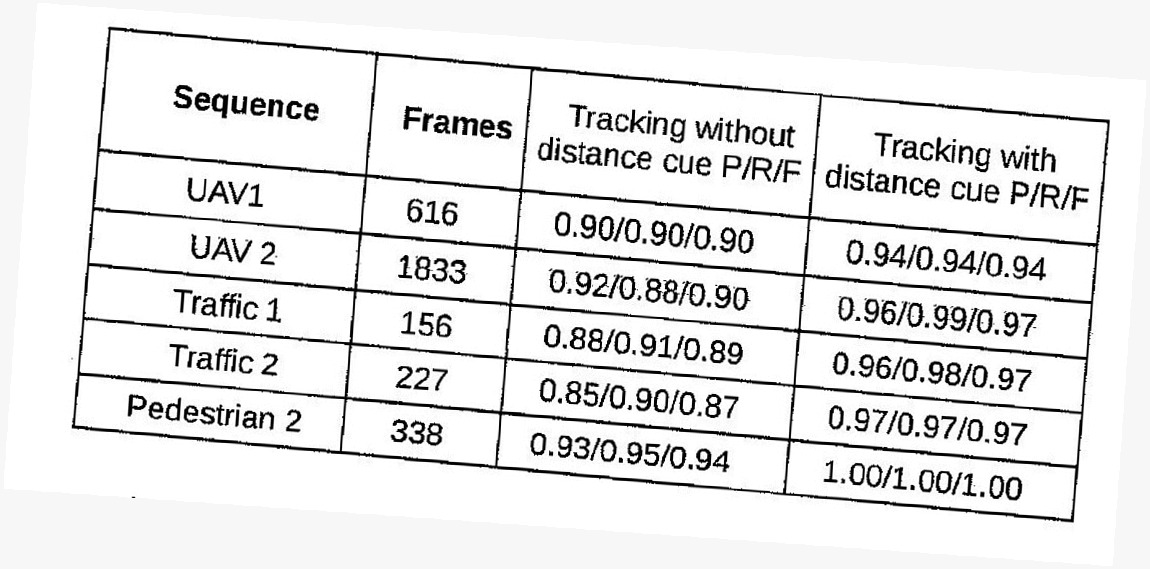


DESKEWED IMAGE:


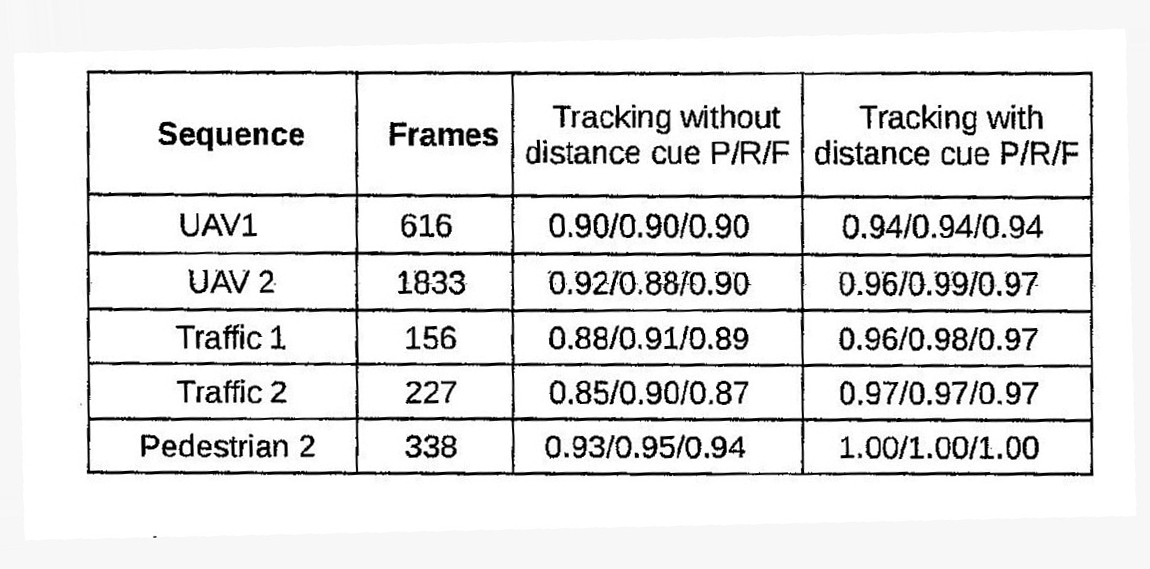

In [ ]:
# path to the image scan of the document
file = "/content/Multi_Type_TD_TSR/images/rotated_example.jpeg" 

# load the image from disk
original_image = cv2.imread(file)
deskewed_image = deskew.deskewImage(original_image)

print("ORIGINAL IMAGE:")
cv2_imshow(original_image)

print()

print("DESKEWED IMAGE:")
cv2_imshow(deskewed_image)

# Table Detection (used)

In [40]:
def convert_PIL_cv2(pdf_pil_img):
  pdf_cv2_img = []
  for pil_img in pdf_pil_img:
    cv2_img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
    pdf_cv2_img.append(cv2_img)
  return pdf_cv2_img

In [43]:
pdf_cv2_img = convert_PIL_cv2(pdf_pil_img)

In [71]:
# table_detection.plot_prediction(pdf_cv2_img[35], predictor)

In [72]:
# table_list, table_coords = table_detection.make_prediction(pdf_cv2_img[35], predictor)
# print(table_coords)

In [66]:
def extract_tbl_from_page(page_no, pdf_cv2_img, scaling_factor_height, scaling_factor_width, img_height, url):
  table_list, table_coords = table_detection.make_prediction(pdf_cv2_img[page_no-1], predictor)
  tbl_lst = []

  for table_coord in table_coords:
    x1 = table_coord[0]
    y1 = table_coord[1]
    x2 = table_coord[2] + table_coord[0]
    y2 = table_coord[3] + table_coord[1]
    
    # cv2 and pdf used 2 different coordinate systems, thus y1 and y2 need to be modified
    y1 = img_height - y1
    y2 = img_height - y2
    
    # scale by scaling factors
    scaled_x1 = x1/scaling_factor_width
    scaled_x2 = x2/scaling_factor_width
    scaled_y1 = y1/scaling_factor_height
    scaled_y2 = y2/scaling_factor_height

    coords = f"{scaled_x1}, {scaled_y1}, {scaled_x2}, {scaled_y2}"

    tbls_scaled = camelot.read_pdf(url, flavor='stream', edge_tol=50, pages=str(page_no), flag_size=True, table_areas=[coords], split_text=True) # split_text=True
    tbl_lst.append(tbls_scaled[0].df)

  return tbl_lst

TABLE 0 :


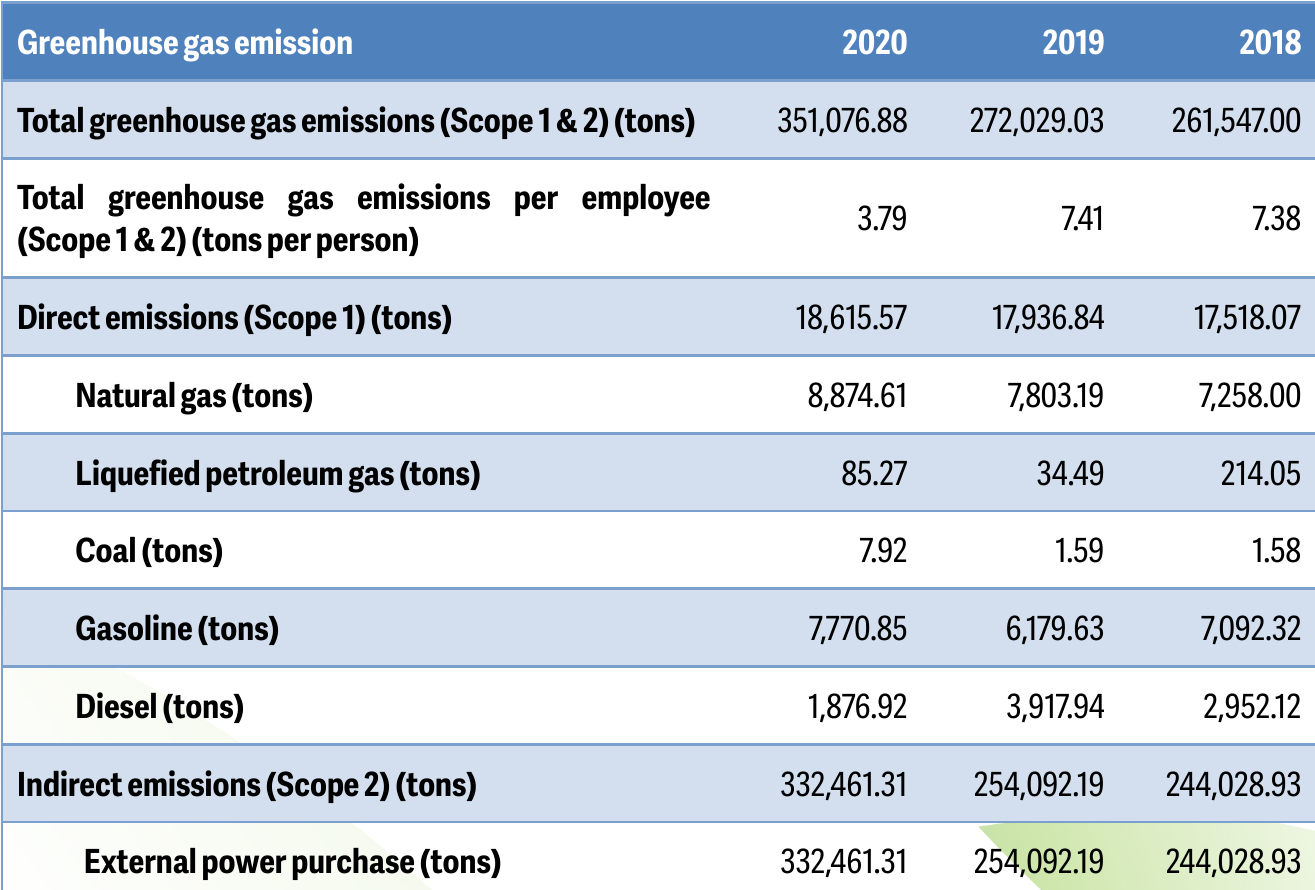


TABLE 1 :


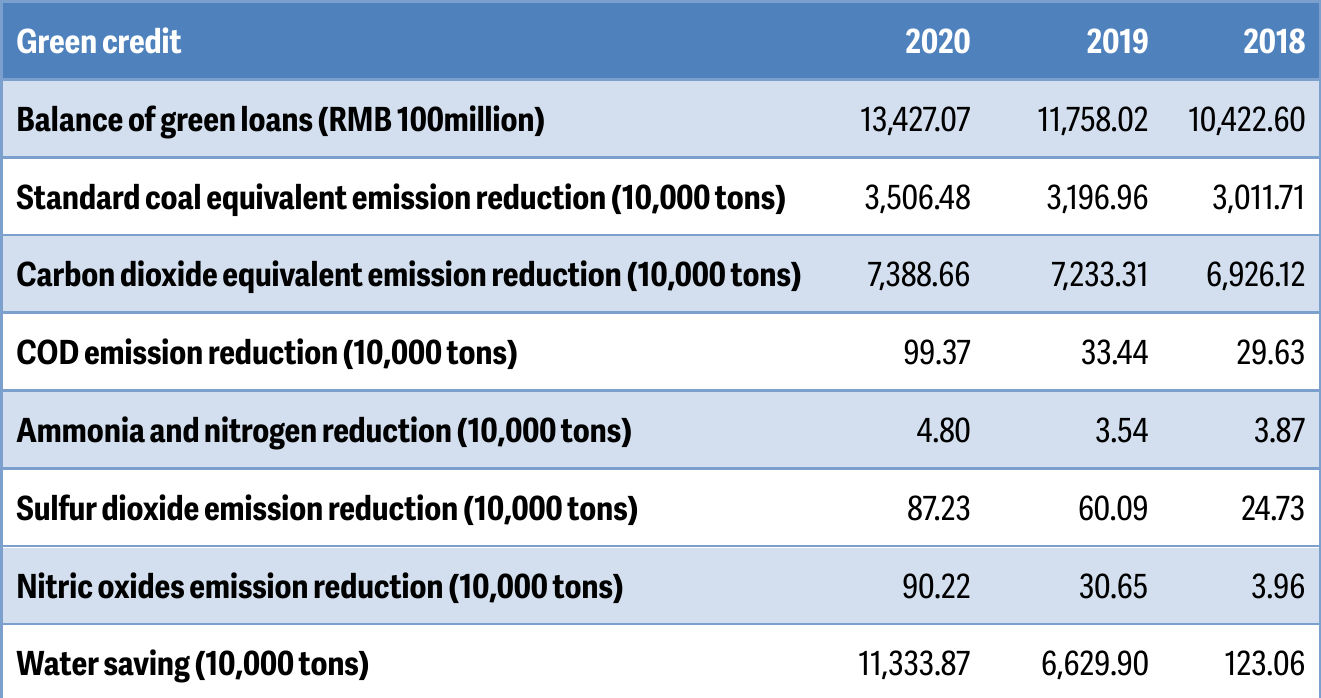

In [67]:
tbl_lst = extract_tbl_from_page(36, pdf_cv2_img, scaling_factor_height, scaling_factor_width, img_height, china_bank_url)

In [73]:
tbl_lst[0]

0  ...           3
0                             Greenhouse gas emission  ...        2018
1   Total greenhouse gas emissions (Scope 1 & 2) (...  ...  261,547.00
2   Total \ngreenhouse \ngas \nemissions \nper \ne...  ...            
3                                                      ...        7.38
4                     (Scope 1 & 2) (tons per person)  ...            
5                   Direct emissions (Scope 1) (tons)  ...   17,518.07
6                                  Natural gas (tons)  ...    7,258.00
7                      Liquefied petroleum gas (tons)  ...      214.05
8                                         Coal (tons)  ...        1.58
9                                     Gasoline (tons)  ...    7,092.32
10                                      Diesel (tons)  ...    2,952.12
11                Indirect emissions (Scope 2) (tons)  ...  244,028.93
12                     External power purchase (tons)  ...  244,028.93

[13 rows x 4 columns]

In [74]:
tbl_lst[1]

0  ...          3
0                                       Green credit  ...       2018
1            Balance of green loans (RMB 100million)  ...  10,422.60
2  Standard coal equivalent emission reduction (1...  ...   3,011.71
3  Carbon dioxide equivalent emission reduction (...  ...   6,926.12
4               COD emission reduction (10,000 tons)  ...      29.63
5       Ammonia and nitrogen reduction (10,000 tons)  ...       3.87
6    Sulfur dioxide emission reduction (10,000 tons)  ...      24.73
7     Nitric oxides emission reduction (10,000 tons)  ...       3.96
8                         Water saving (10,000 tons)  ...     123.06

[9 rows x 4 columns]

In [ ]:
pg_79.save("pg_79.png")

In [ ]:
files.download("pg_79.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [ ]:
upload_files()

Saving pg_79.png to pg_79 (1).png


['pg_79.png']

/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


TABLE DETECTION:


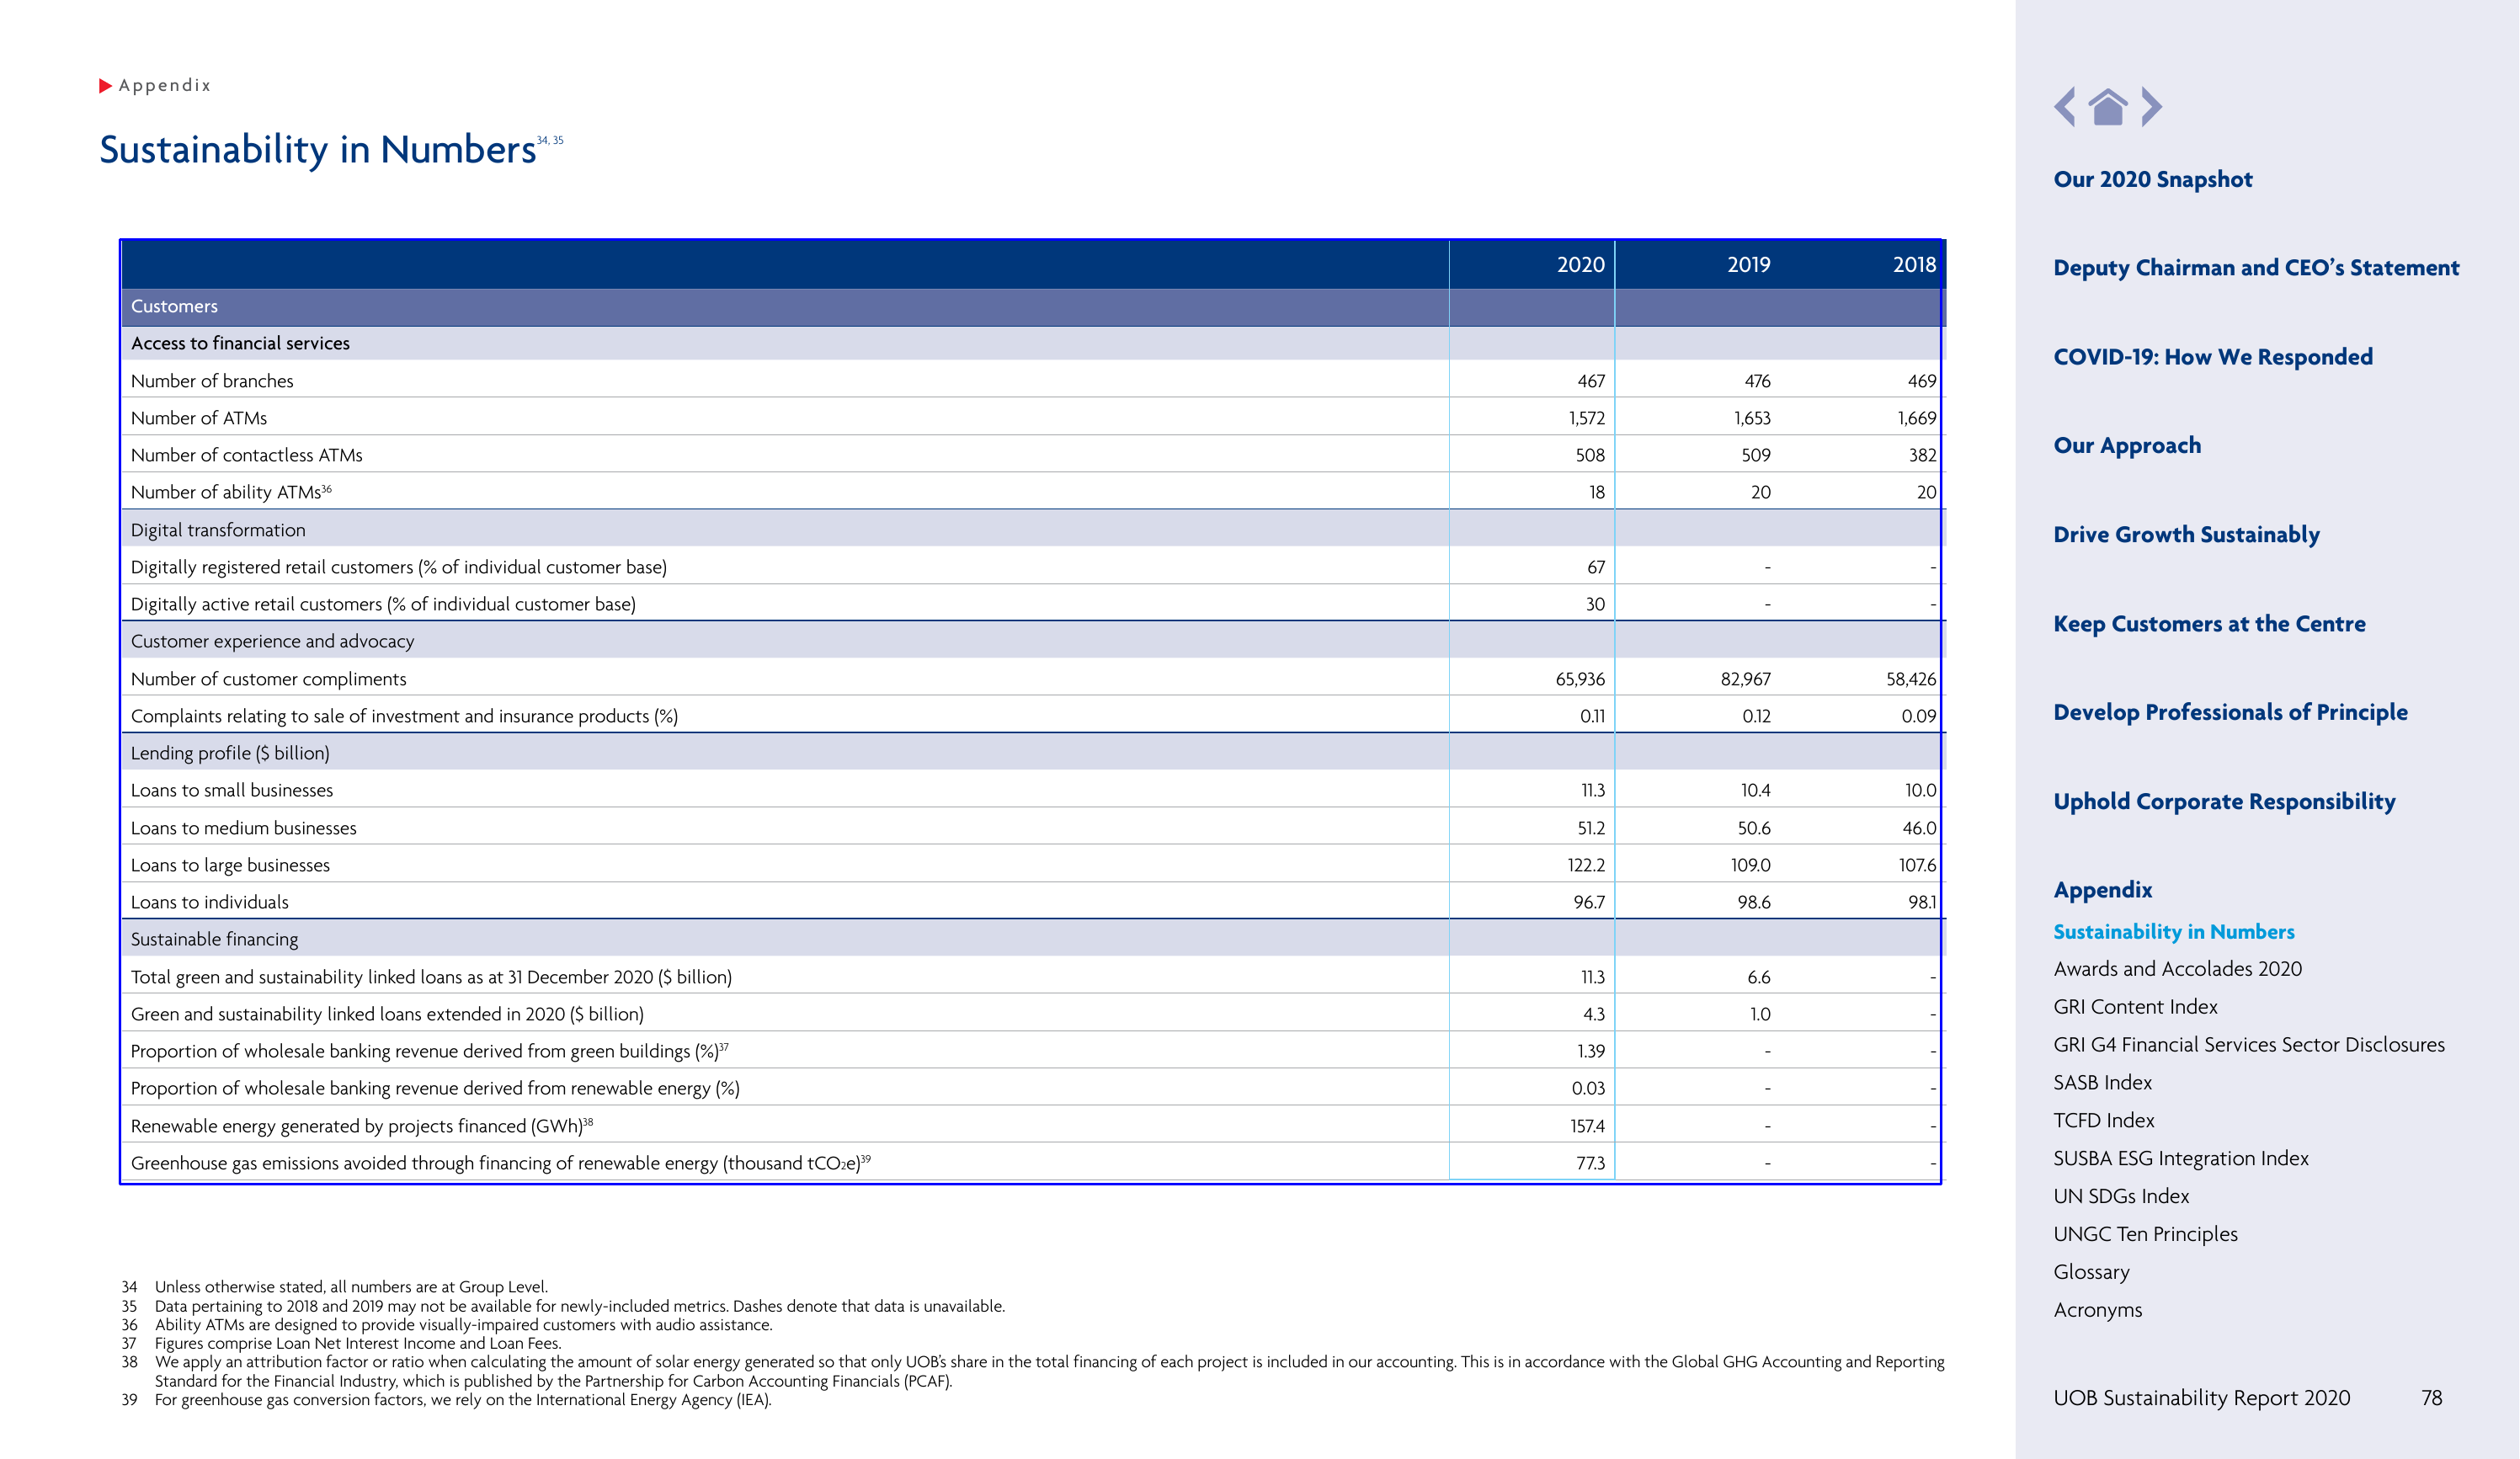

In [ ]:
document_img = cv2.imread('pg_79.png')
table_detection.plot_prediction(document_img, predictor)


In [ ]:
height, width, channels = document_img.shape

In [ ]:
print(height, width, channels)

1733 2993 3


TABLE 0 :


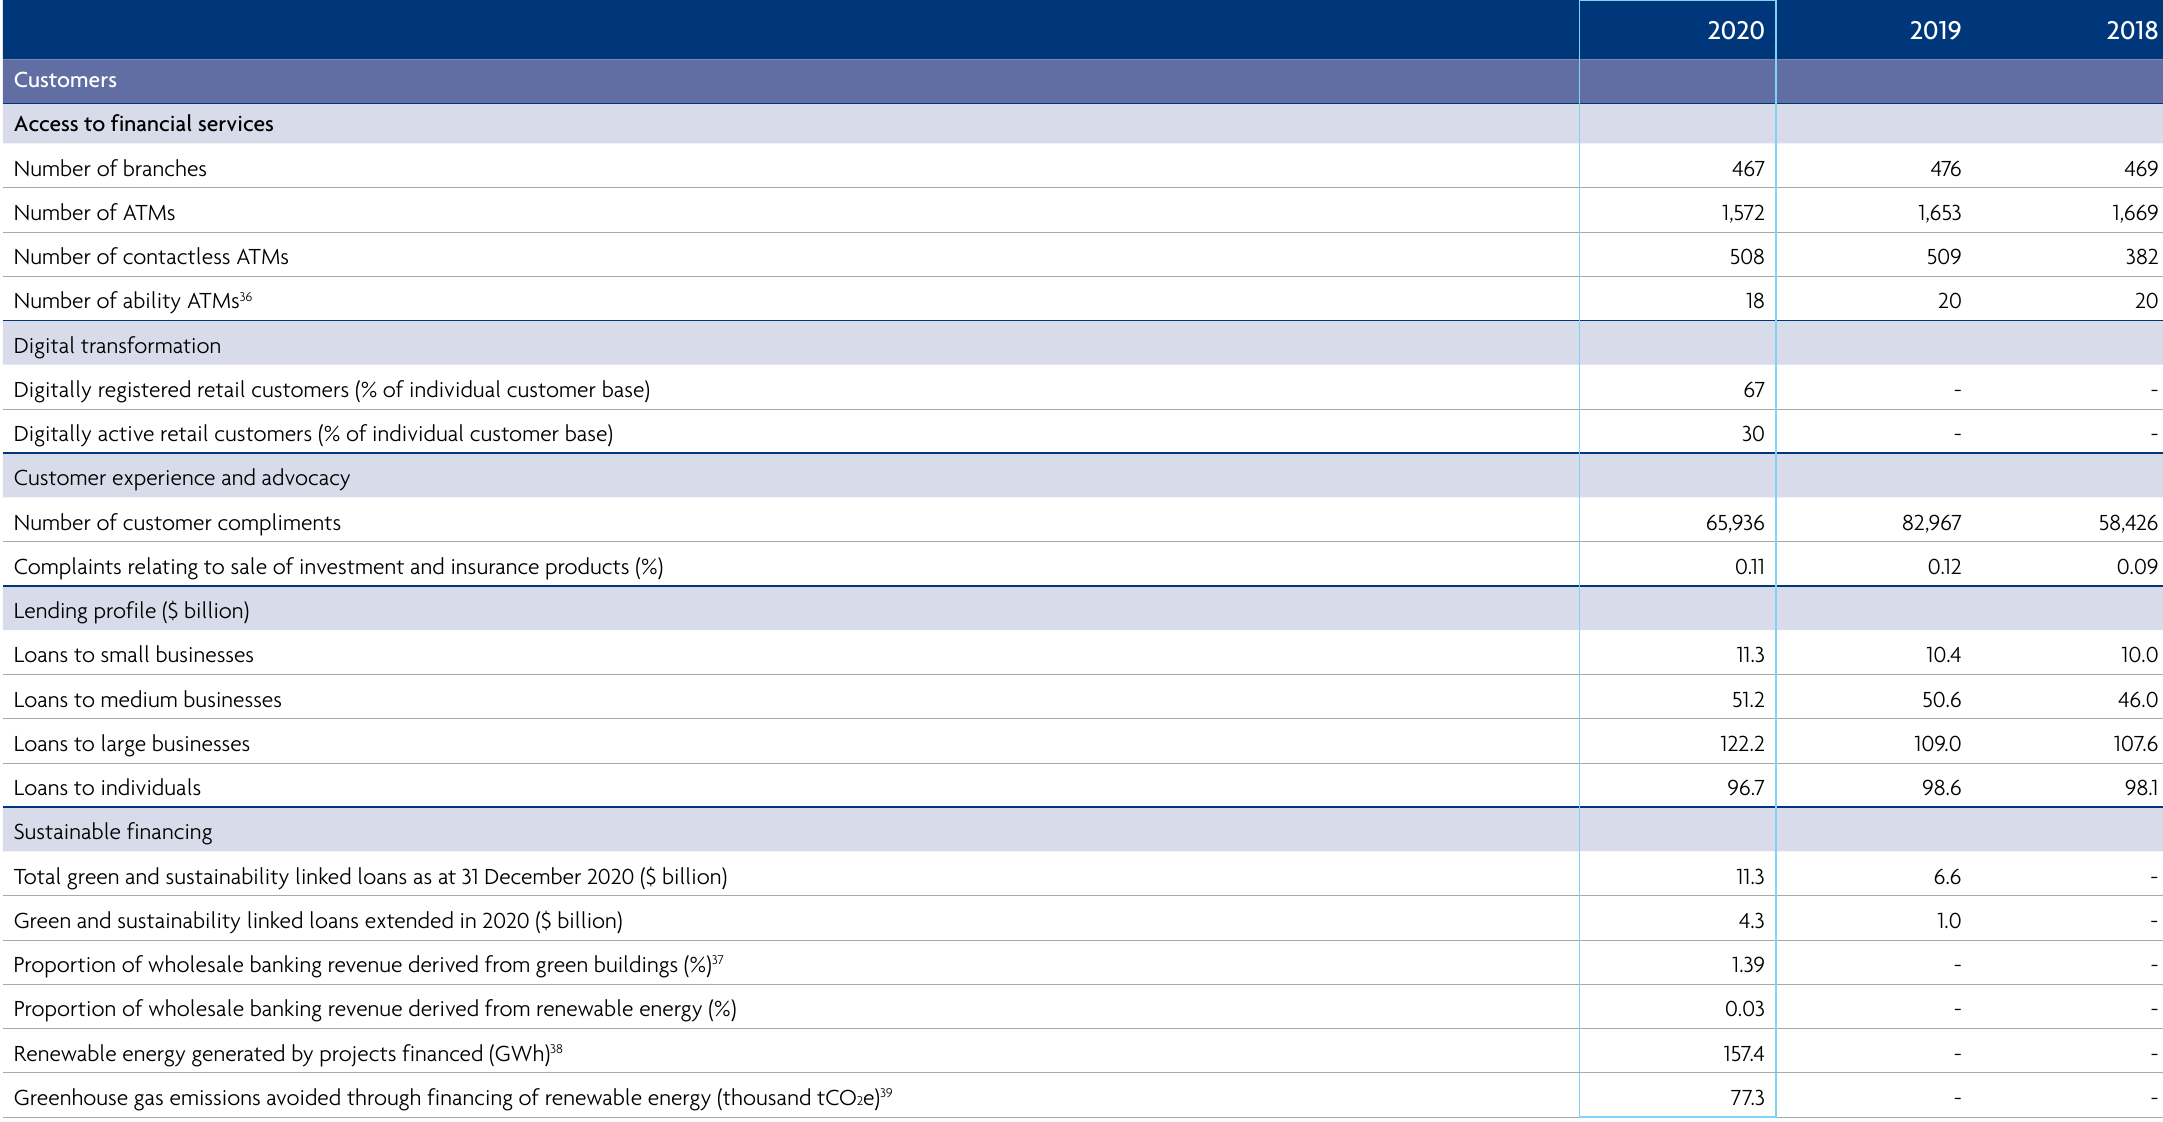

In [ ]:
table_list, table_coords = table_detection.make_prediction(document_img, predictor)

In [ ]:
table_coords

[[142, 284, 2163, 1122]]

#Table Structure Recognition Partially Bordered Tables
# with Color Invariance Pre-Processing

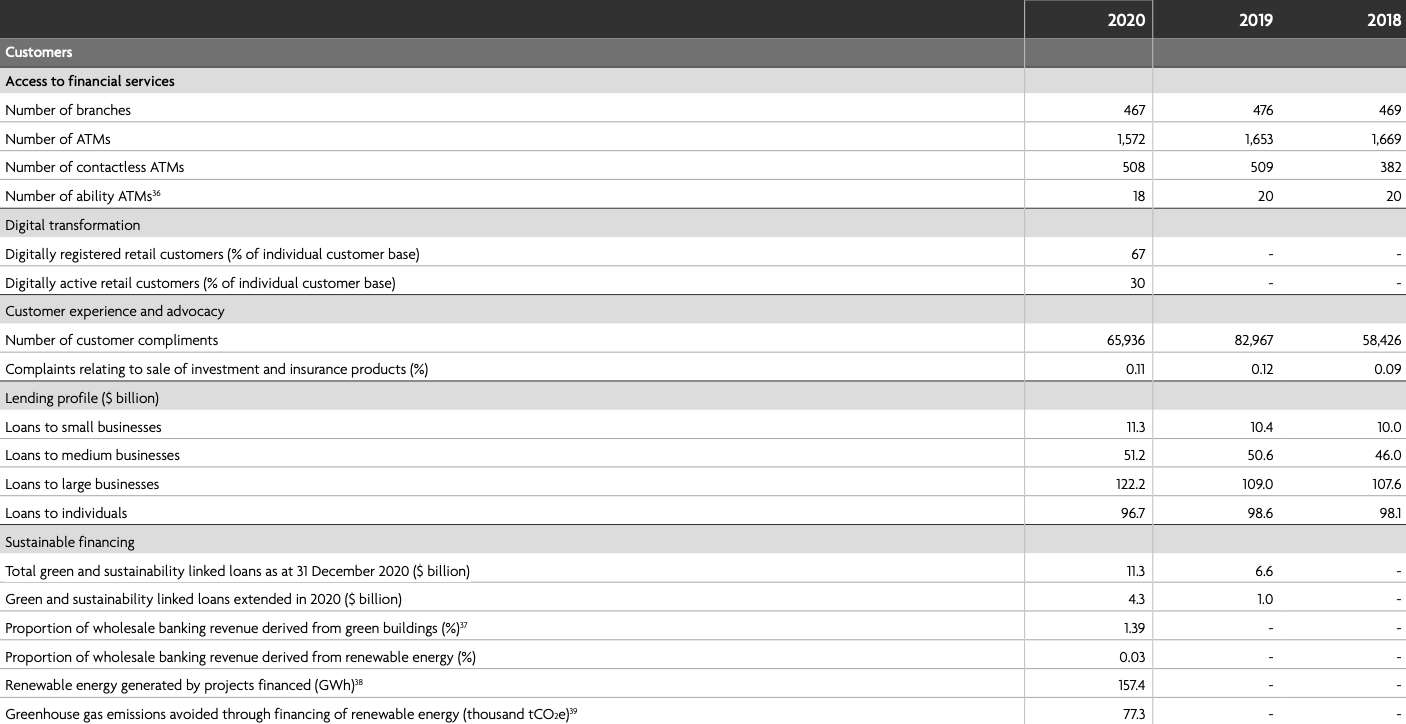

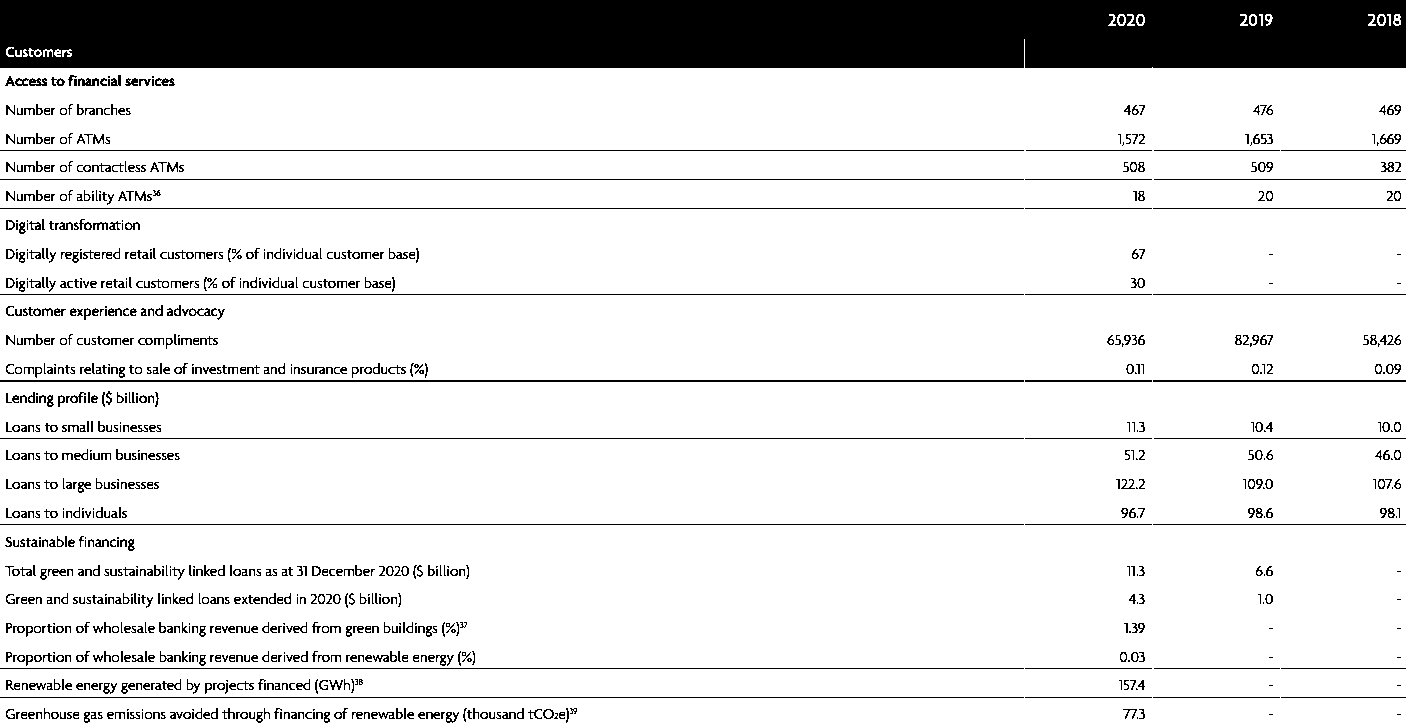

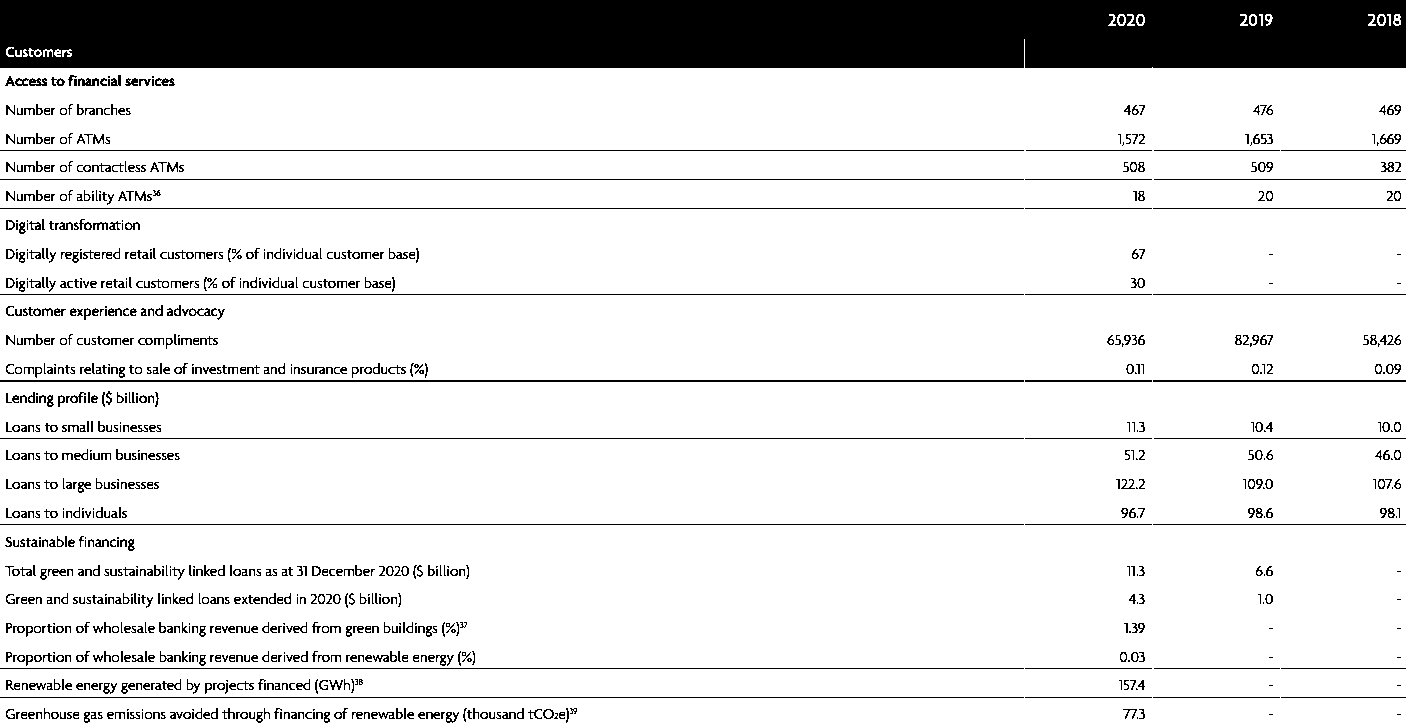

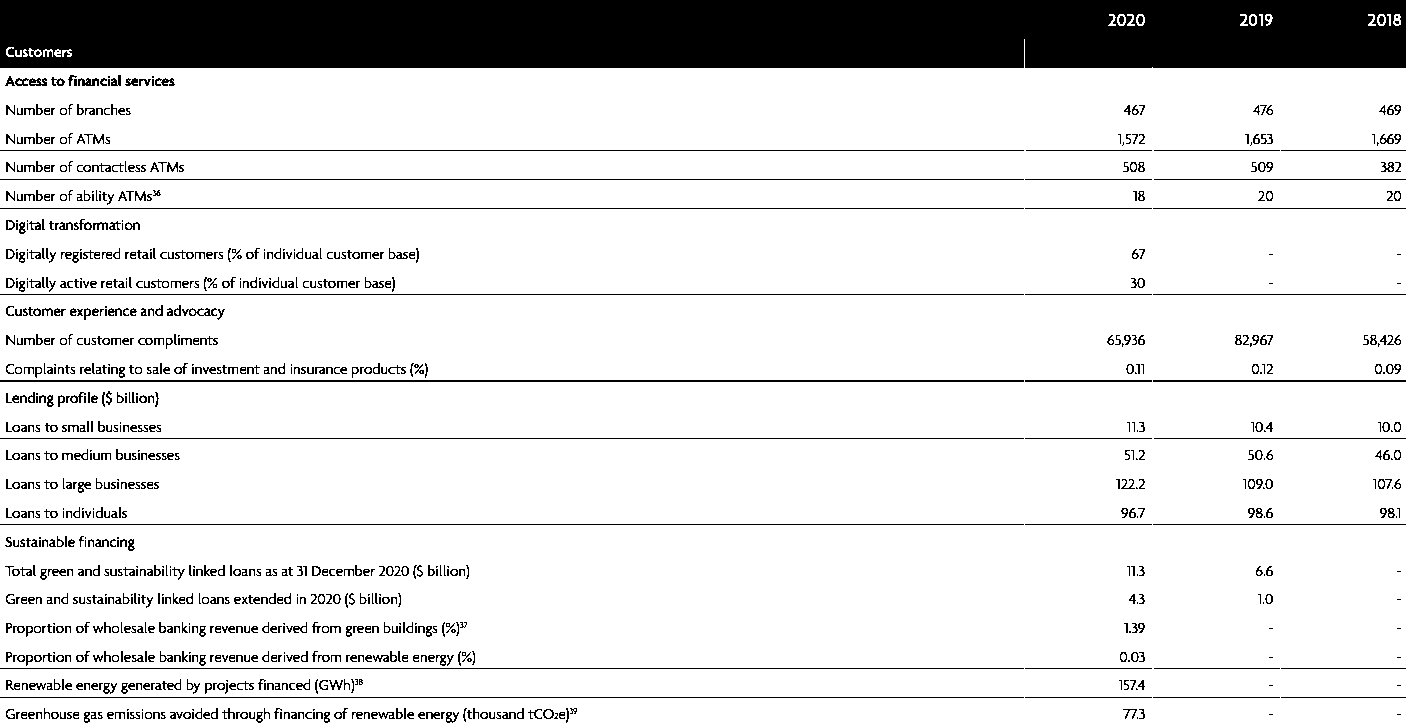

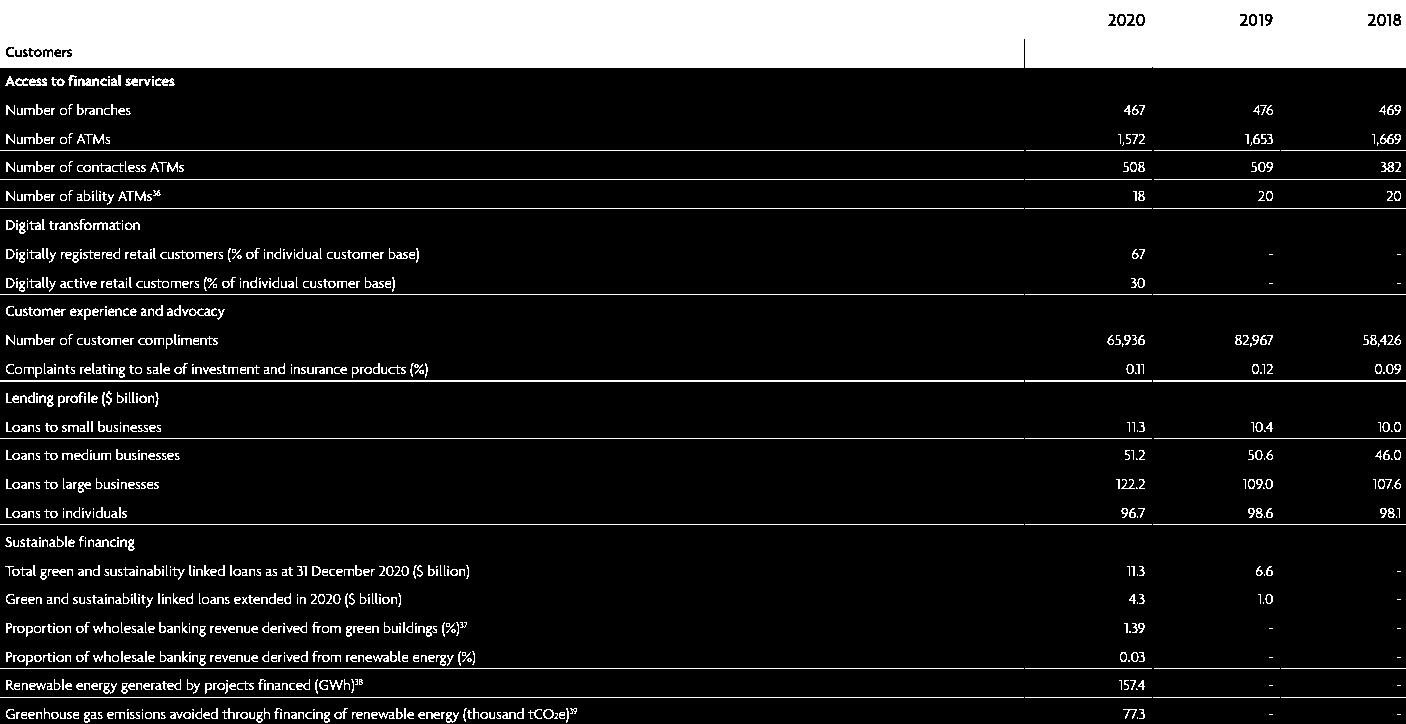

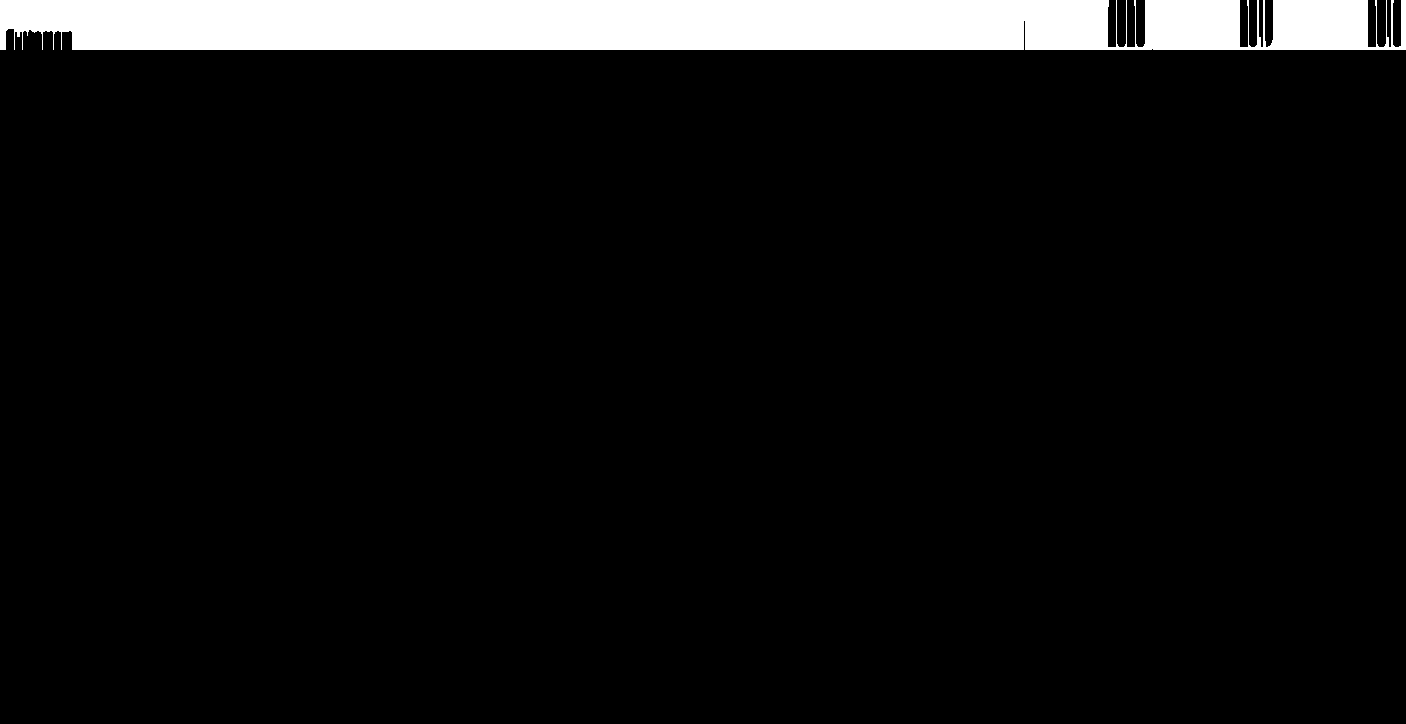

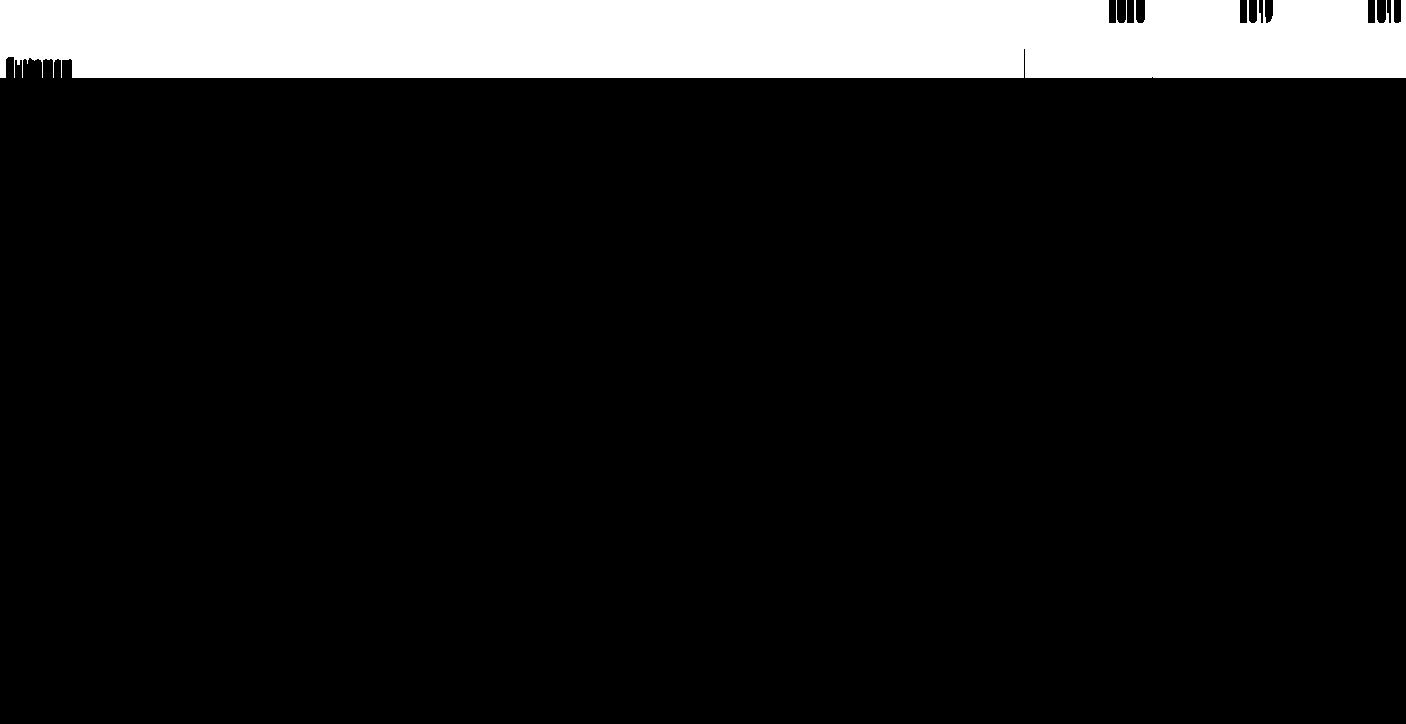

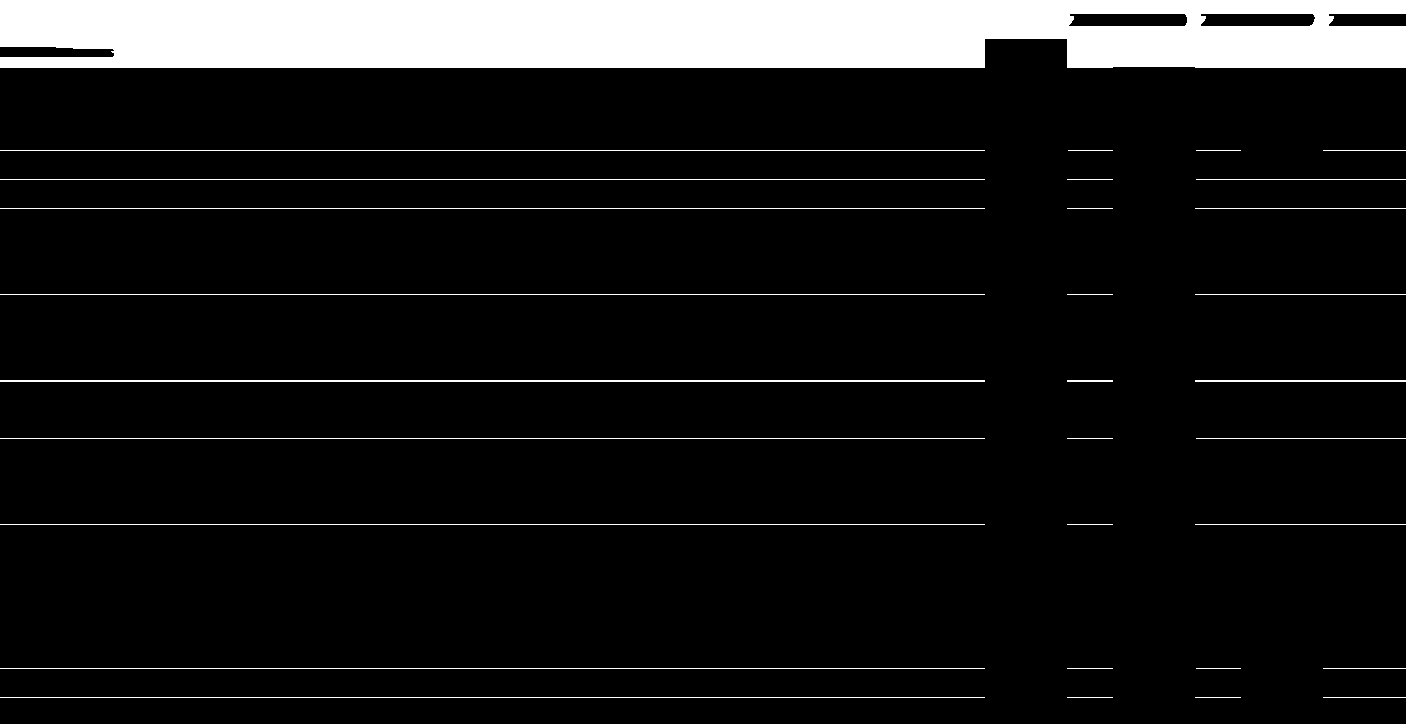

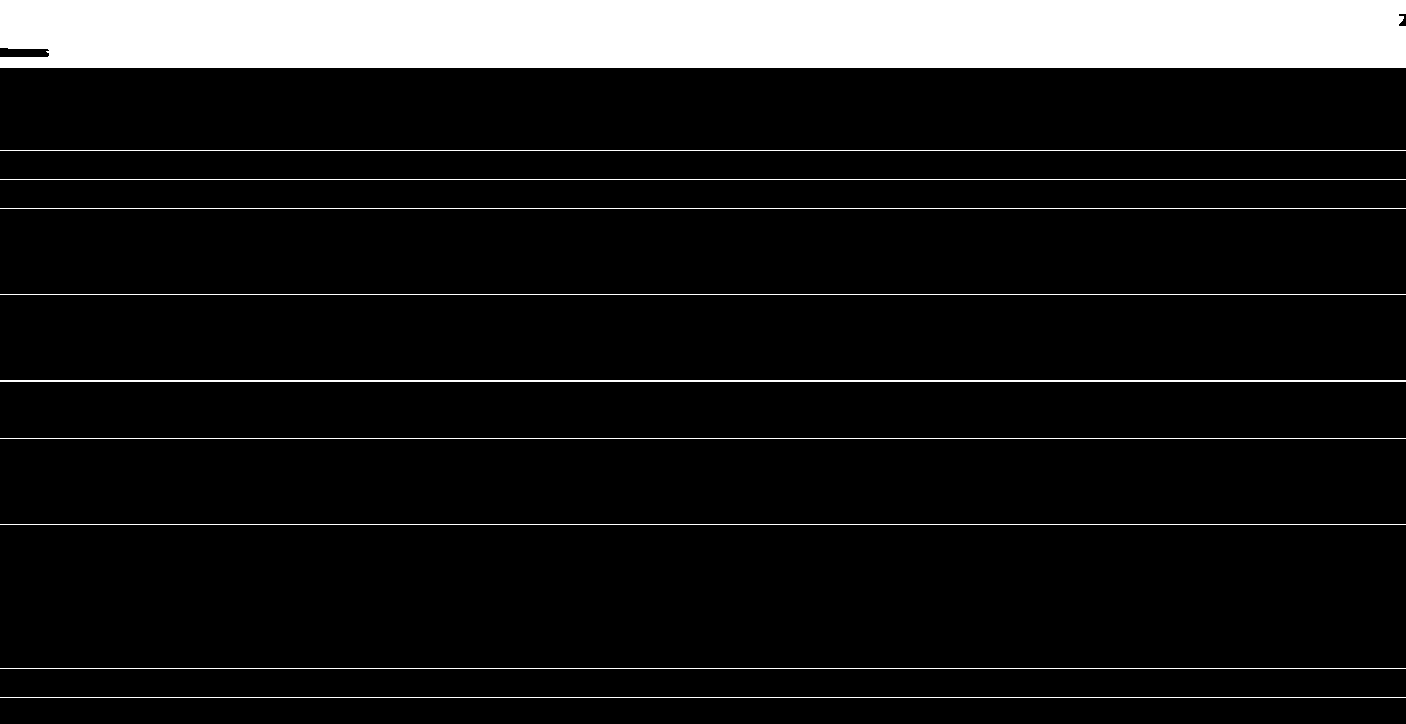

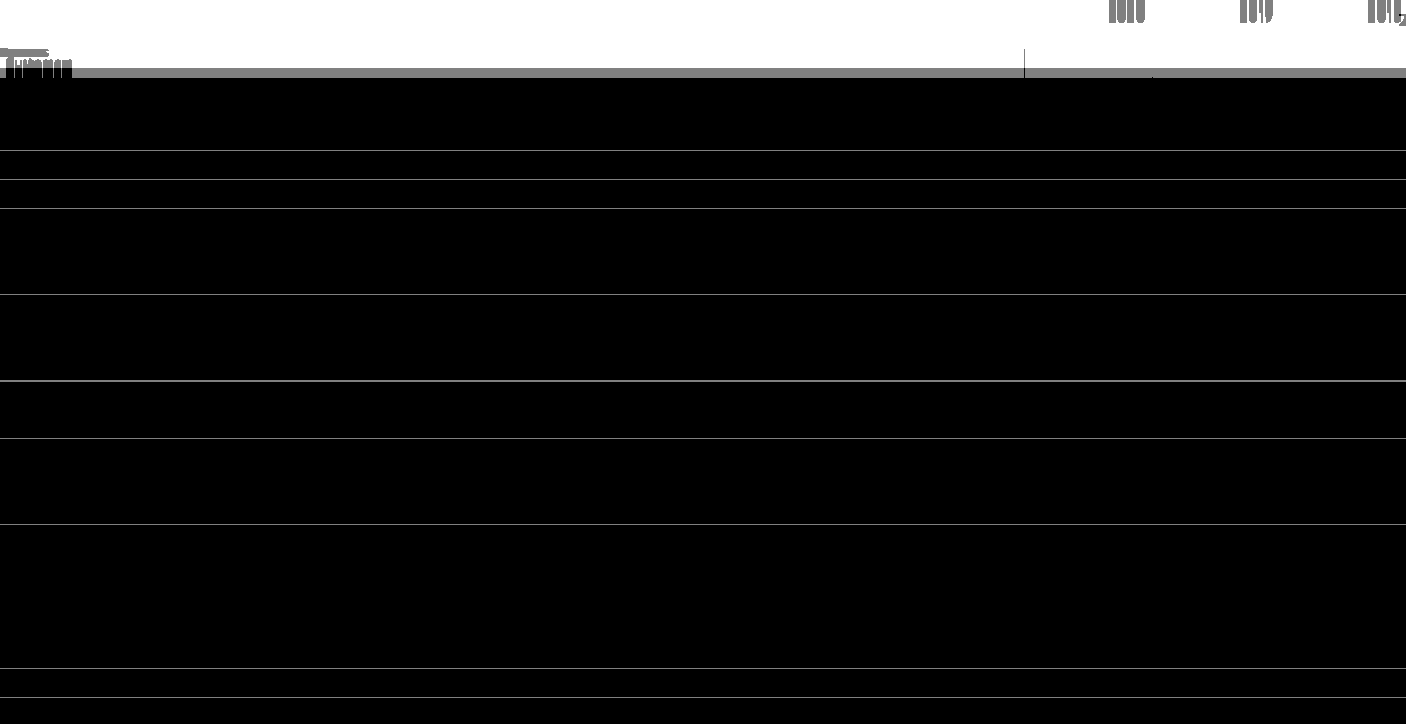

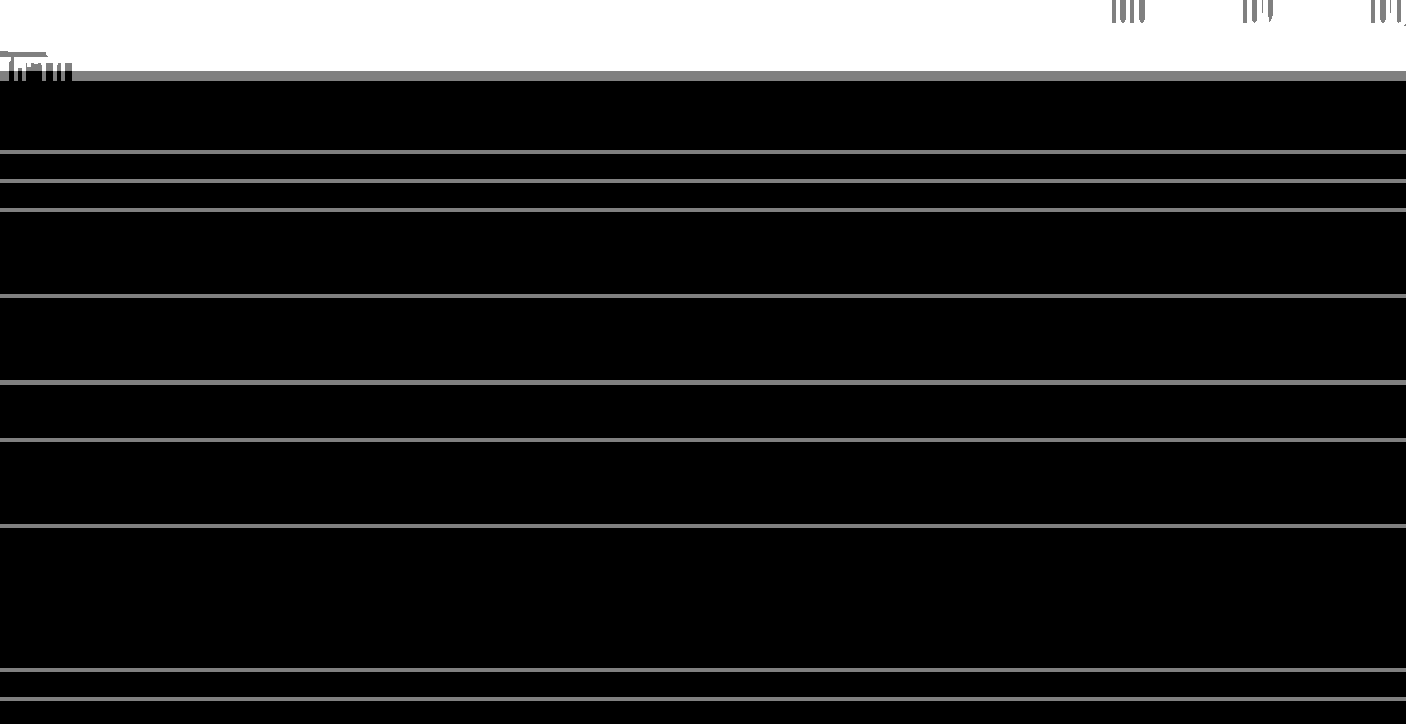

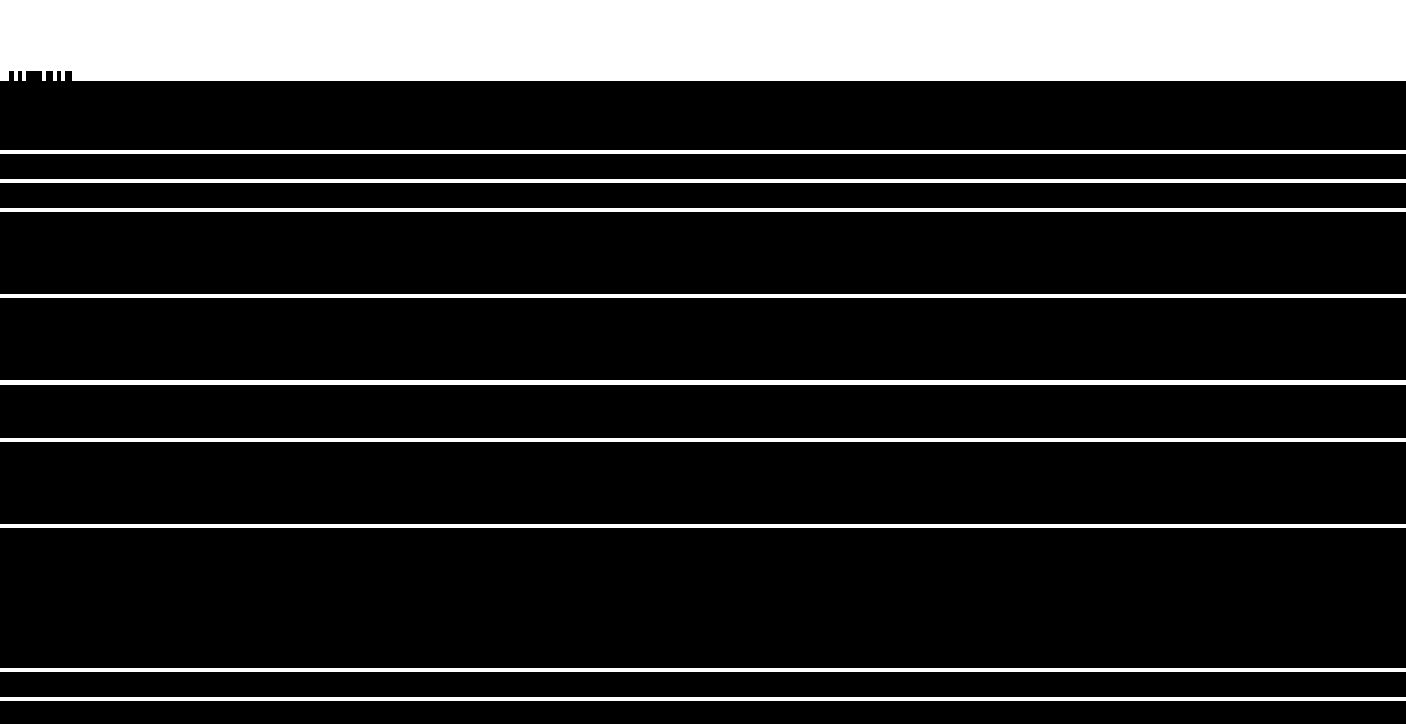

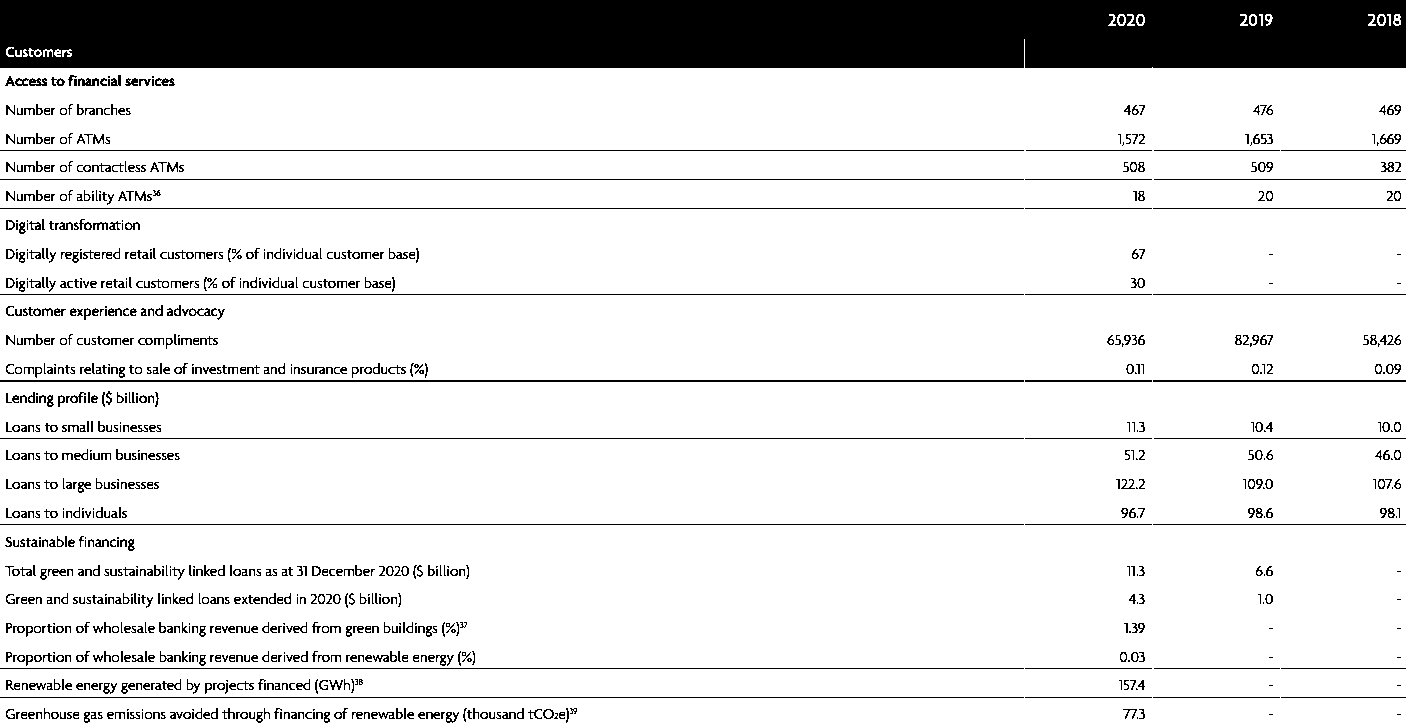

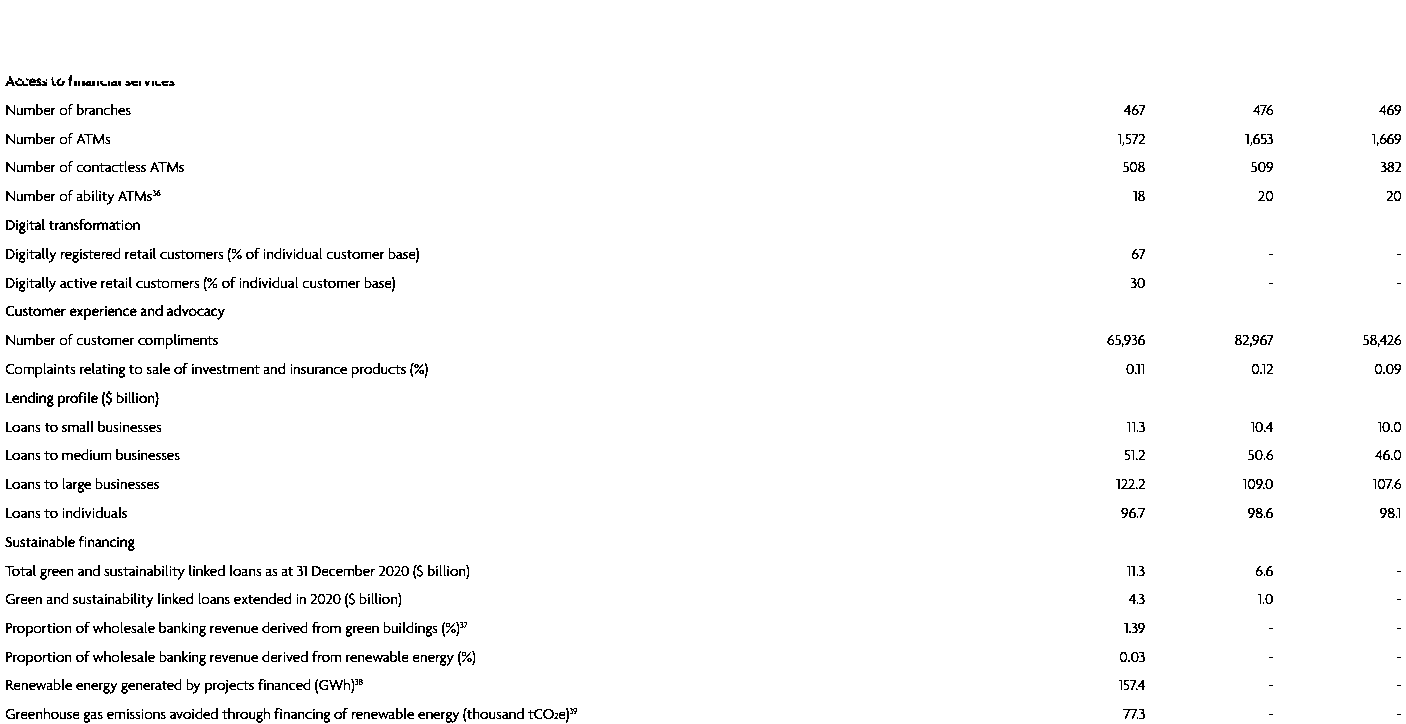

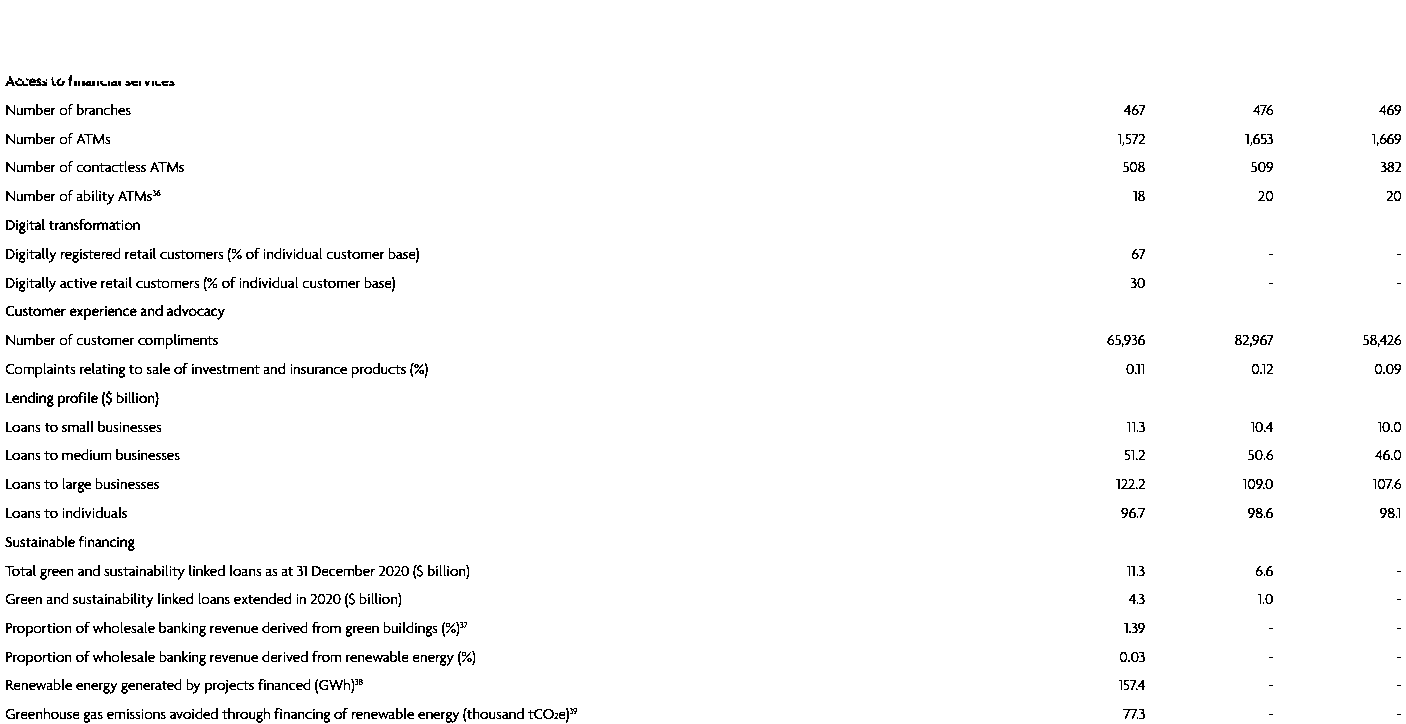

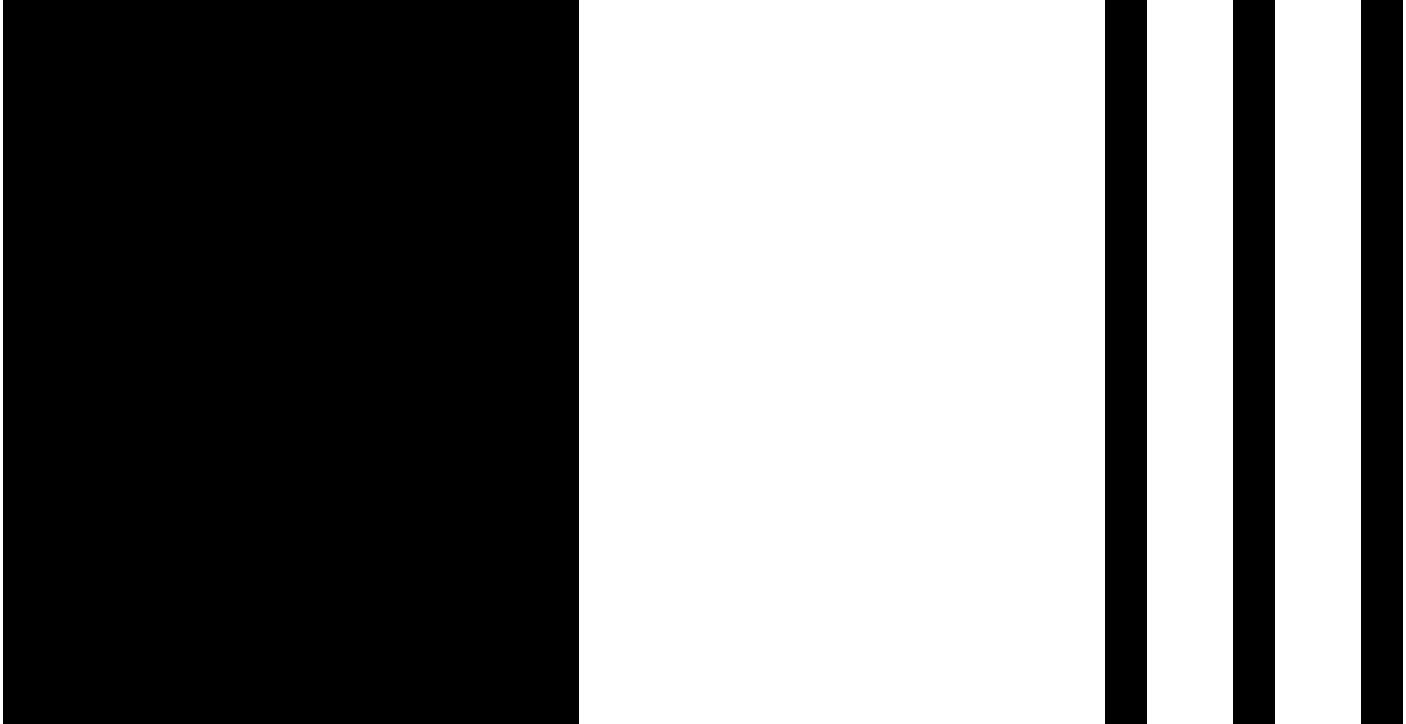

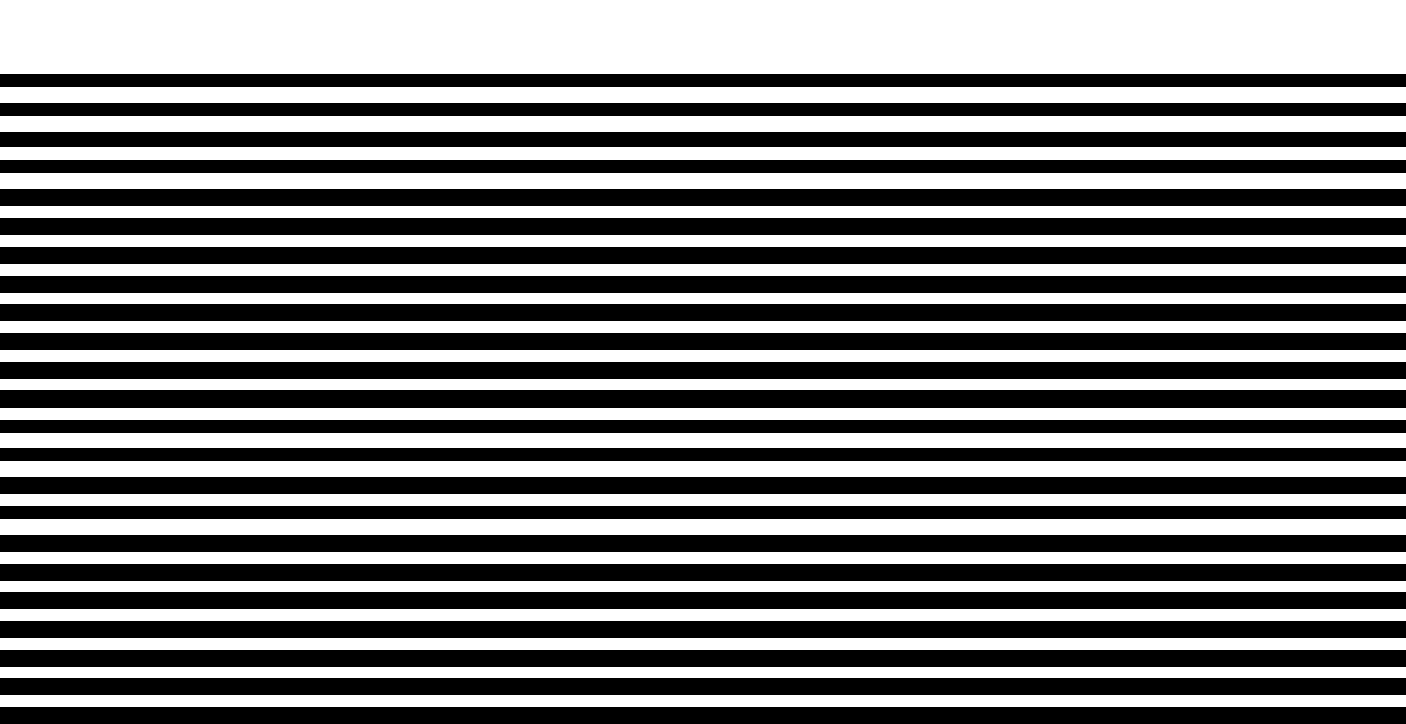

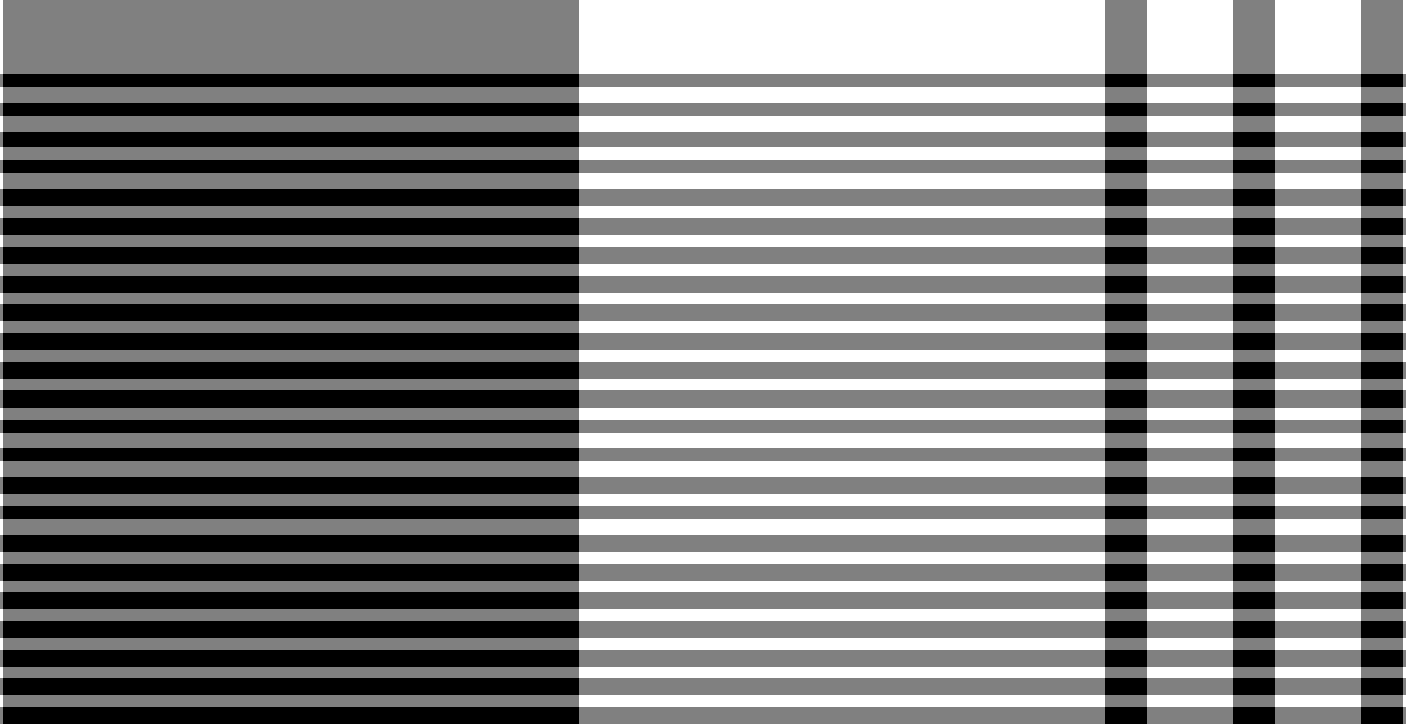

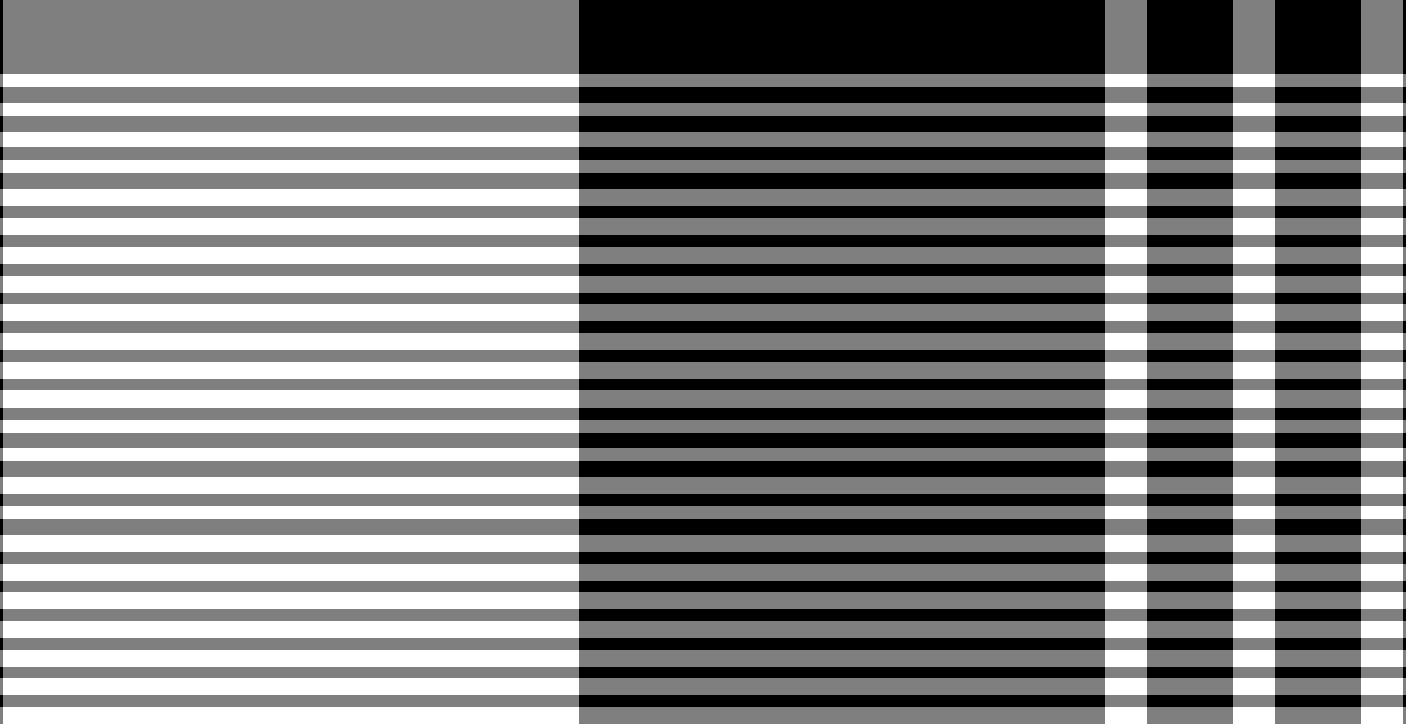

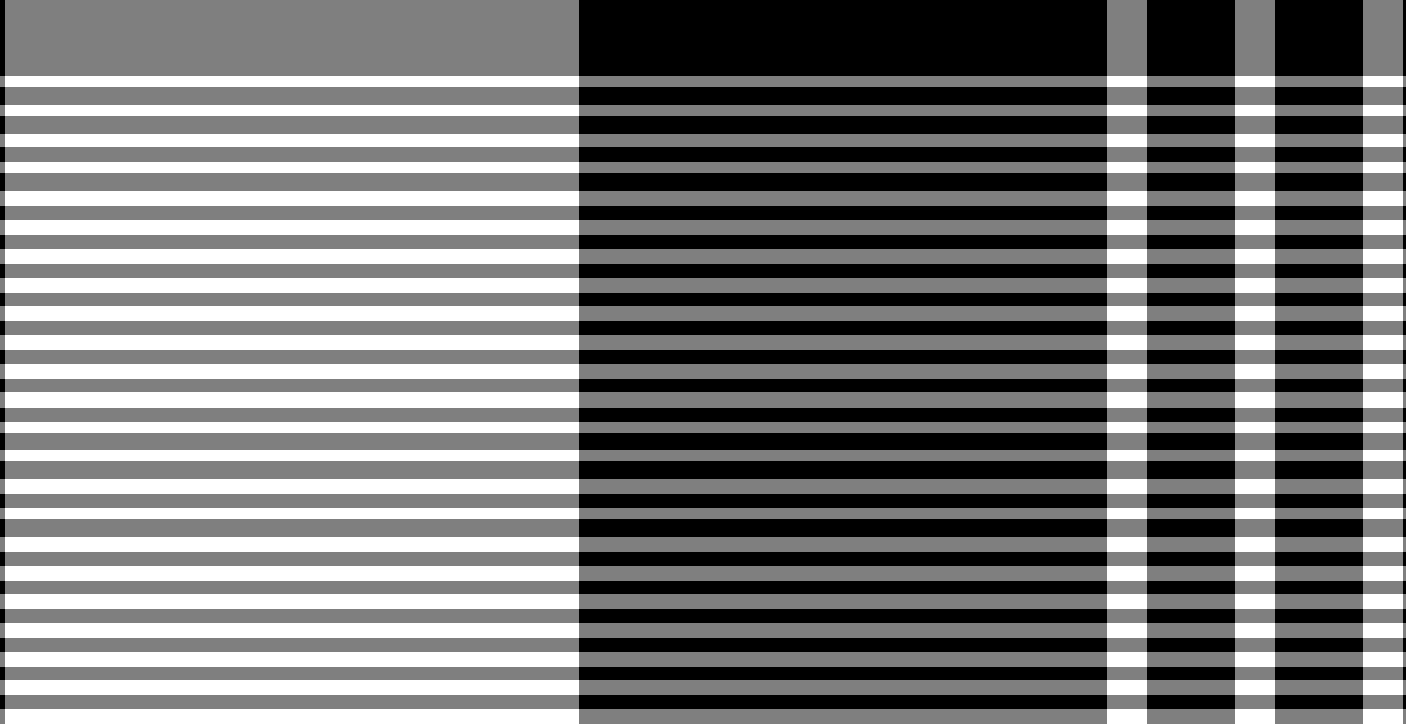

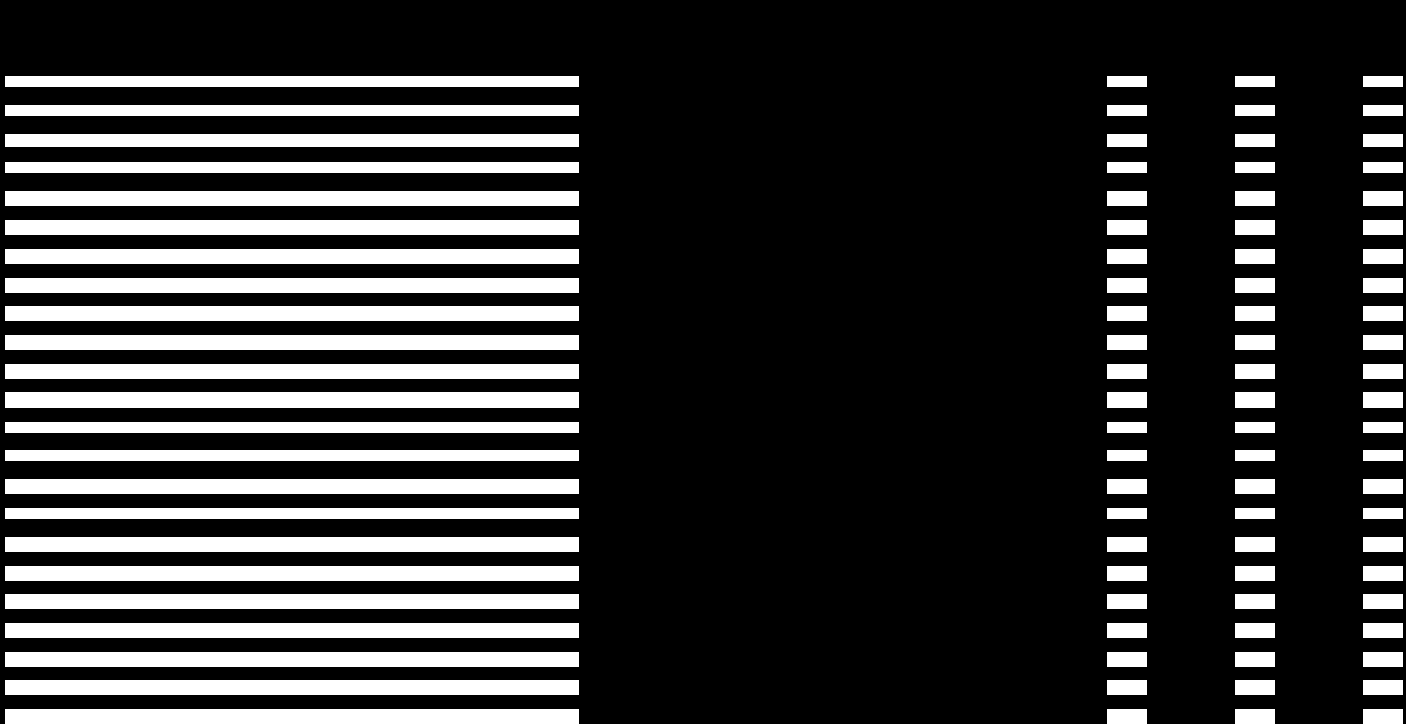

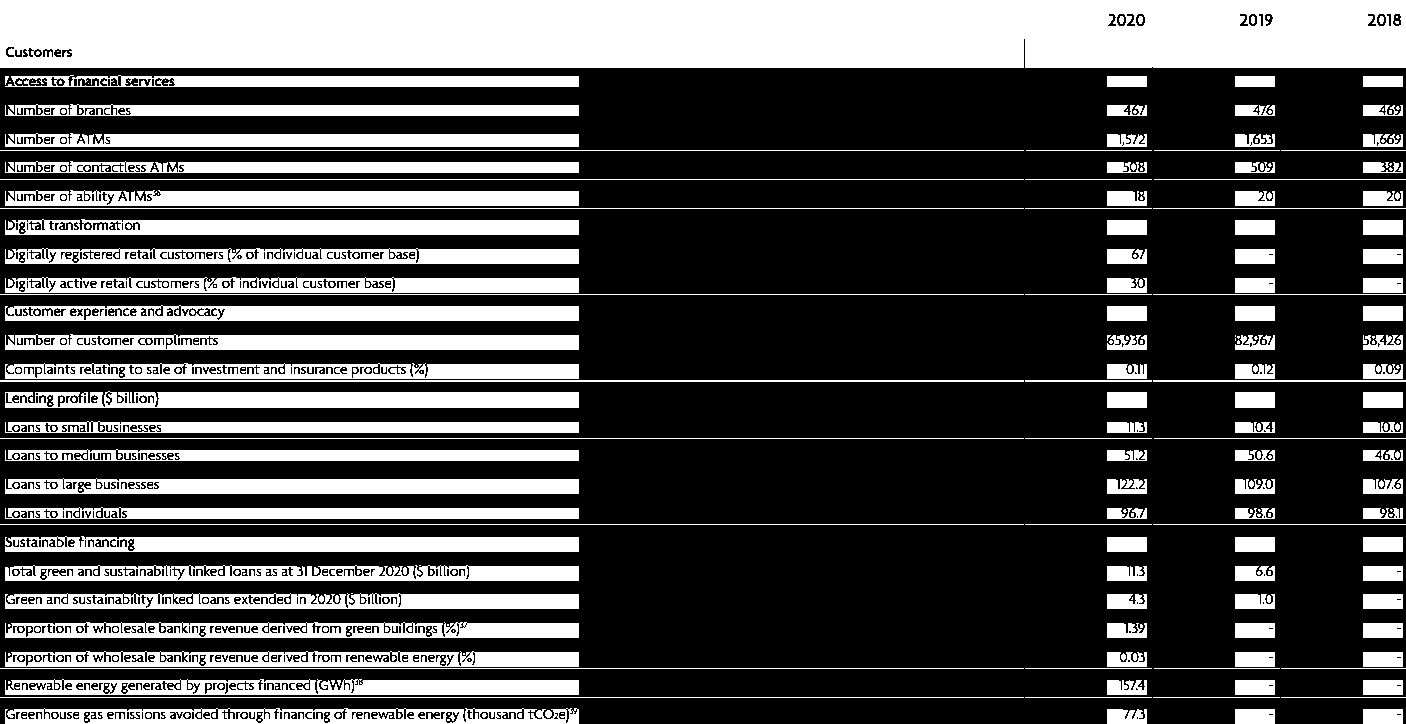

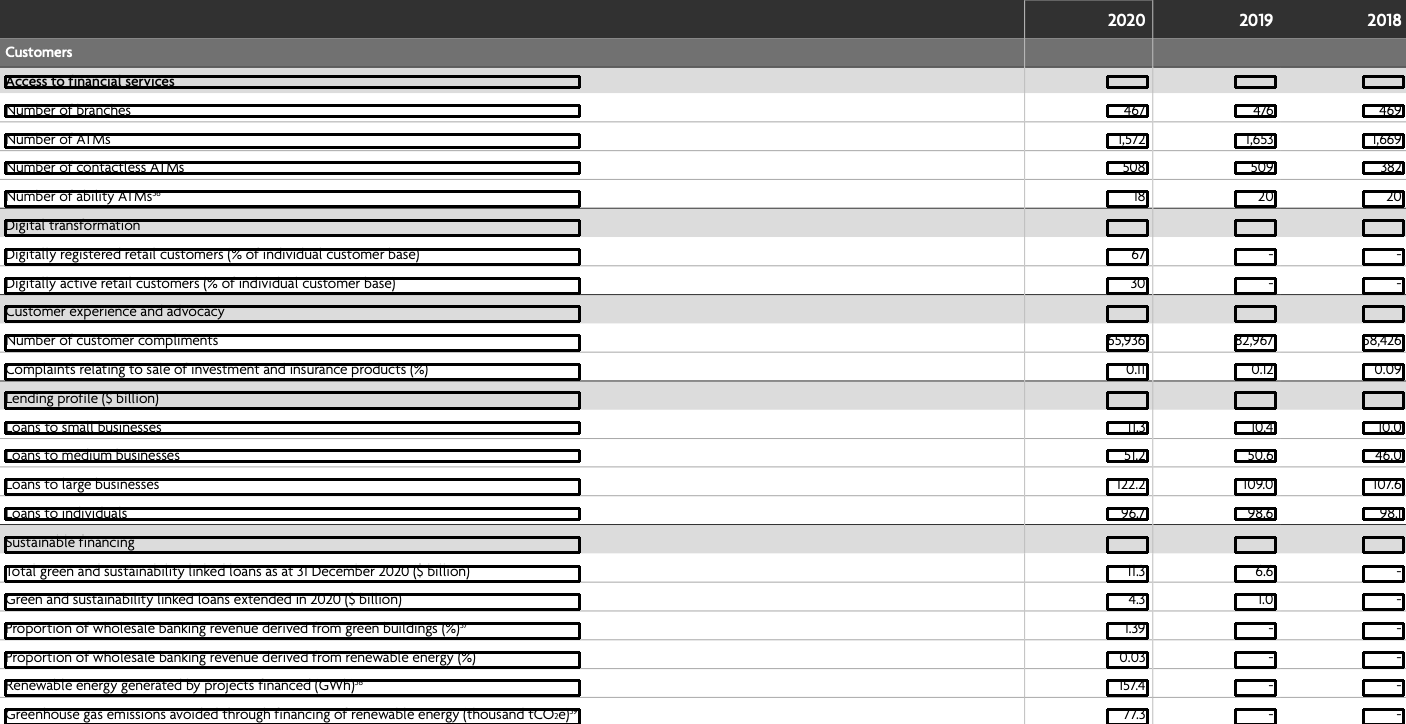

In [ ]:
list_table_boxes = []

for table in table_list:
    finalboxes, output_img = tsra.recognize_structure(table)
    list_table_boxes.append(finalboxes)

# XML Output 

In [ ]:
txml.output_to_xml(table_coords, list_table_boxes)

#Table Structure Recognition Bordered Tables

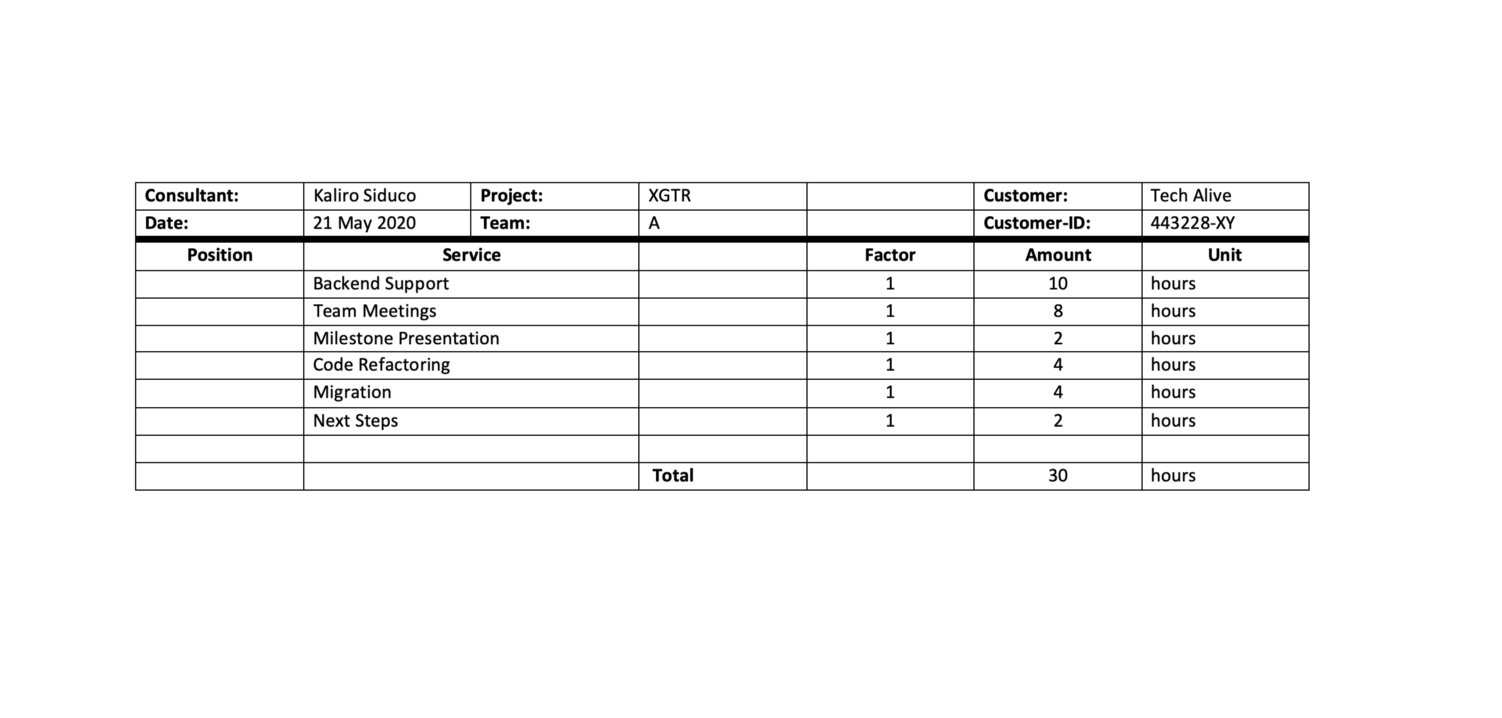

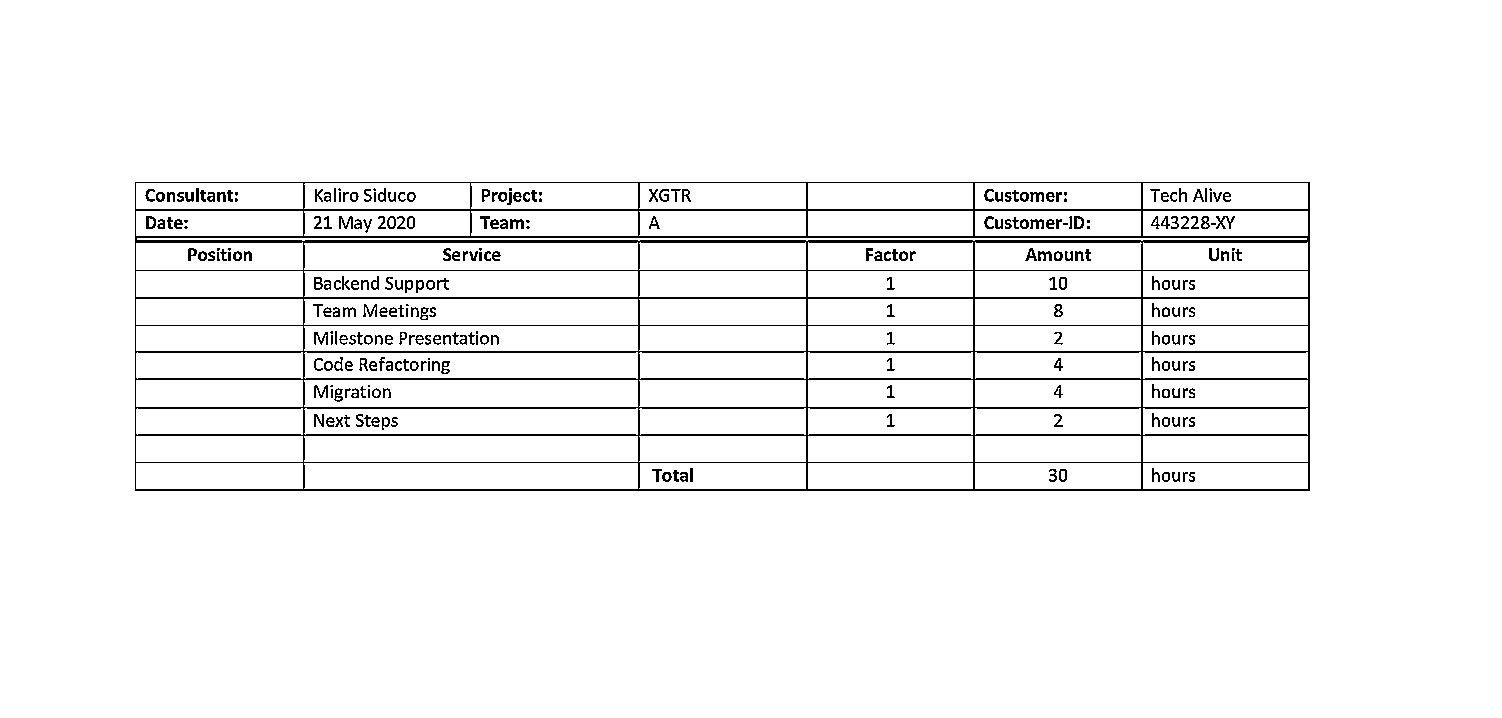

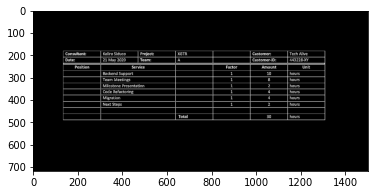

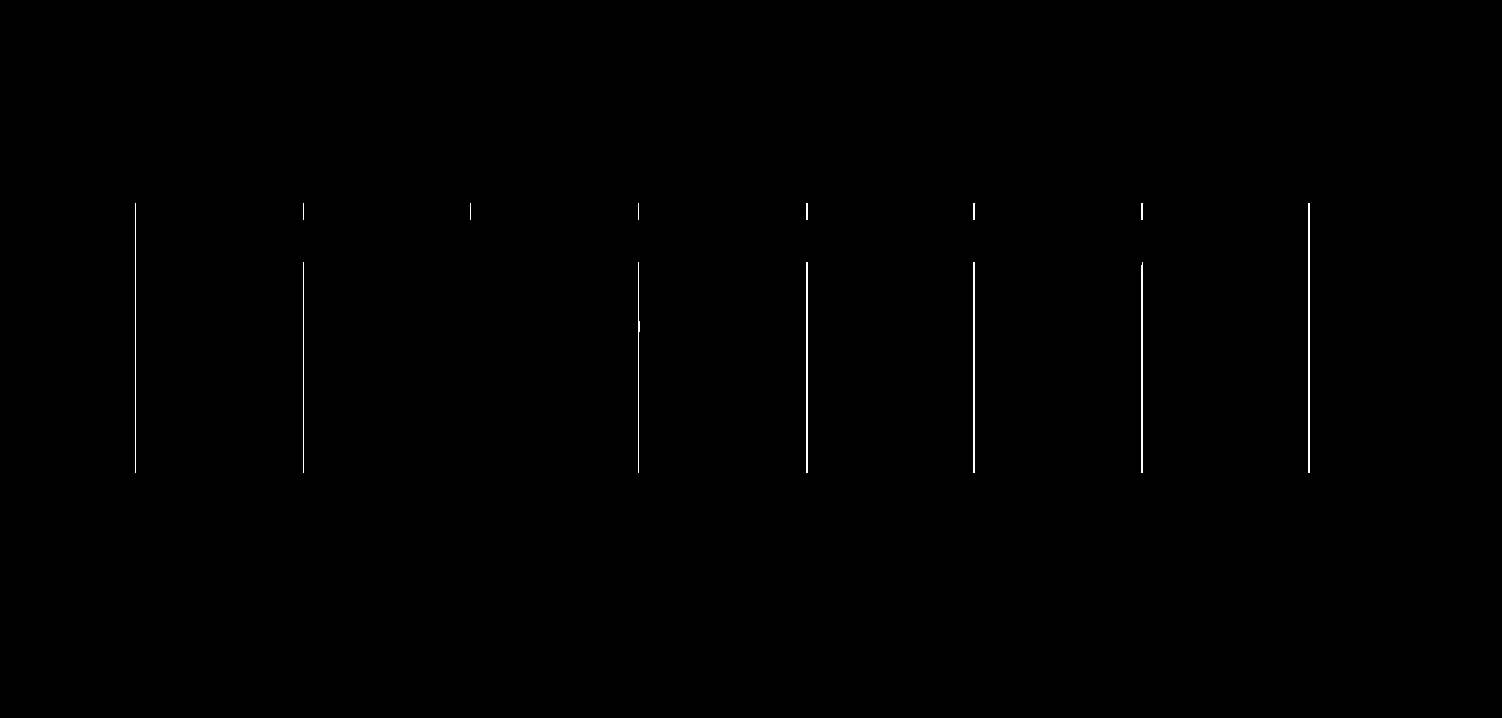

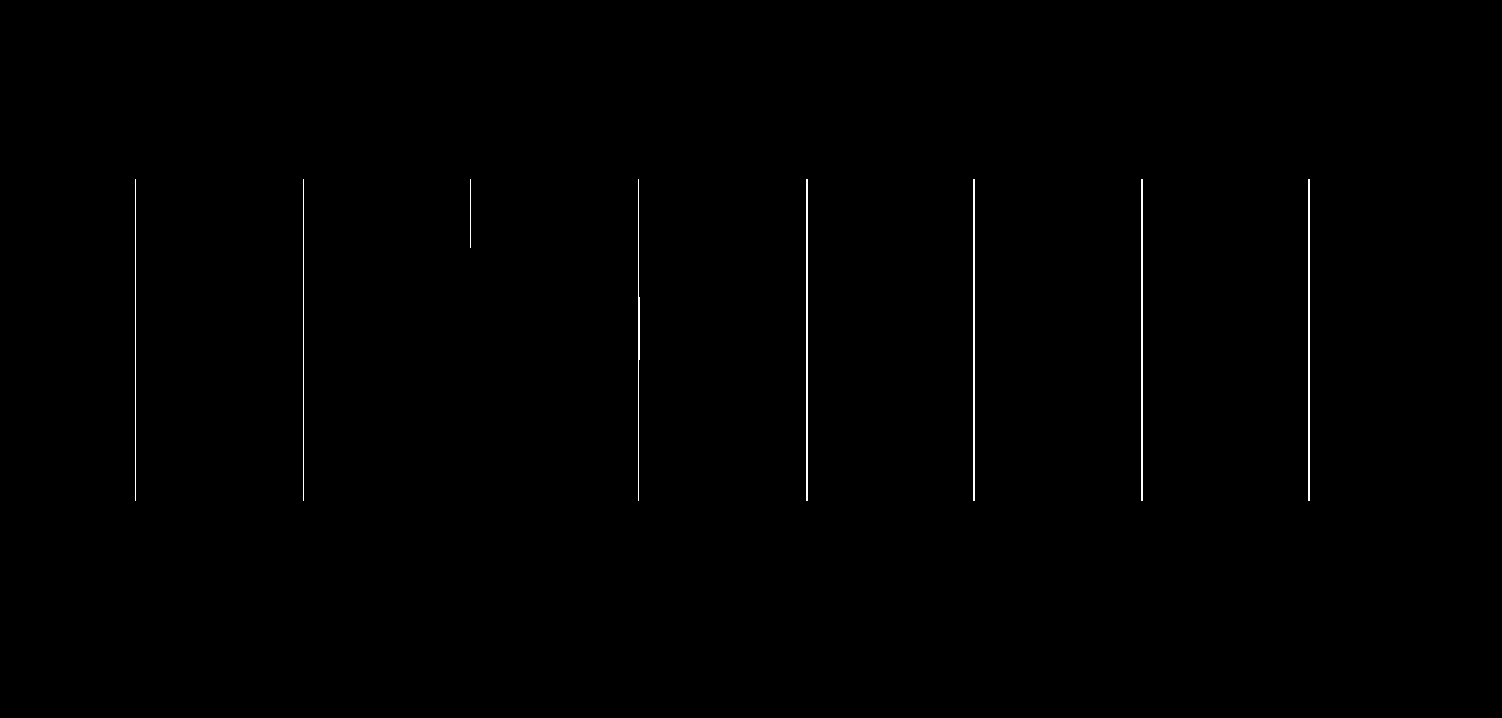

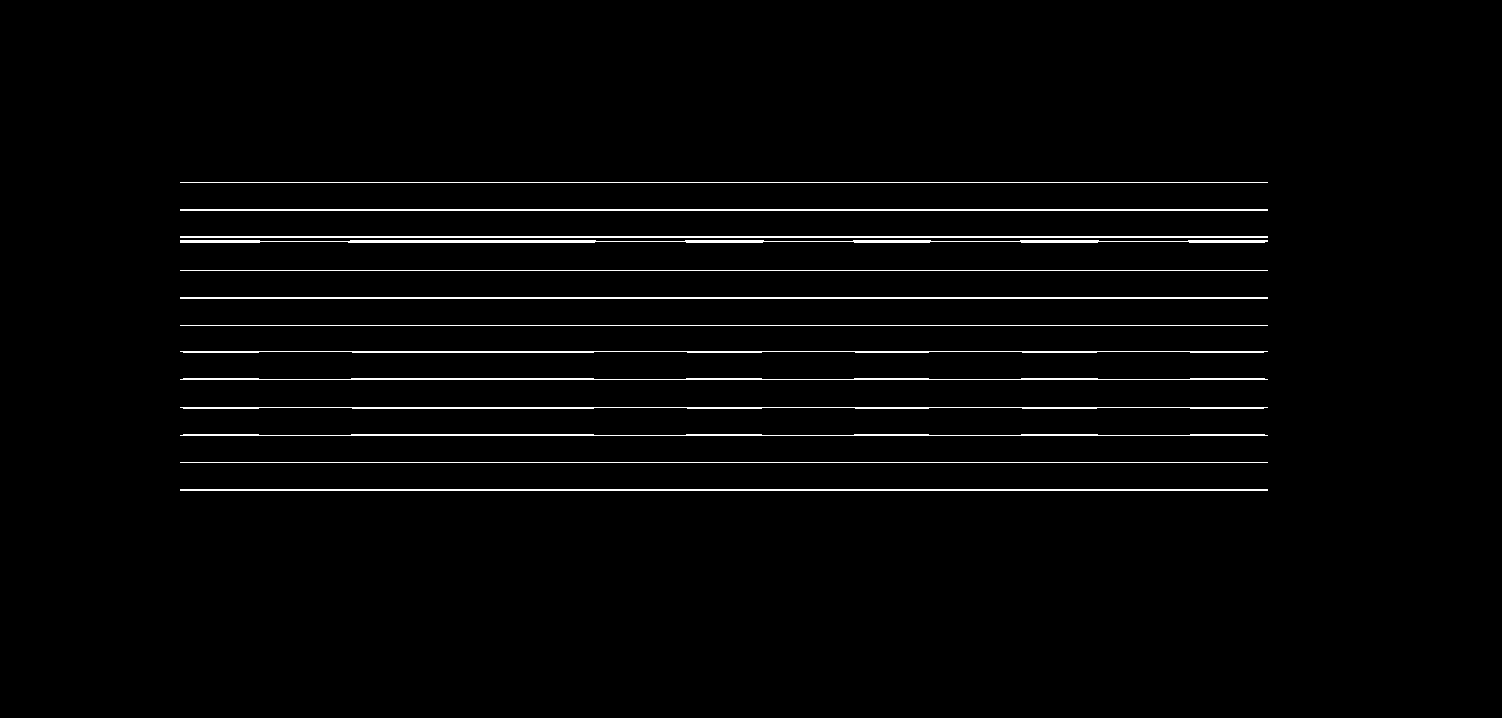

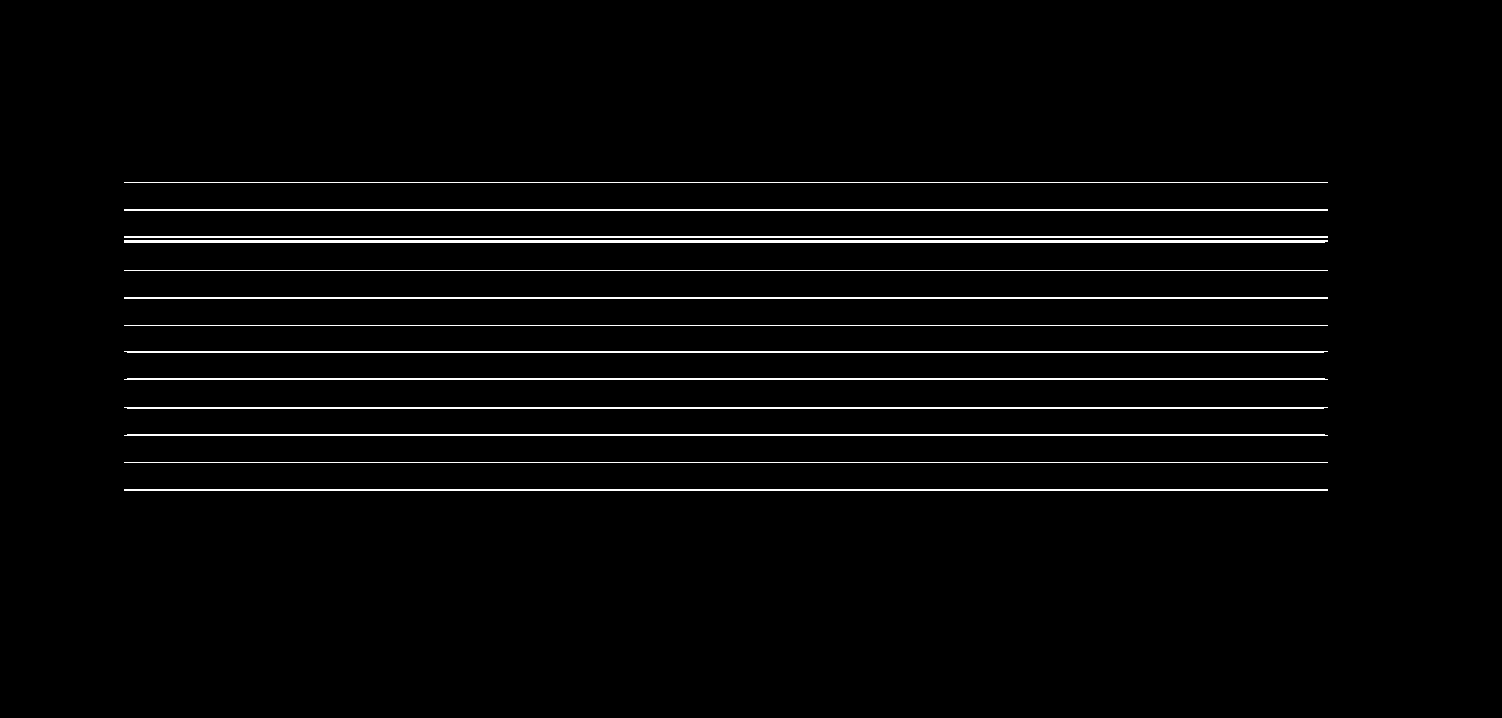

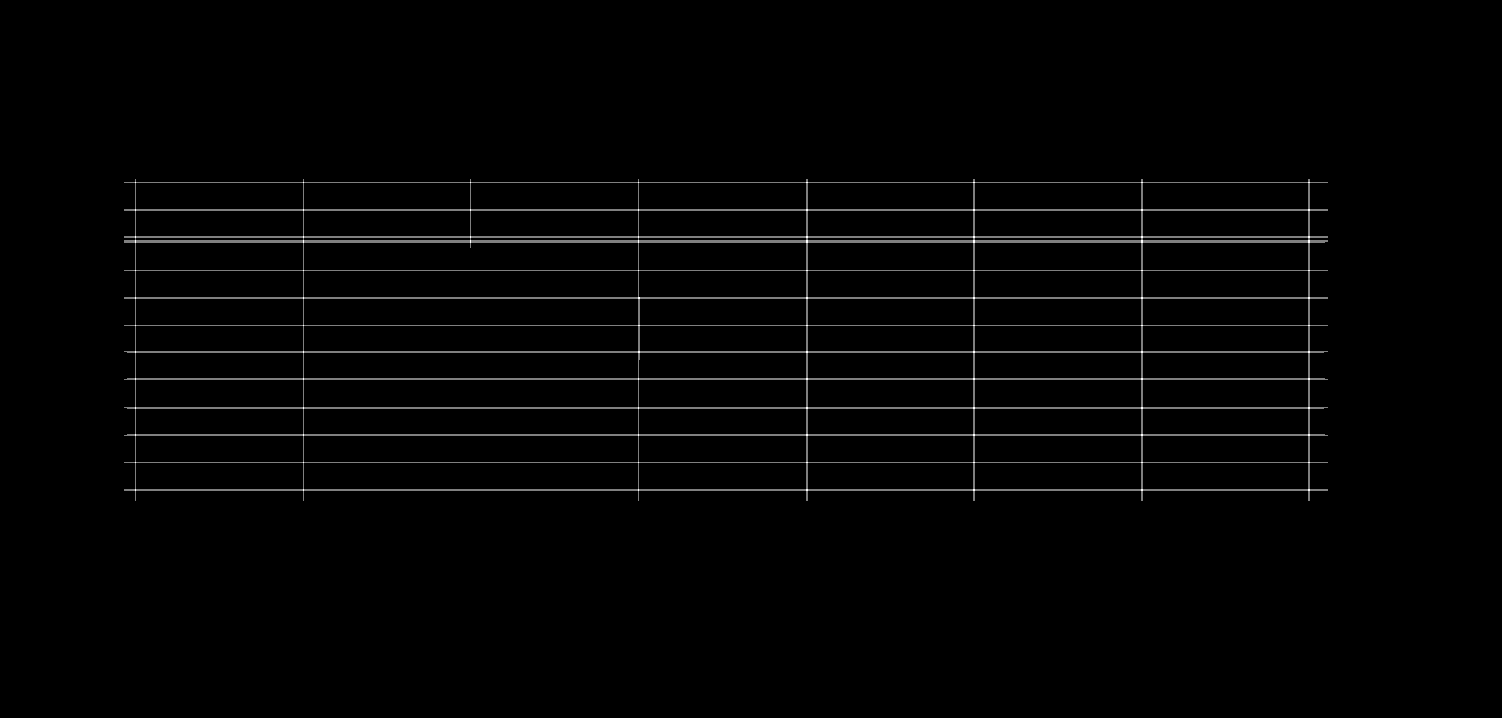

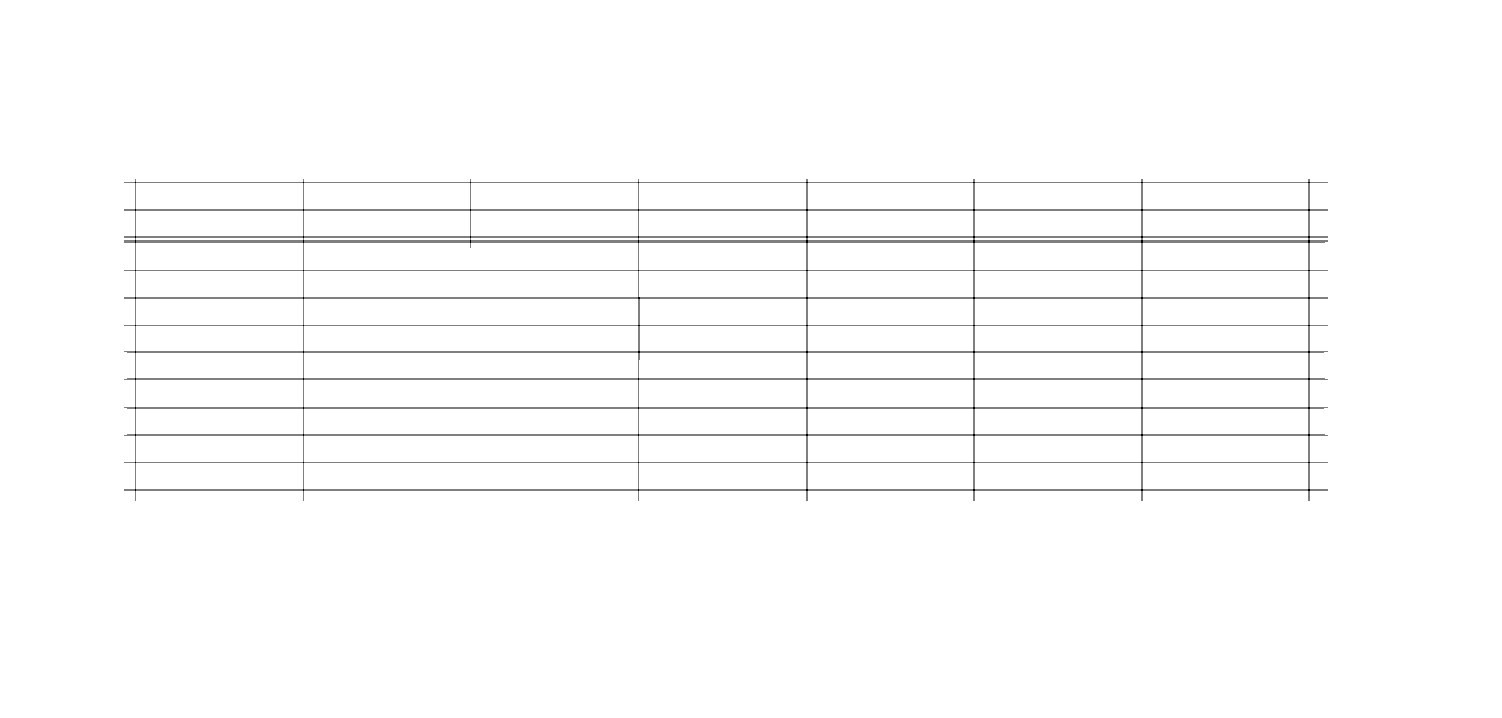

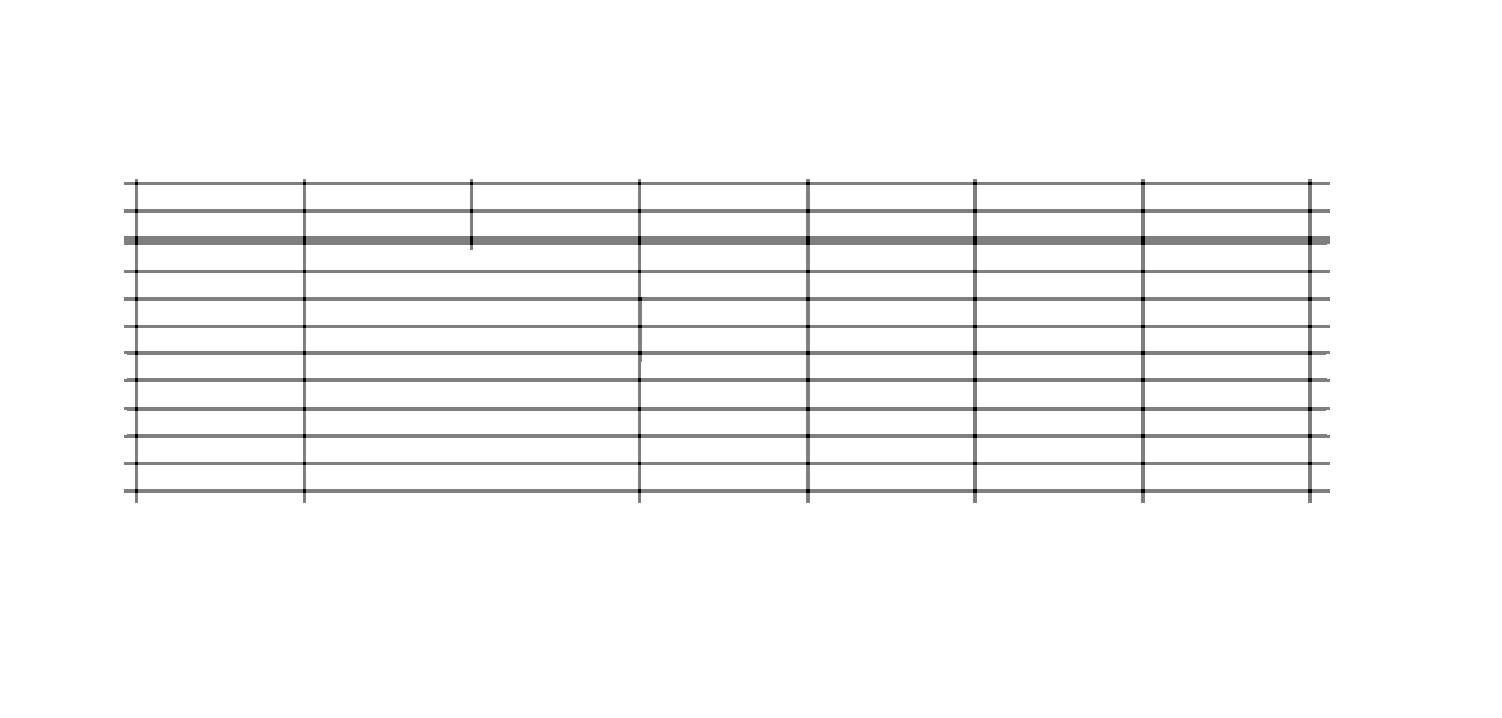

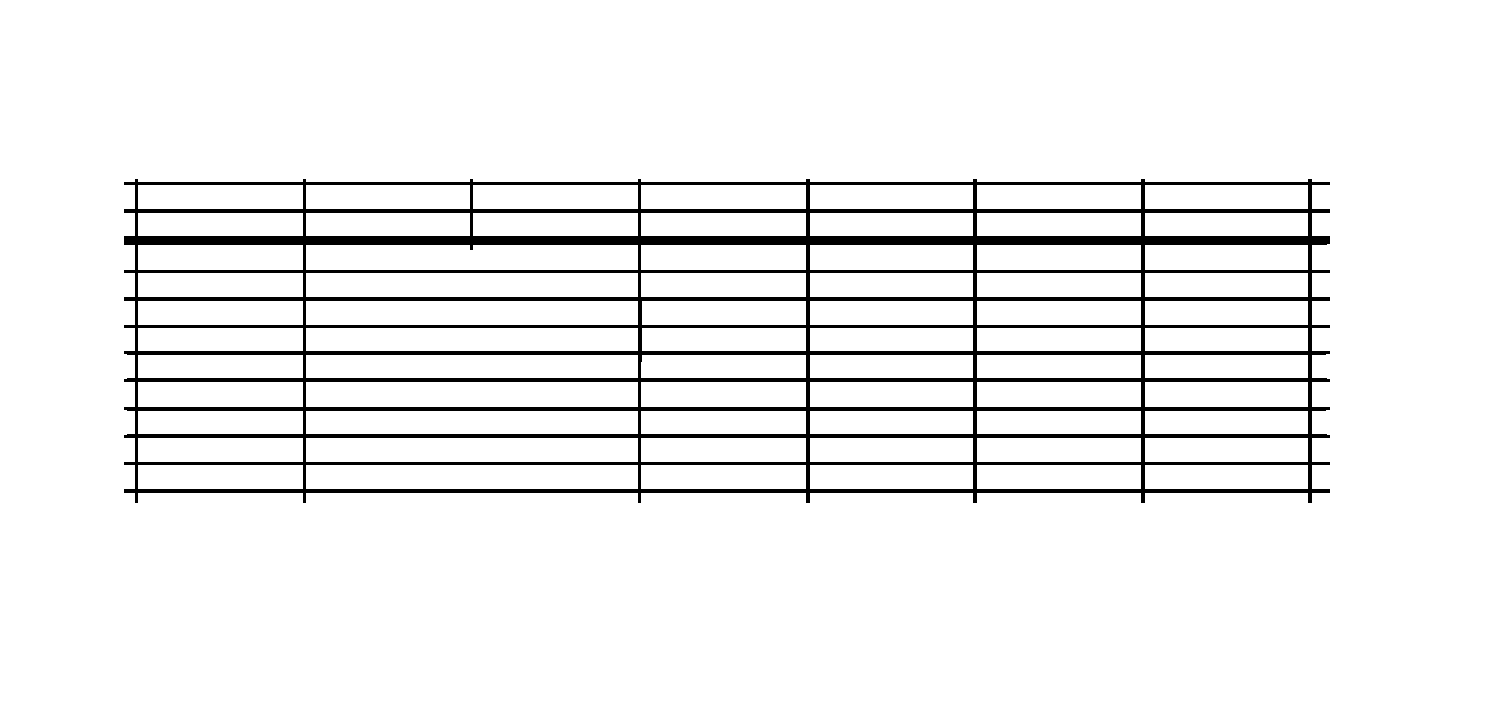

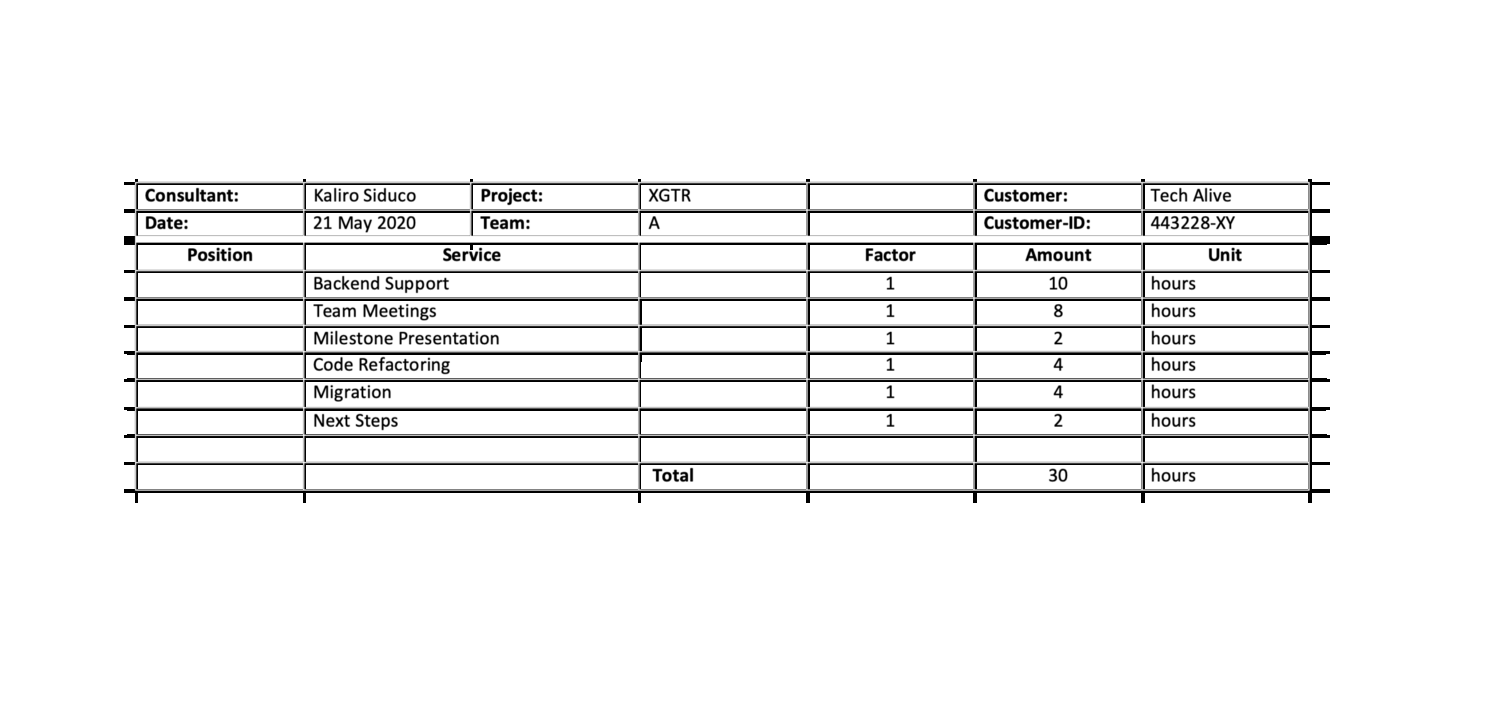

x 0 y 0 w 1502 h 718
x 123 y 178 w 1208 h 326
x 1145 y 185 w 163 h 24
x 977 y 185 w 164 h 24
x 810 y 185 w 163 h 24
x 641 y 185 w 165 h 24
x 473 y 185 w 165 h 24
x 306 y 185 w 164 h 24
x 138 y 185 w 165 h 24
x 1145 y 213 w 163 h 23
x 977 y 213 w 164 h 23
x 810 y 213 w 163 h 23
x 641 y 213 w 165 h 23
x 473 y 213 w 165 h 23
x 306 y 213 w 164 h 23
x 138 y 213 w 165 h 23
x 1145 y 245 w 163 h 25
x 977 y 245 w 164 h 25
x 810 y 245 w 163 h 25
x 641 y 245 w 165 h 25
x 306 y 245 w 332 h 25
x 138 y 245 w 165 h 25
x 1145 y 273 w 163 h 24
x 977 y 273 w 164 h 24
x 810 y 273 w 163 h 24
x 641 y 273 w 165 h 24
x 306 y 273 w 332 h 24
x 138 y 273 w 165 h 24
x 1145 y 301 w 163 h 24
x 977 y 301 w 164 h 24
x 810 y 301 w 163 h 24
x 642 y 301 w 164 h 24
x 306 y 301 w 332 h 24
x 138 y 301 w 165 h 24
x 1145 y 328 w 163 h 23
x 977 y 328 w 164 h 23
x 810 y 328 w 163 h 23
x 642 y 328 w 164 h 23
x 306 y 328 w 332 h 23
x 138 y 328 w 165 h 23
x 1145 y 355 w 163 h 23
x 977 y 355 w 164 h 23
x 810 y 355 w 163 h 23
x 64

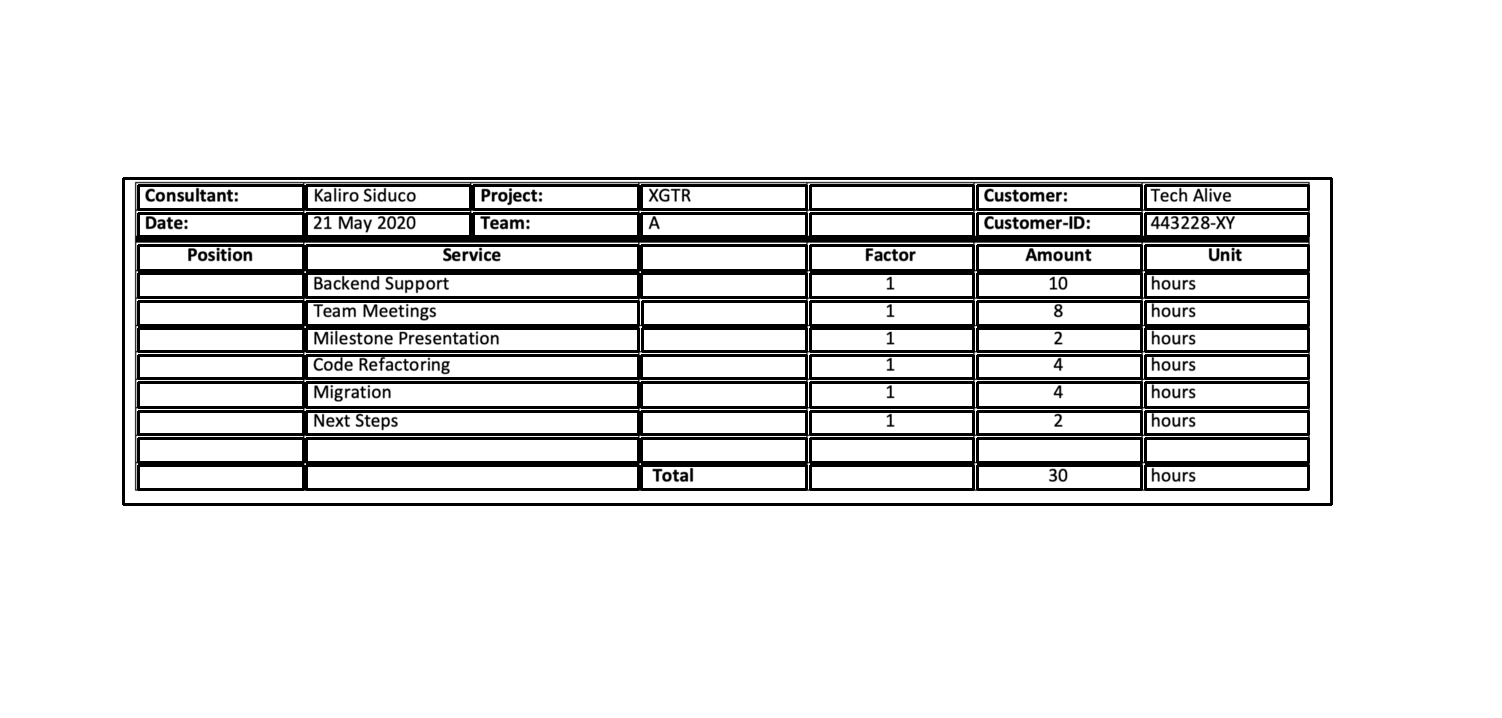

len 8
len 7
len 6
len 6
len 6
len 6
len 6
len 6
len 6
len 6
len 6


In [ ]:
bordered_table = cv2.imread("/content/Multi_Type_TD_TSR/images/bordered_example.png")
list_table_boxes = []

table_list = [bordered_table]

for table in table_list:
    finalboxes, output_img = tsrl.recognize_structure(table)
    list_table_boxes.append(finalboxes)

# Table Structure Recognition Unbordered Tables

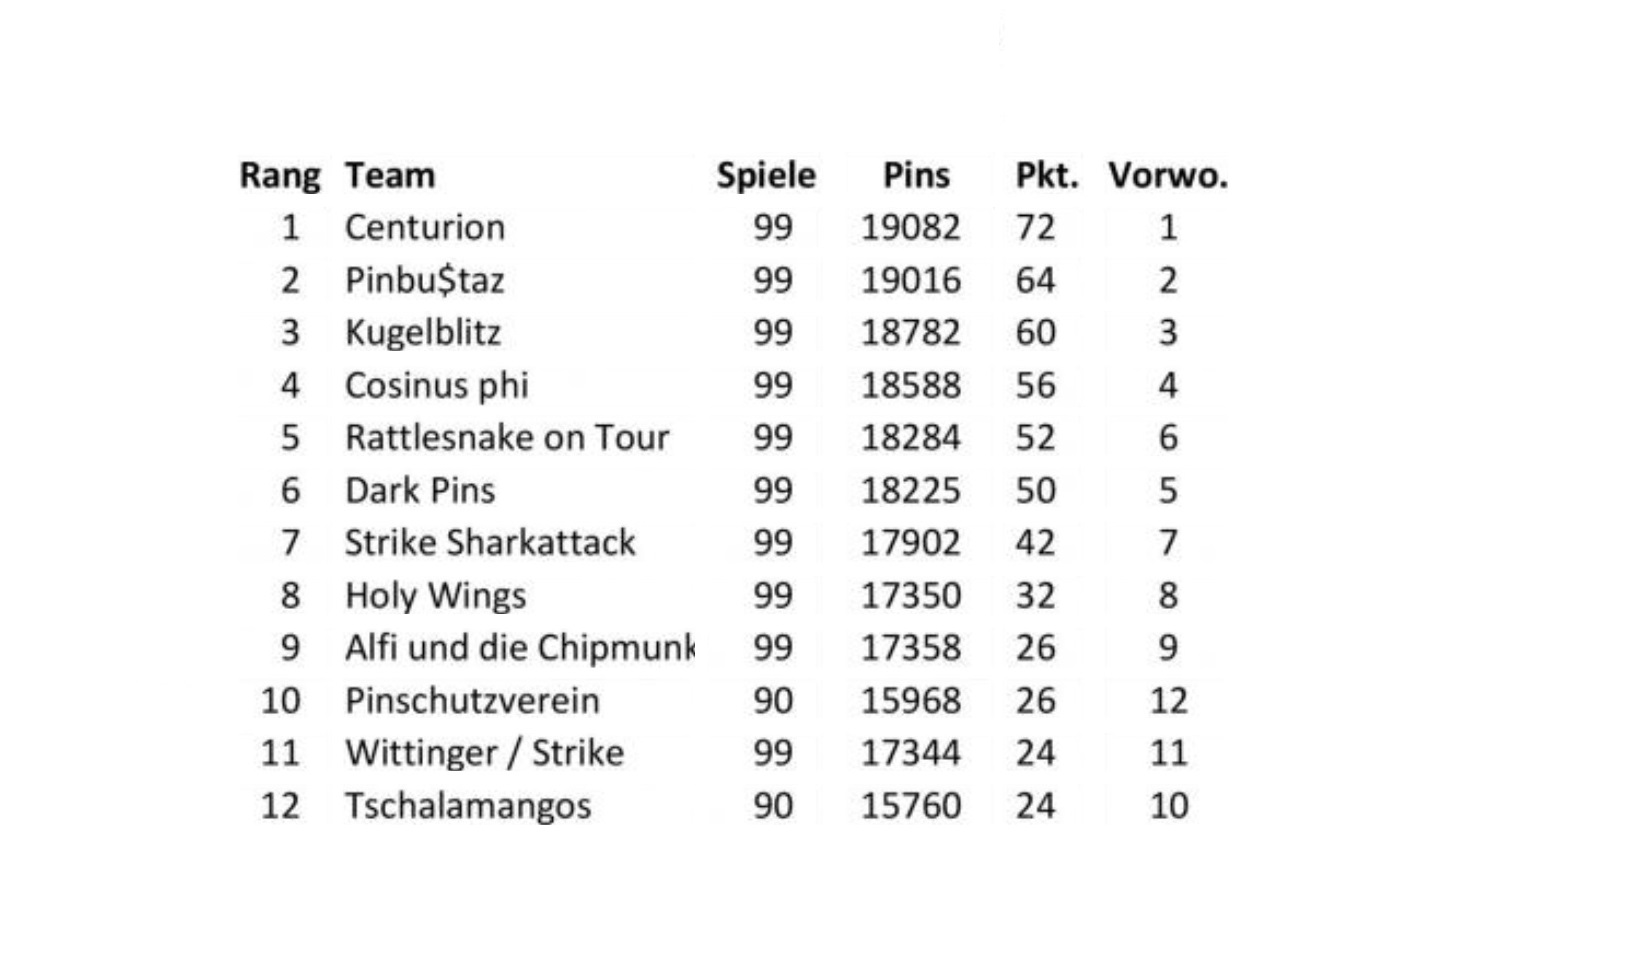

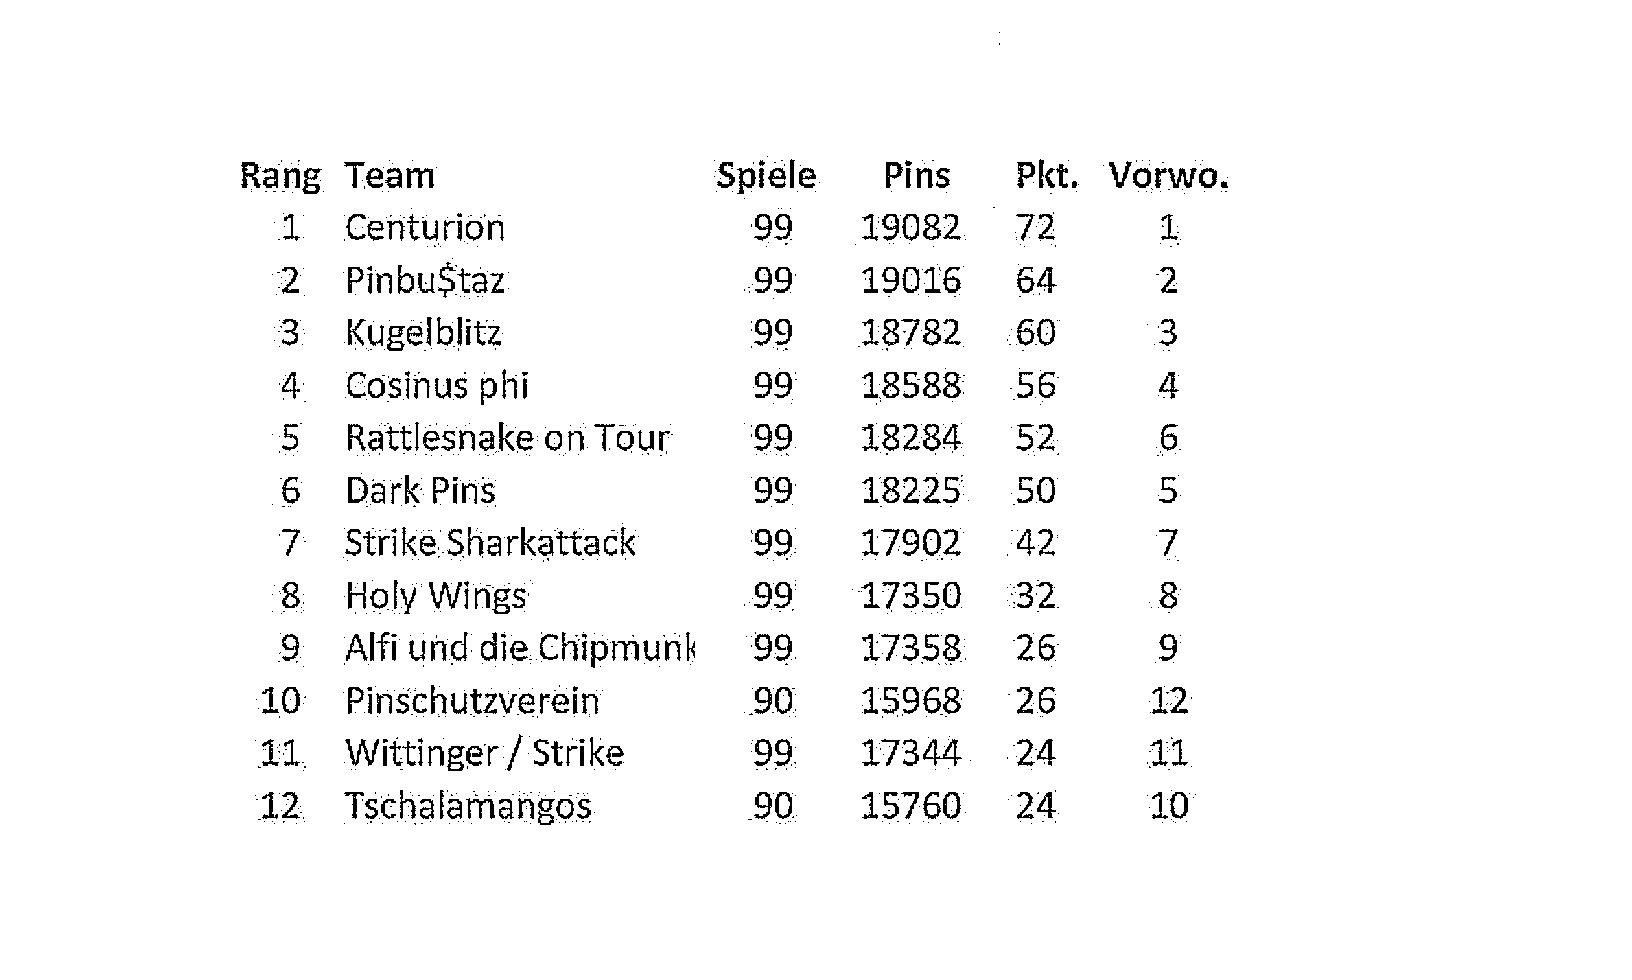

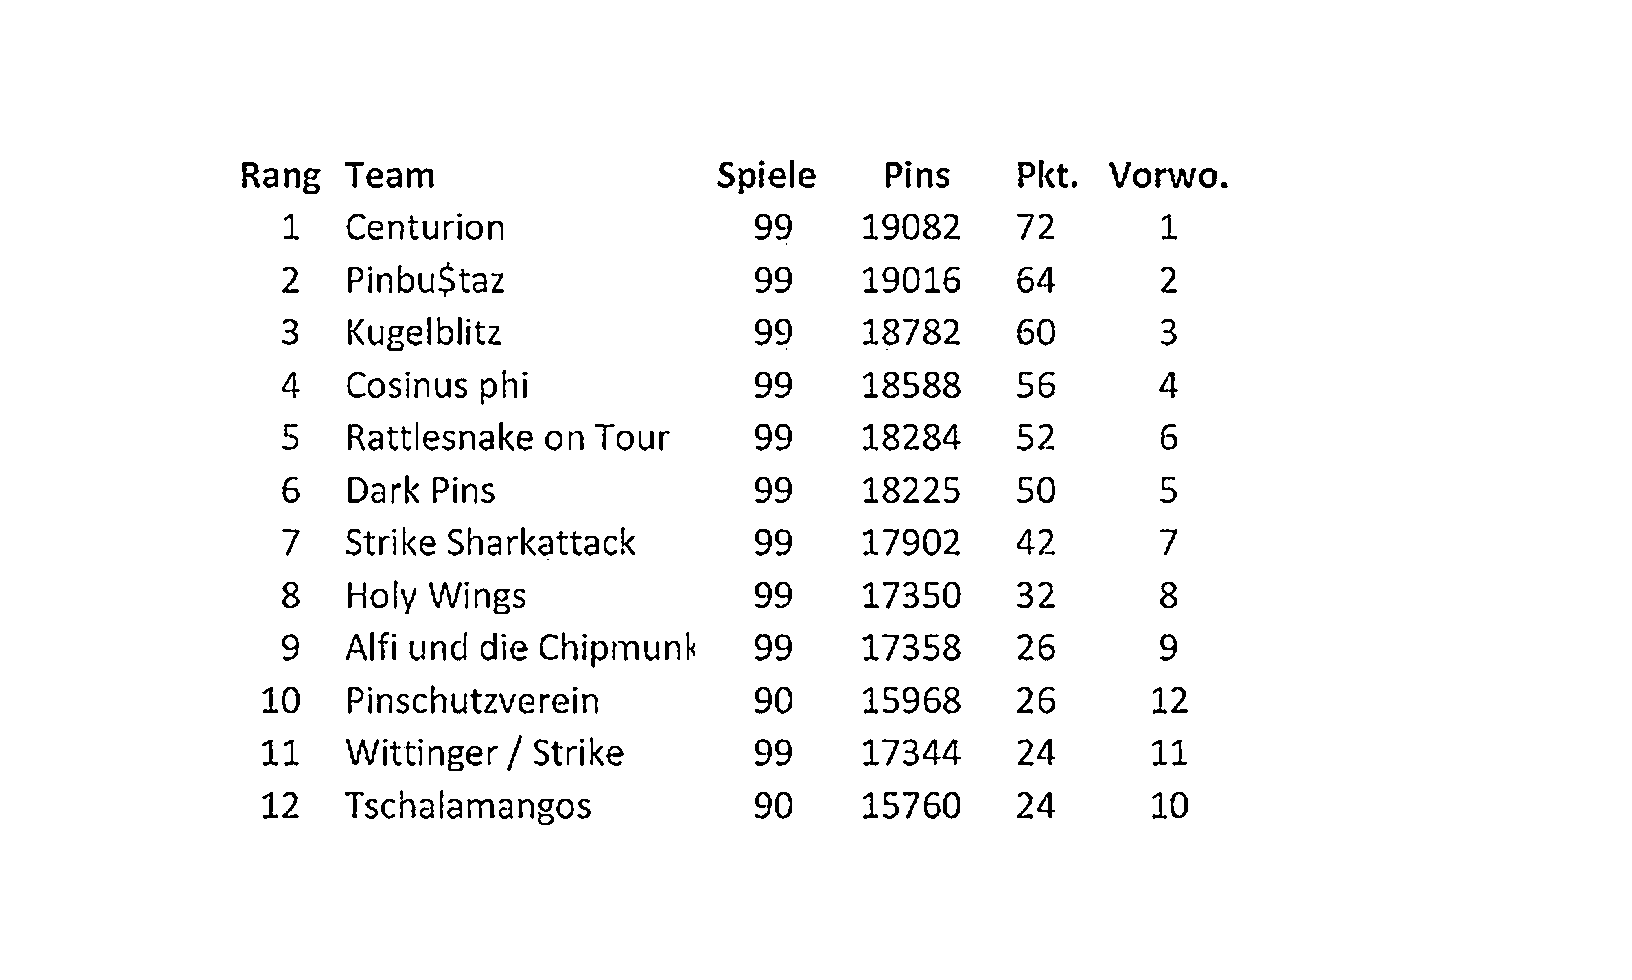

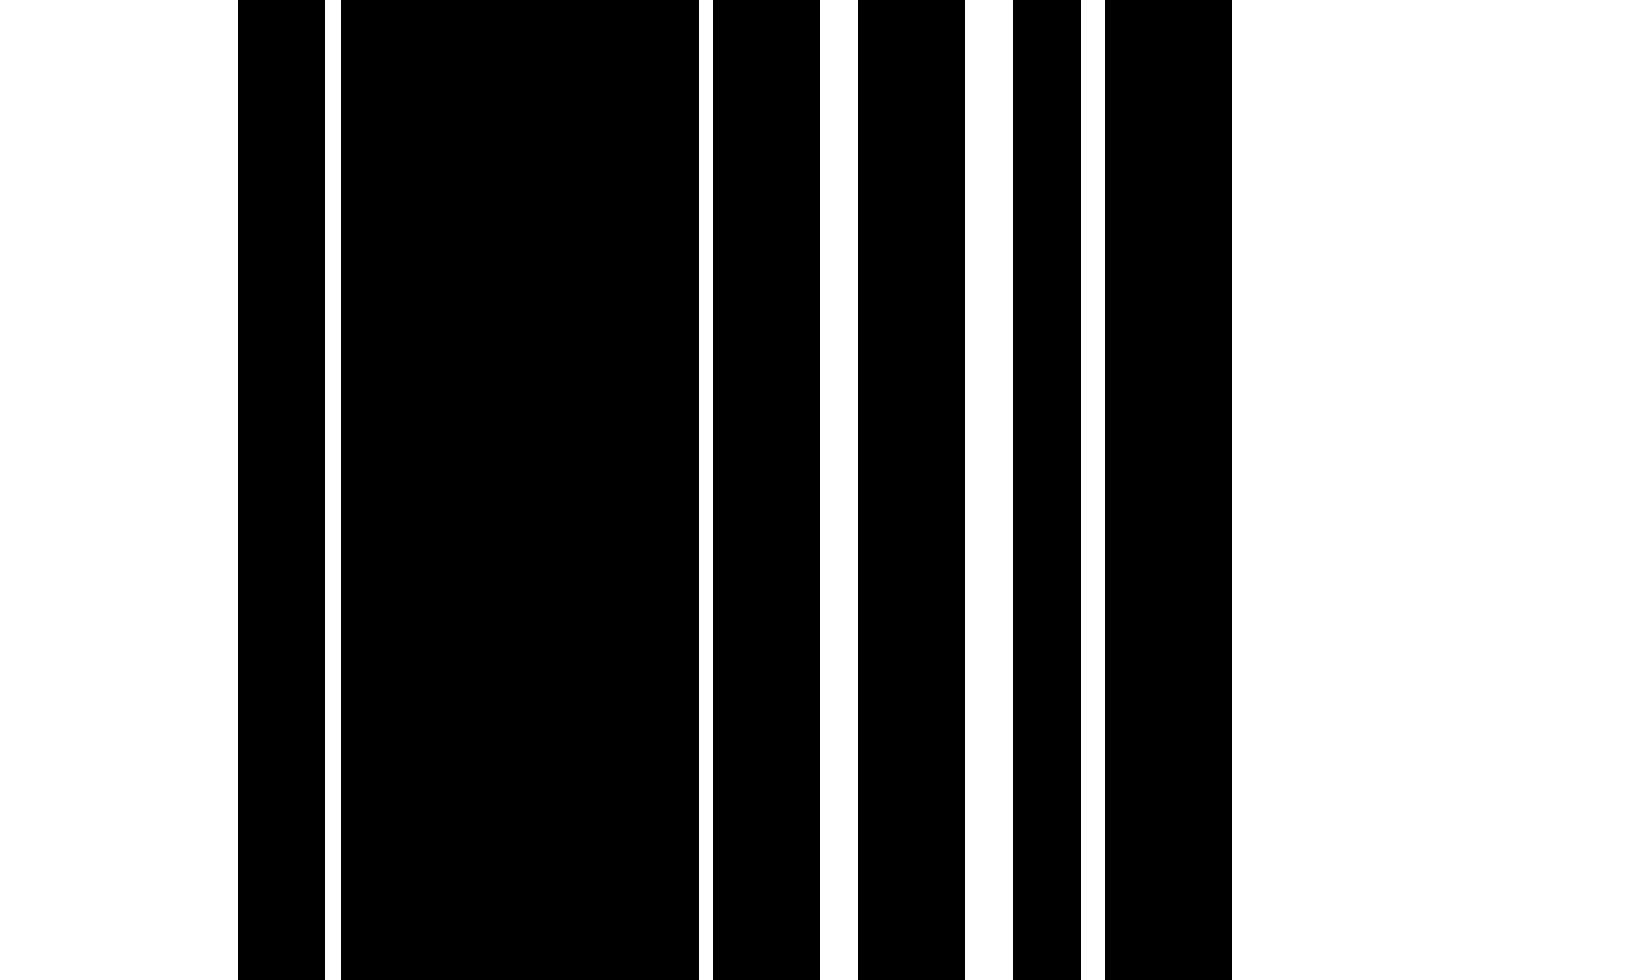

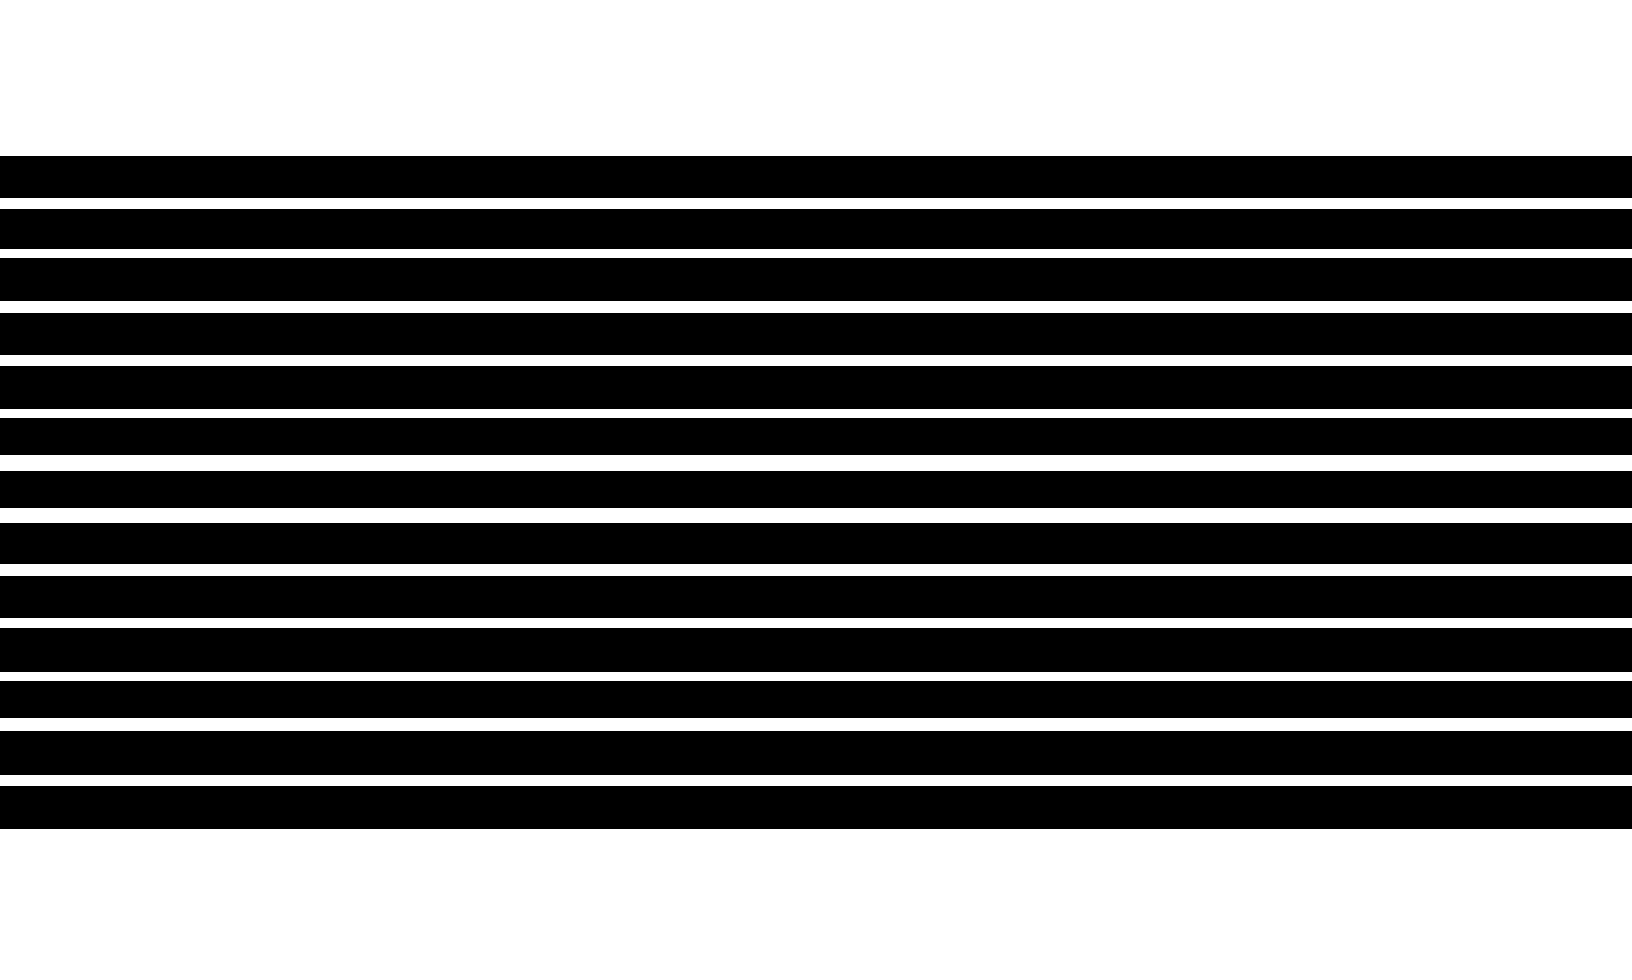

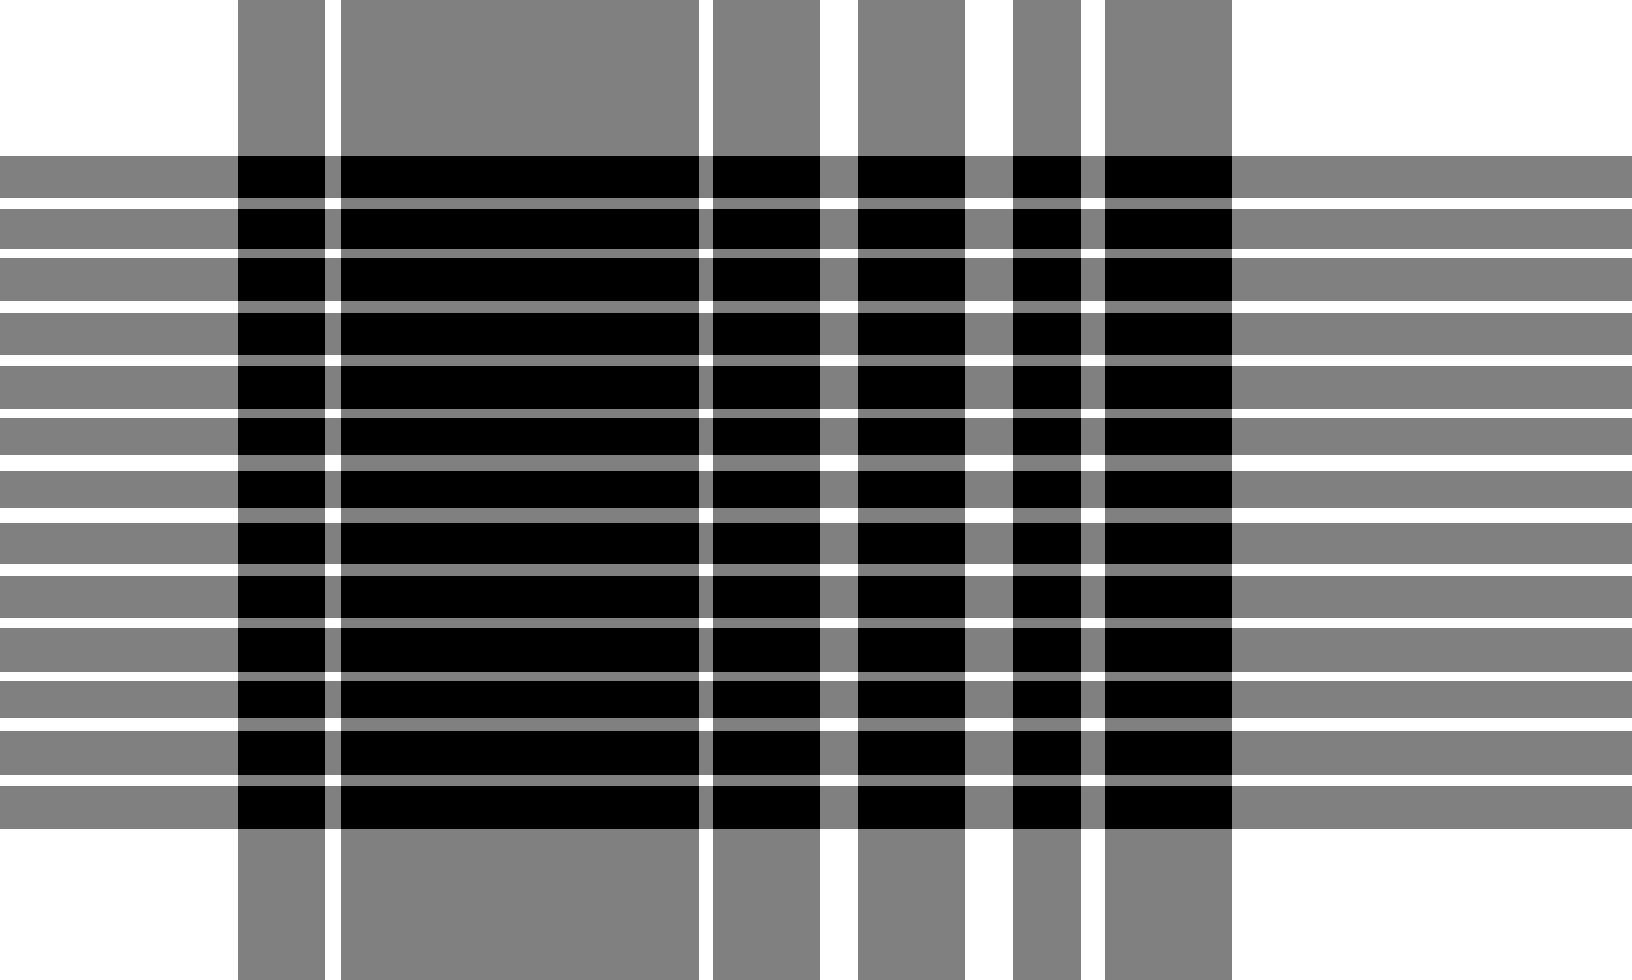

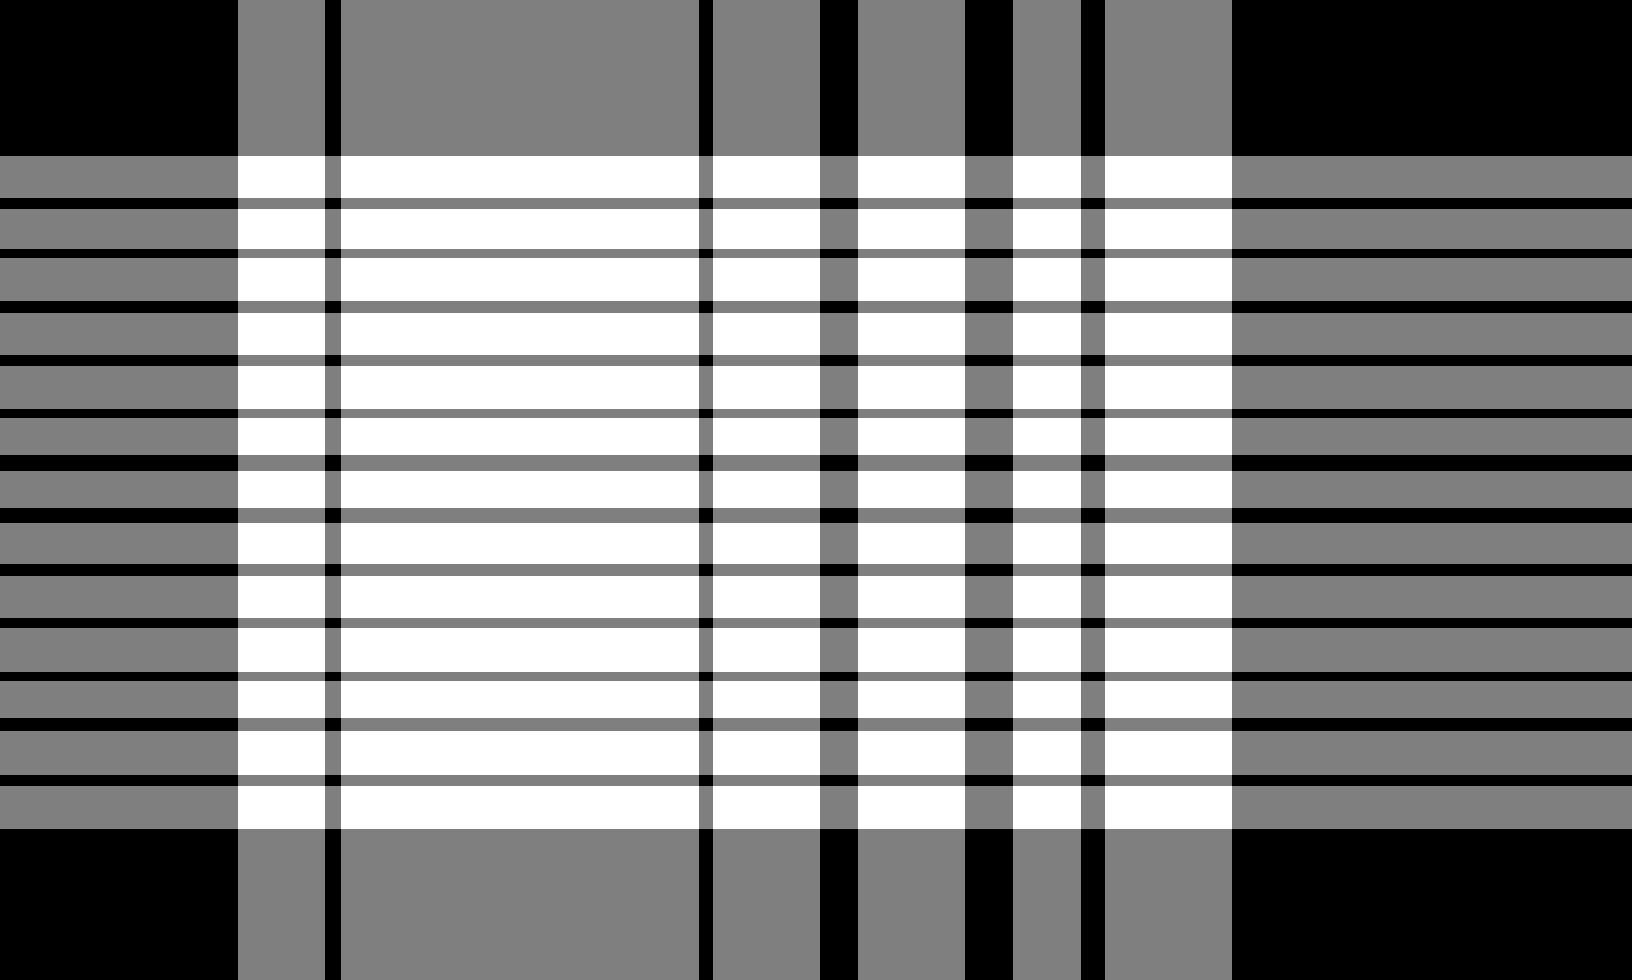

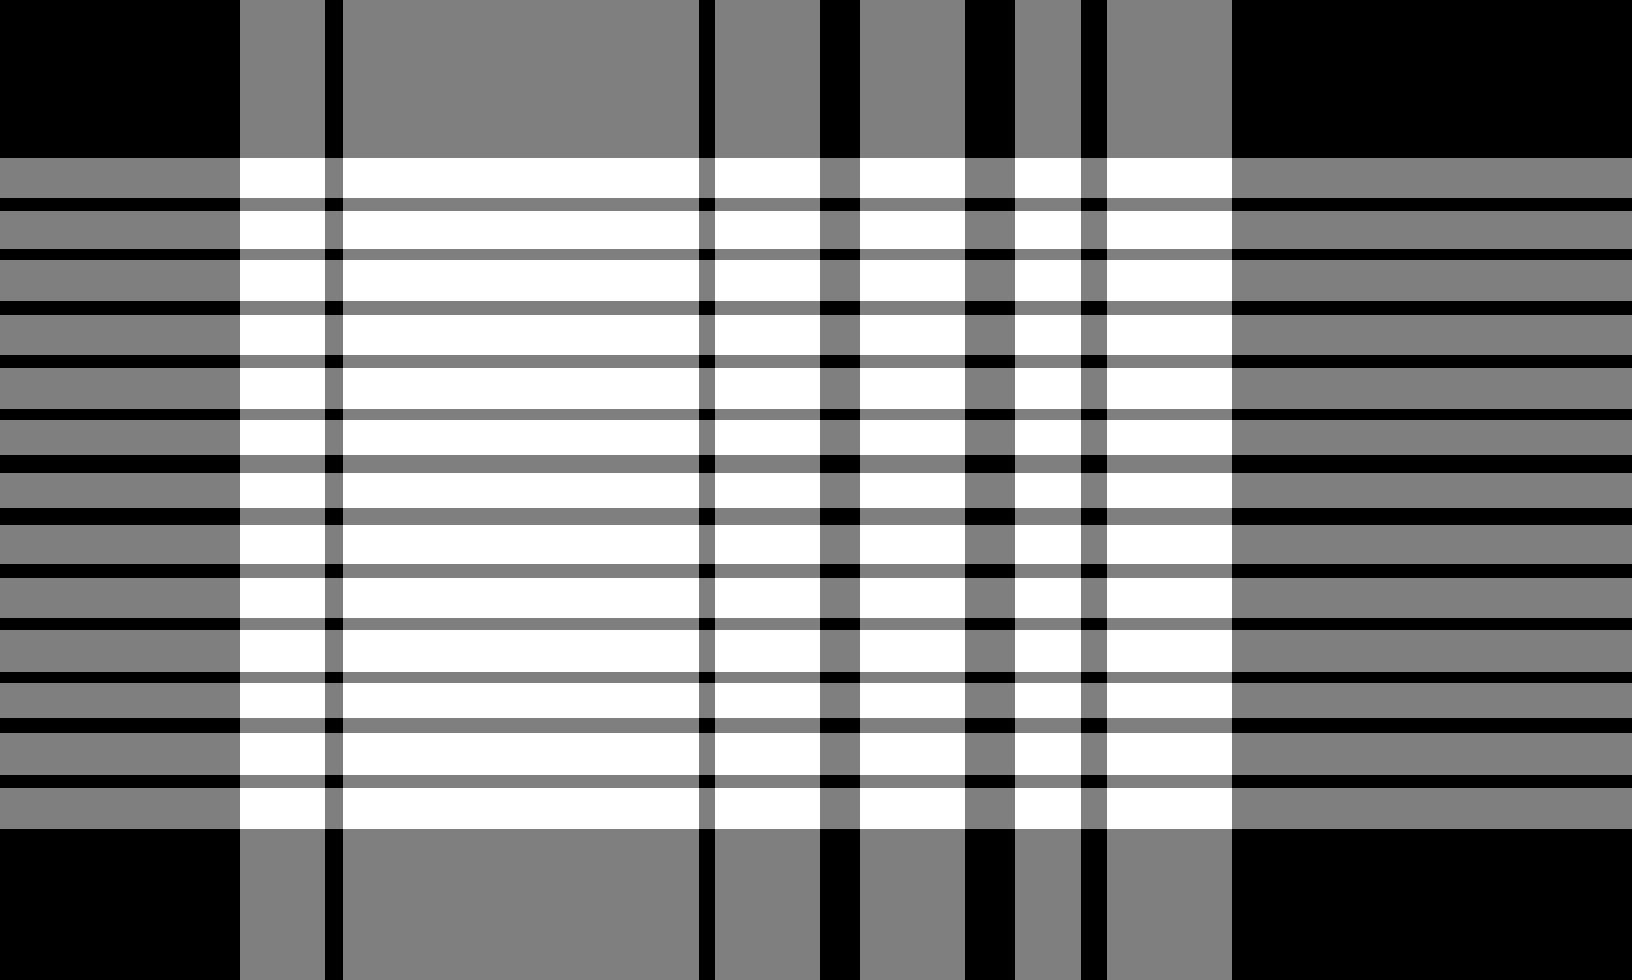

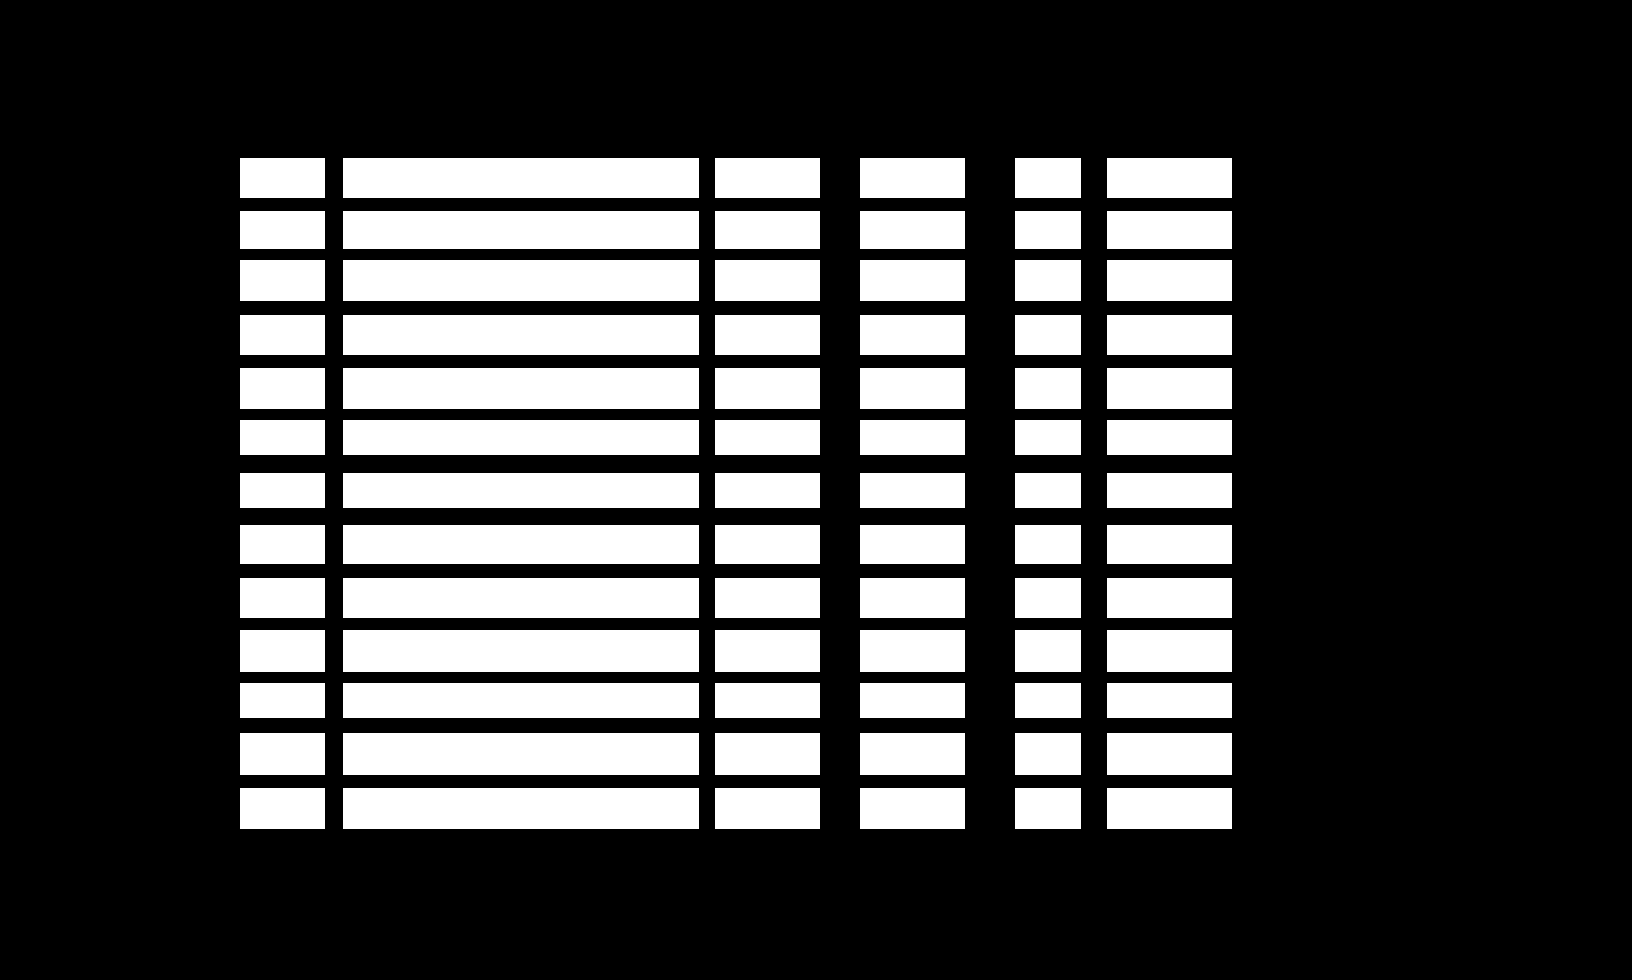

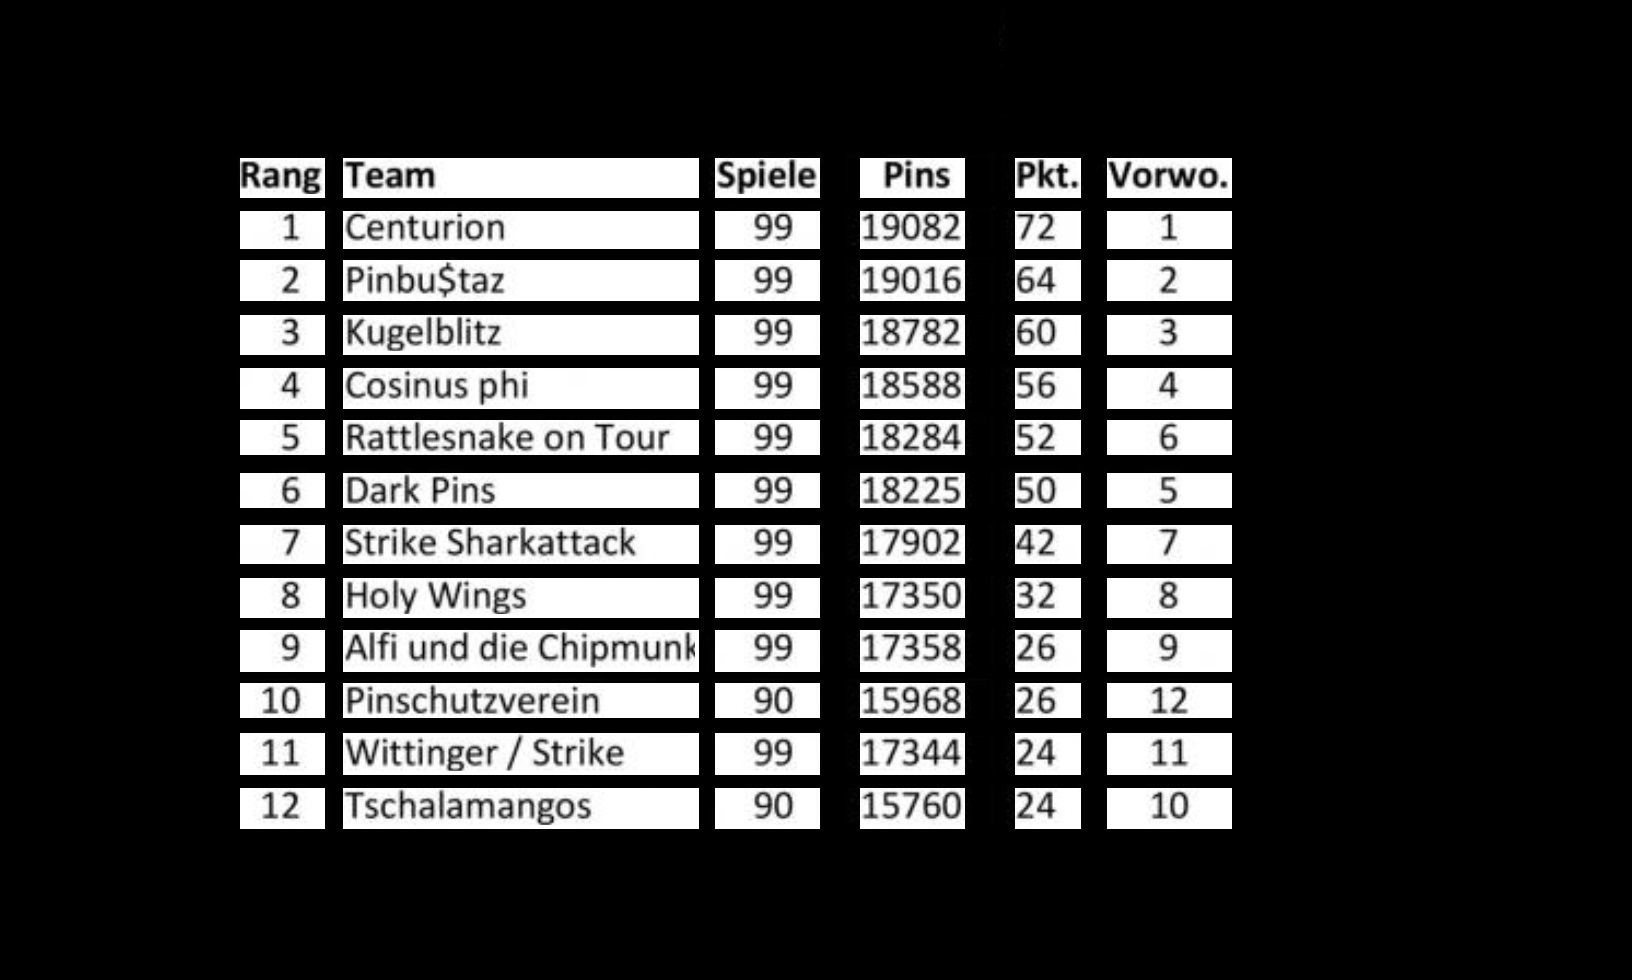

In [53]:
unbordered_table = cv2.imread("/content/Multi_Type_TD_TSR/images/unbordered_example.jpg")
list_table_boxes = []

table_list = [unbordered_table]

for table in table_list:
    finalboxes, output_img = tsrwol.recognize_structure(table)
    list_table_boxes.append(finalboxes)

#Table Structure Recognition Partially Bordered Tables

TABLE 0 :


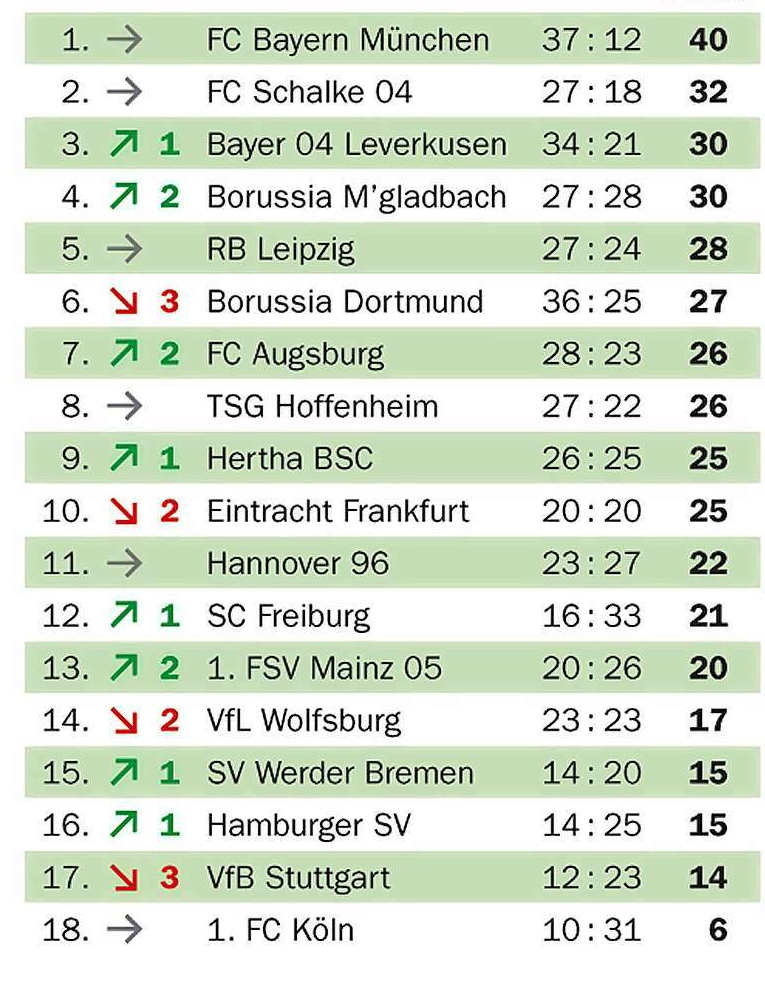


TABLE 1 :


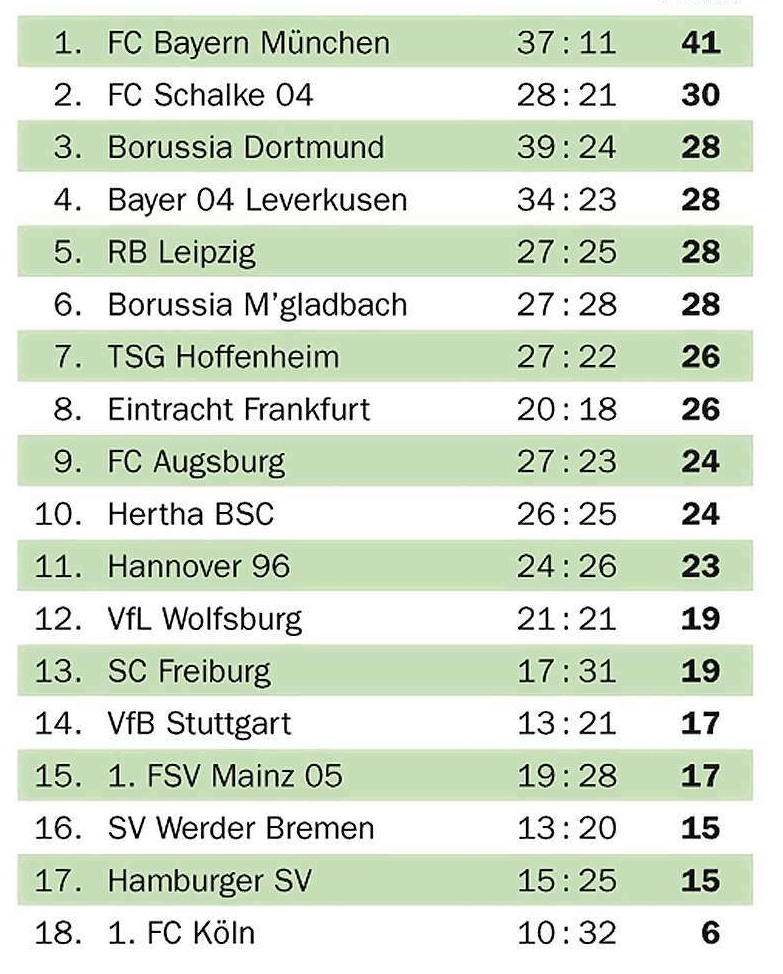

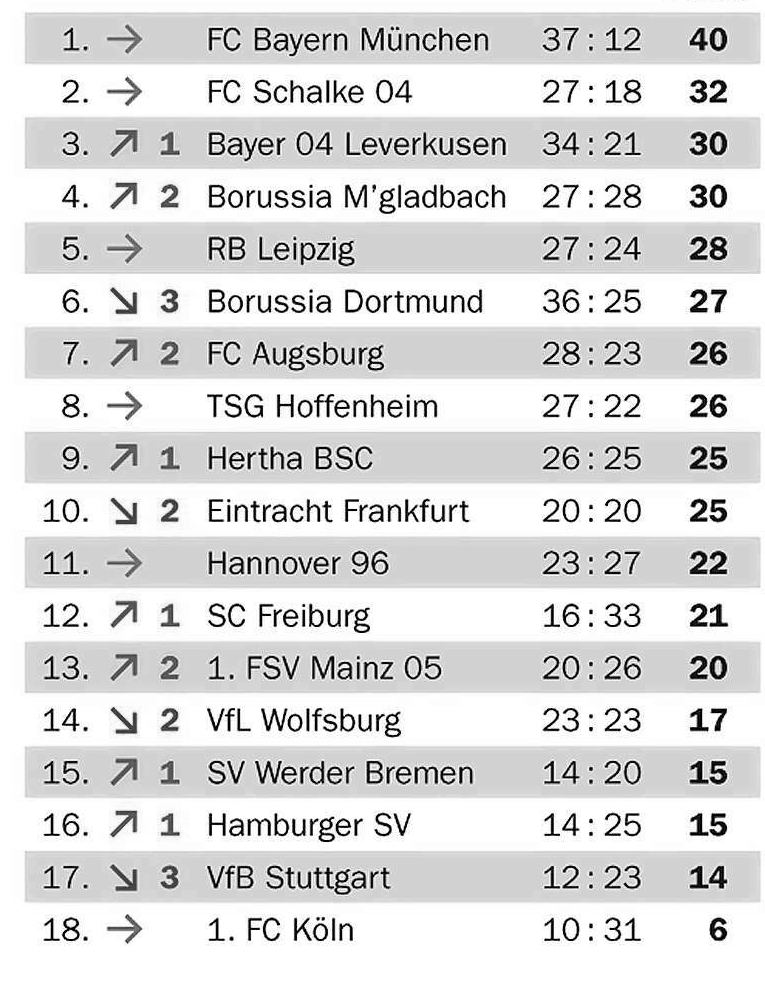

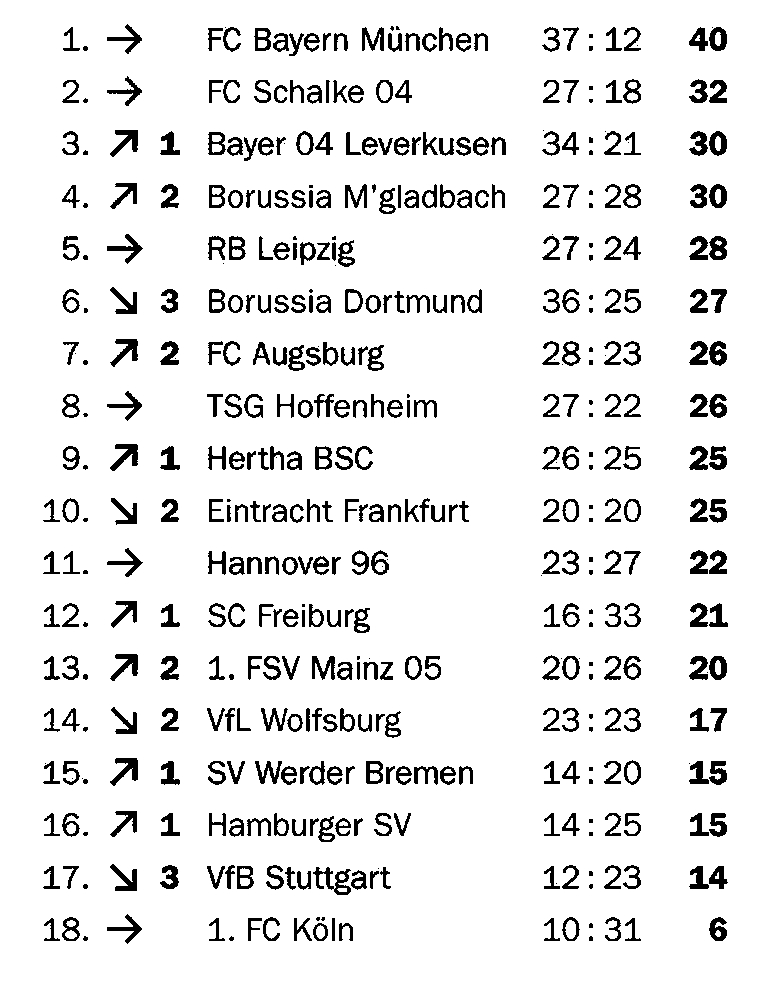

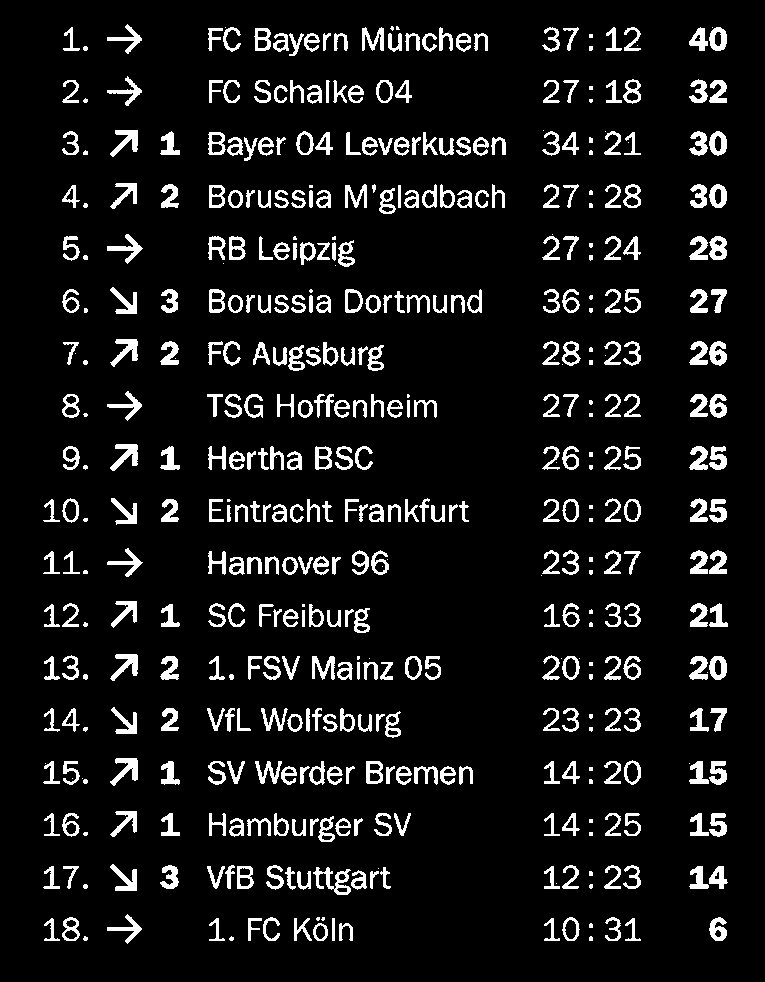

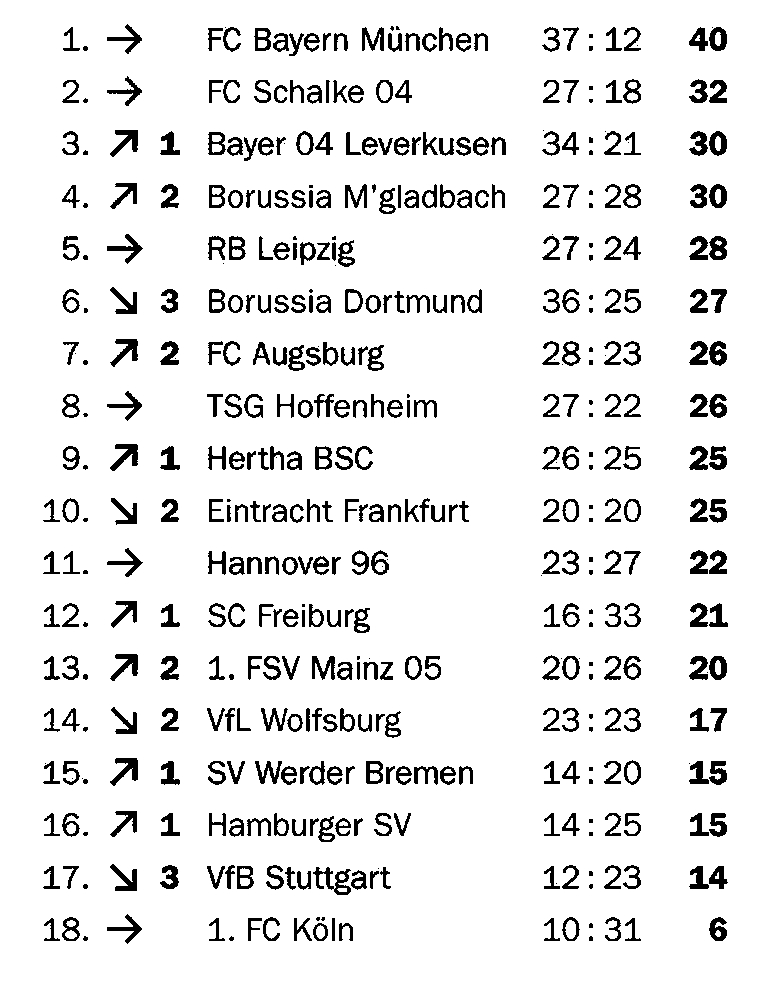

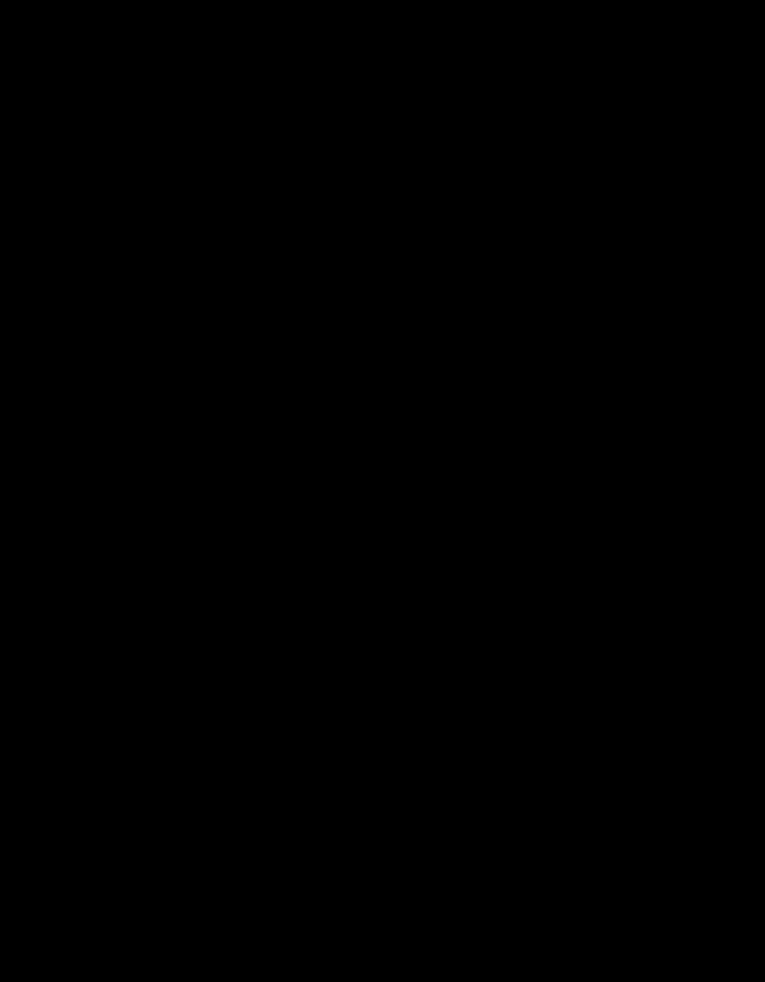

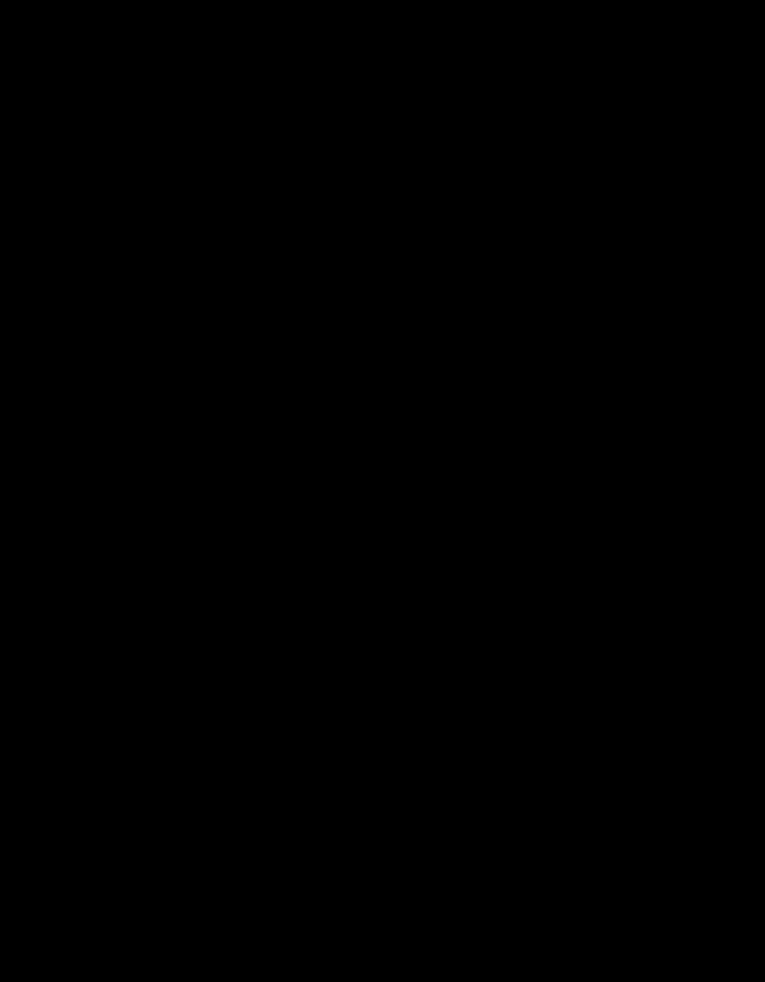

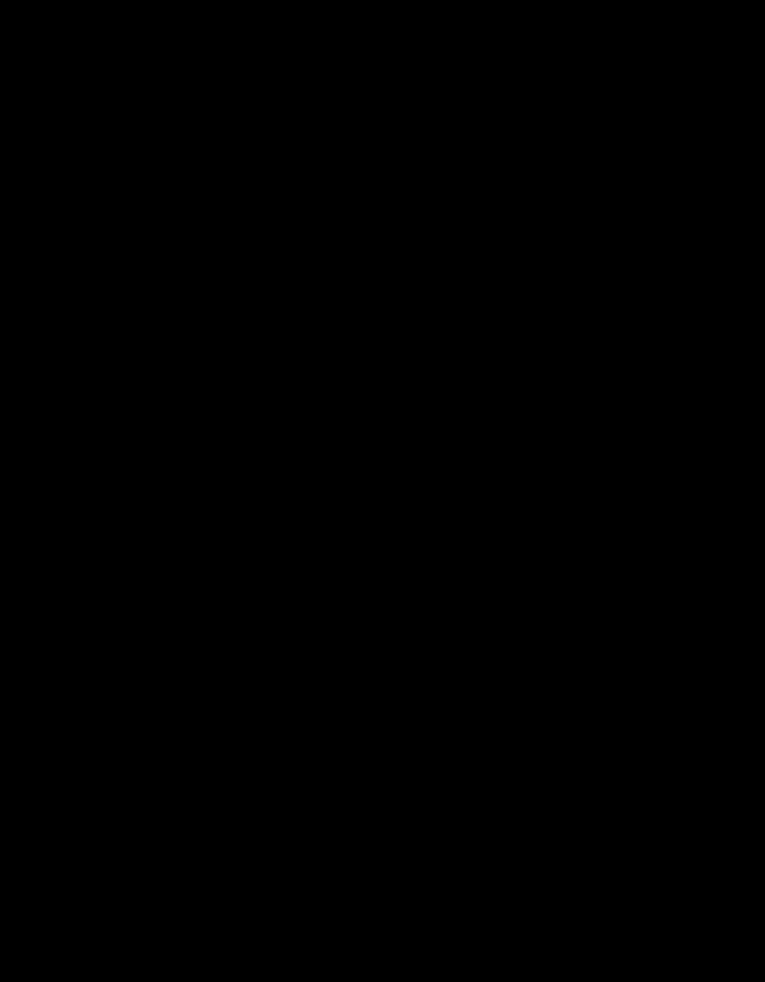

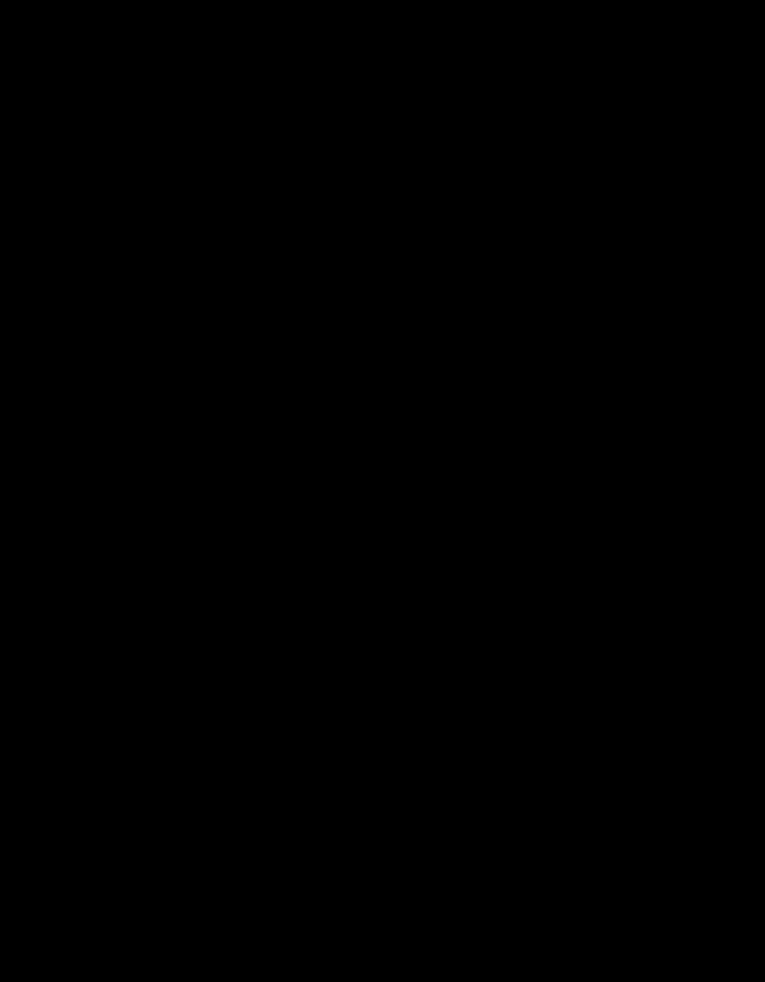

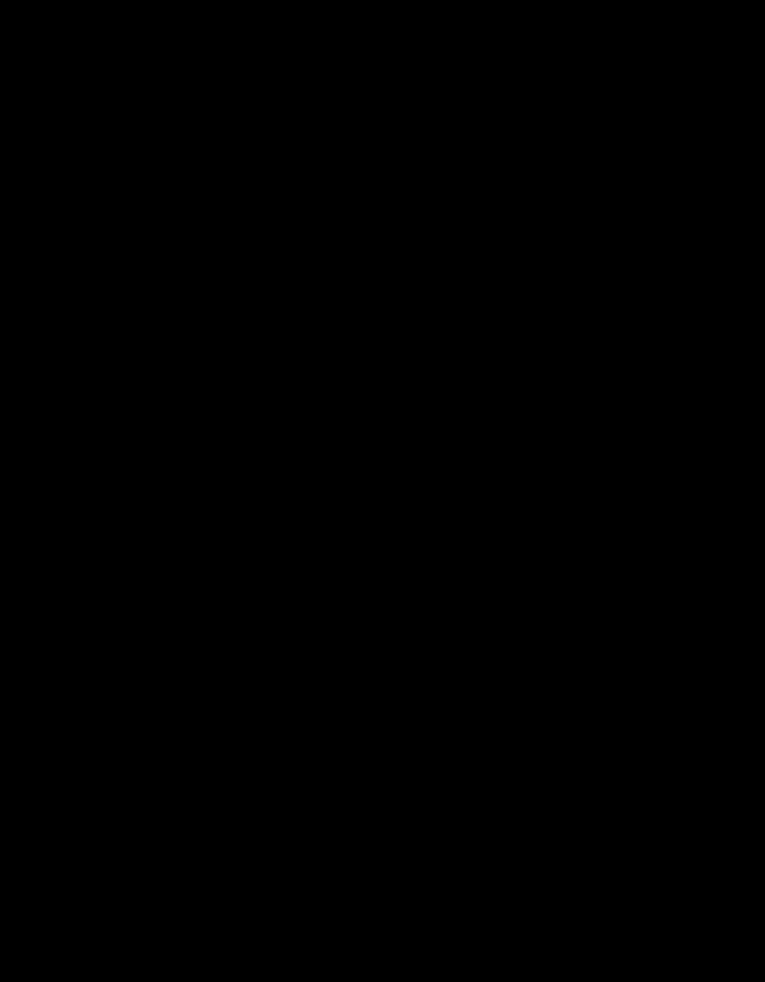

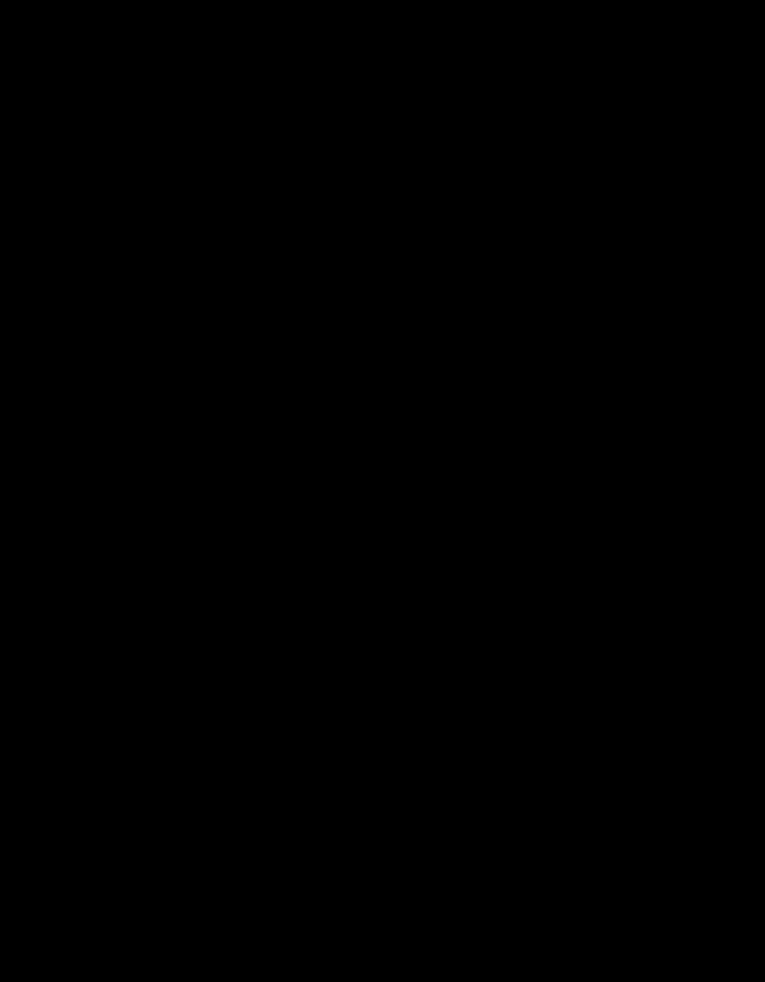

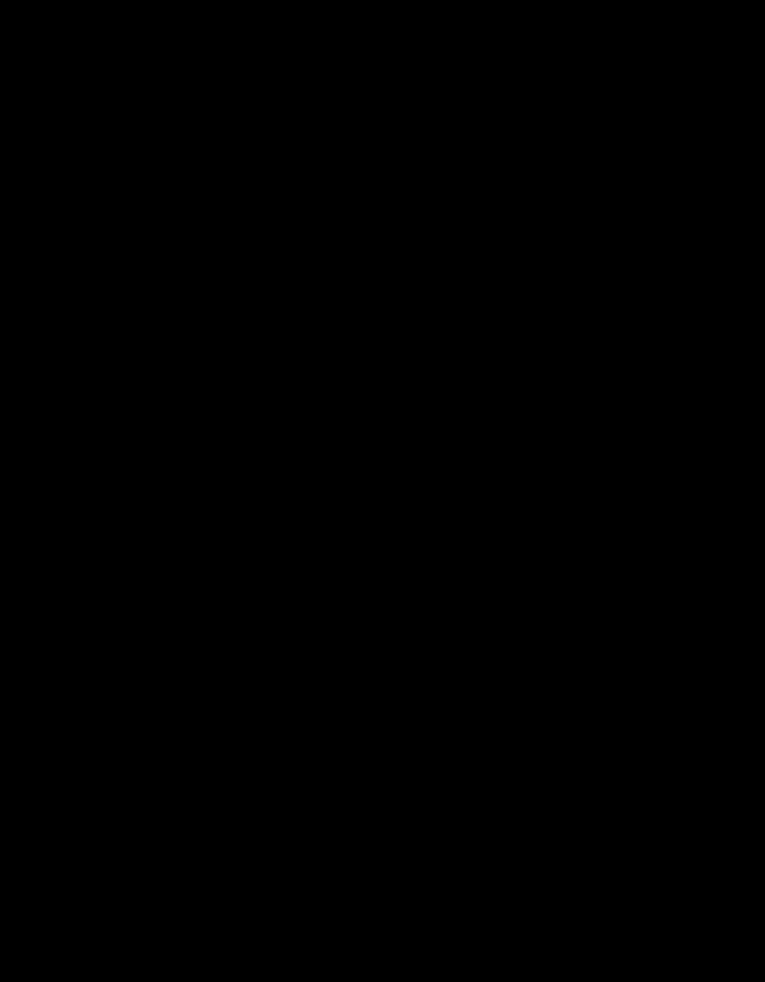

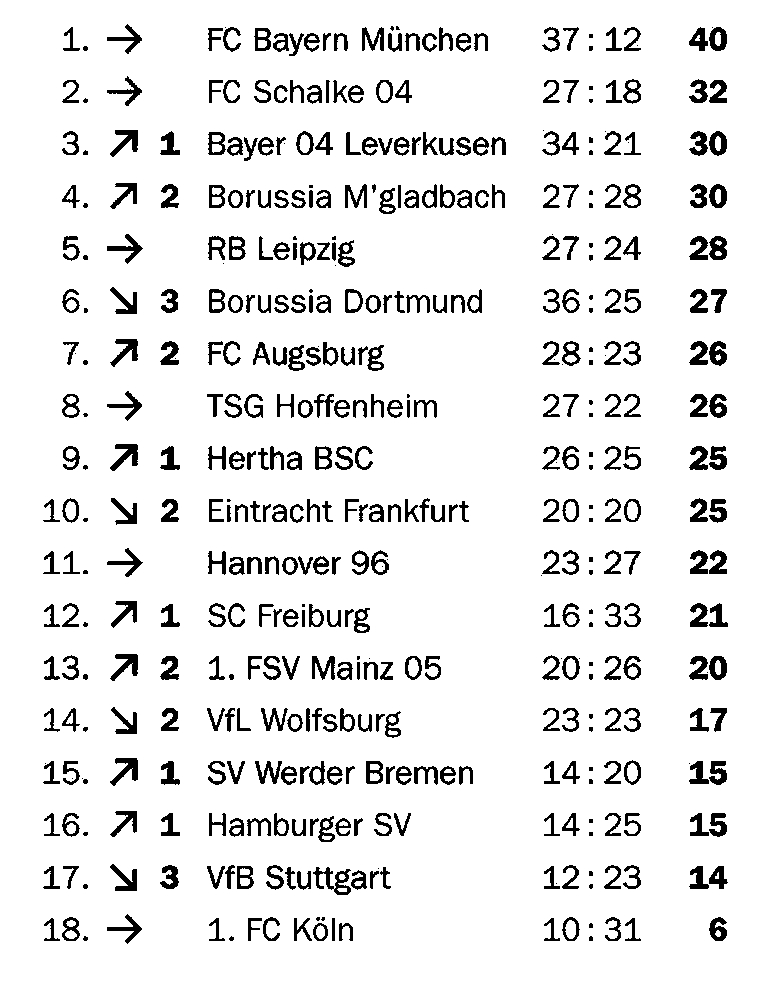

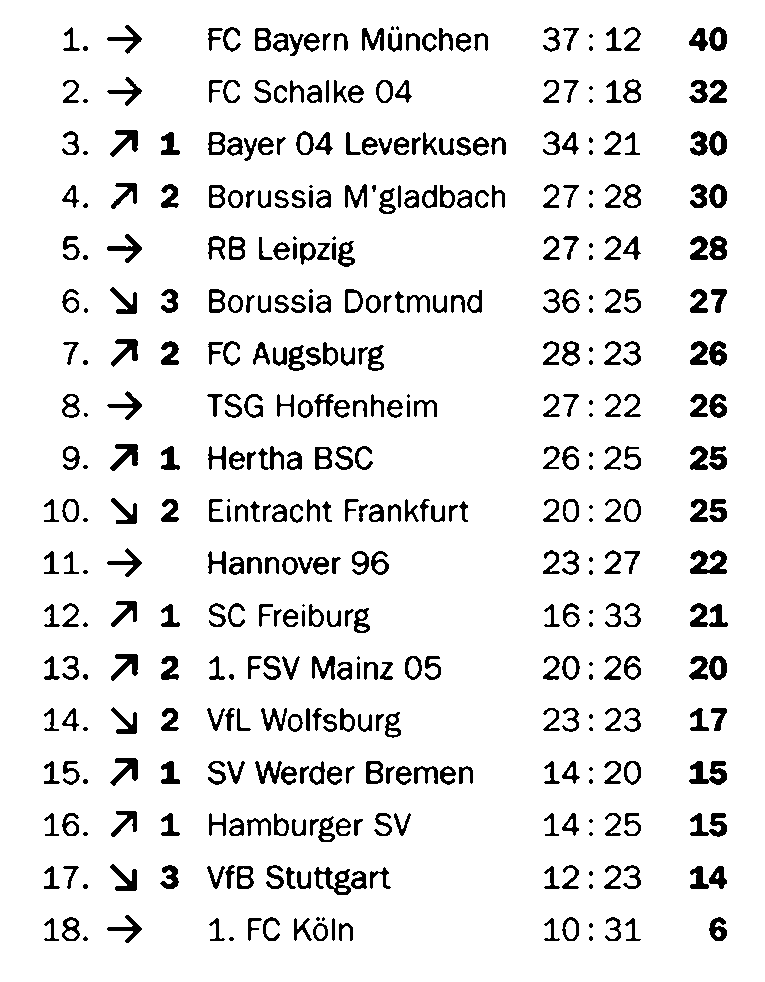

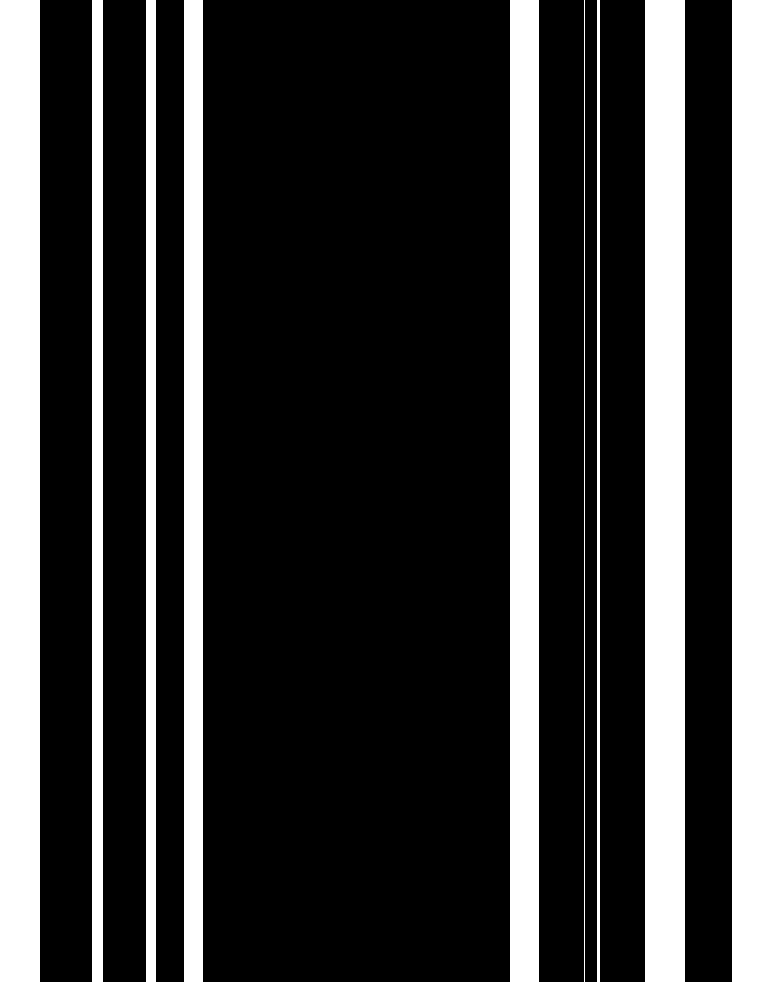

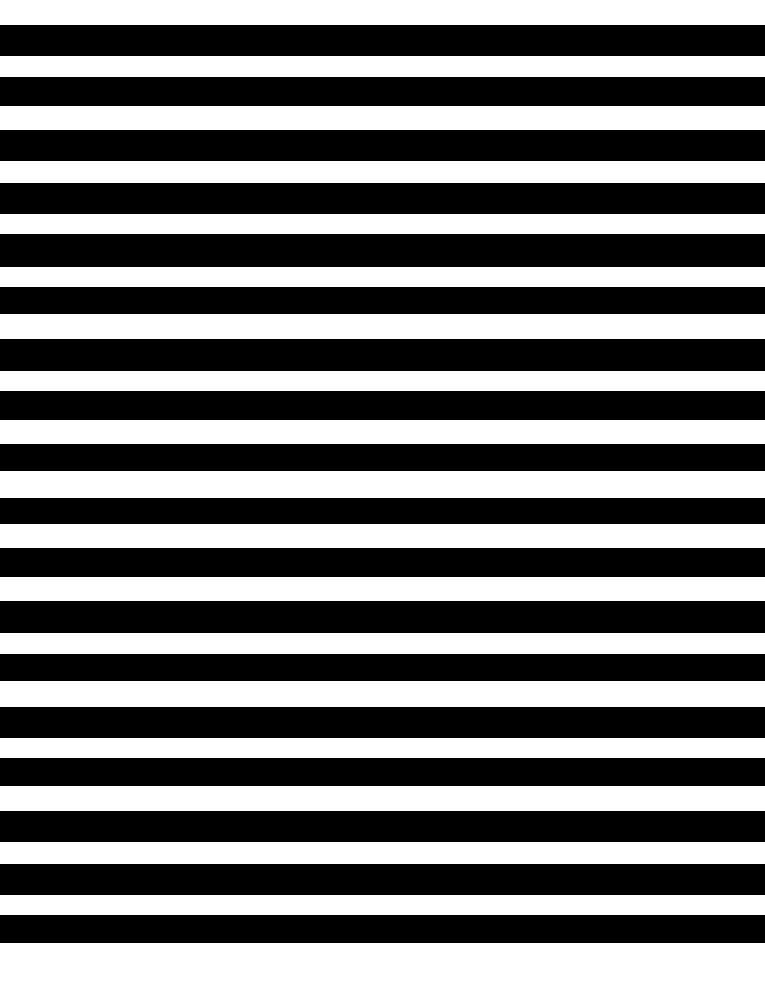

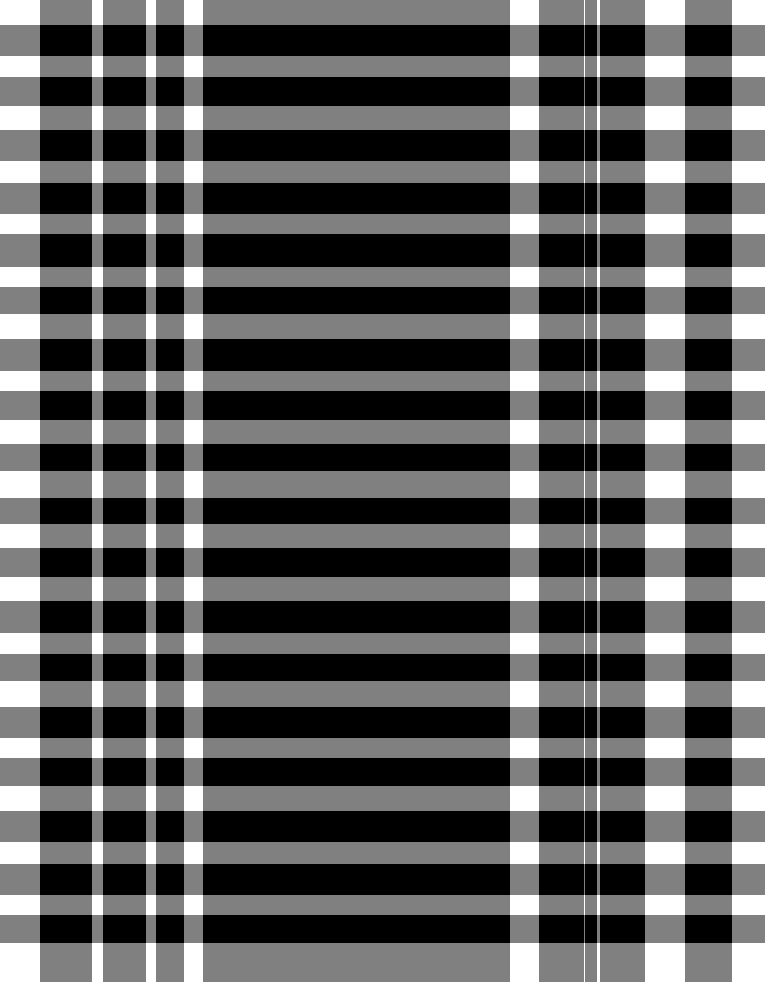

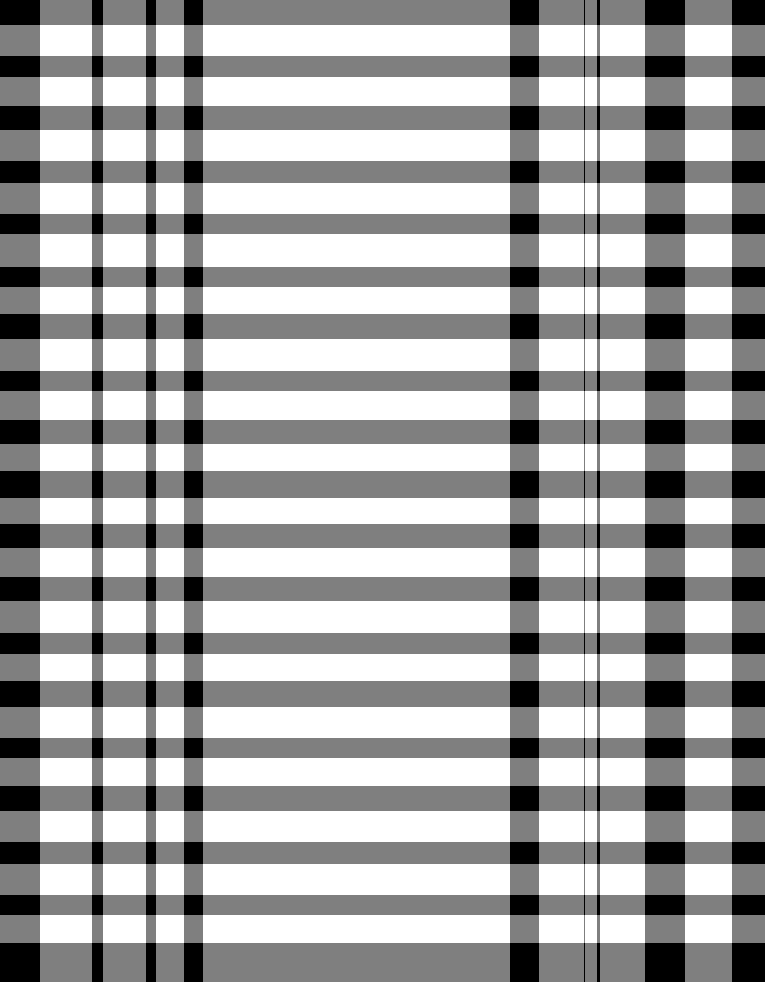

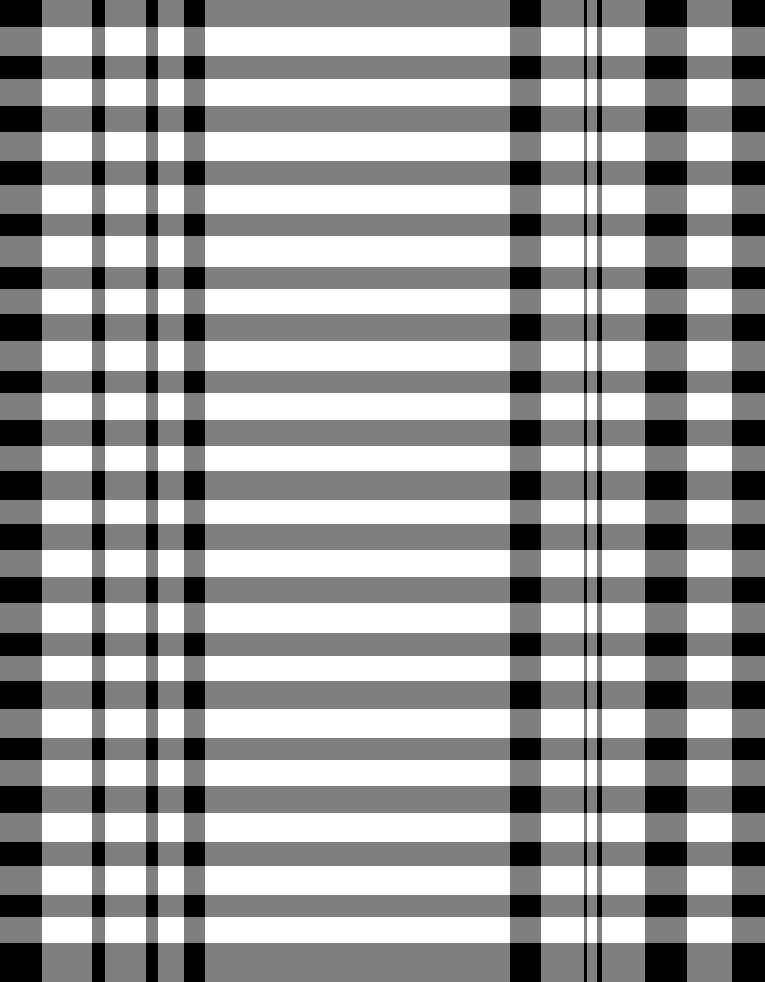

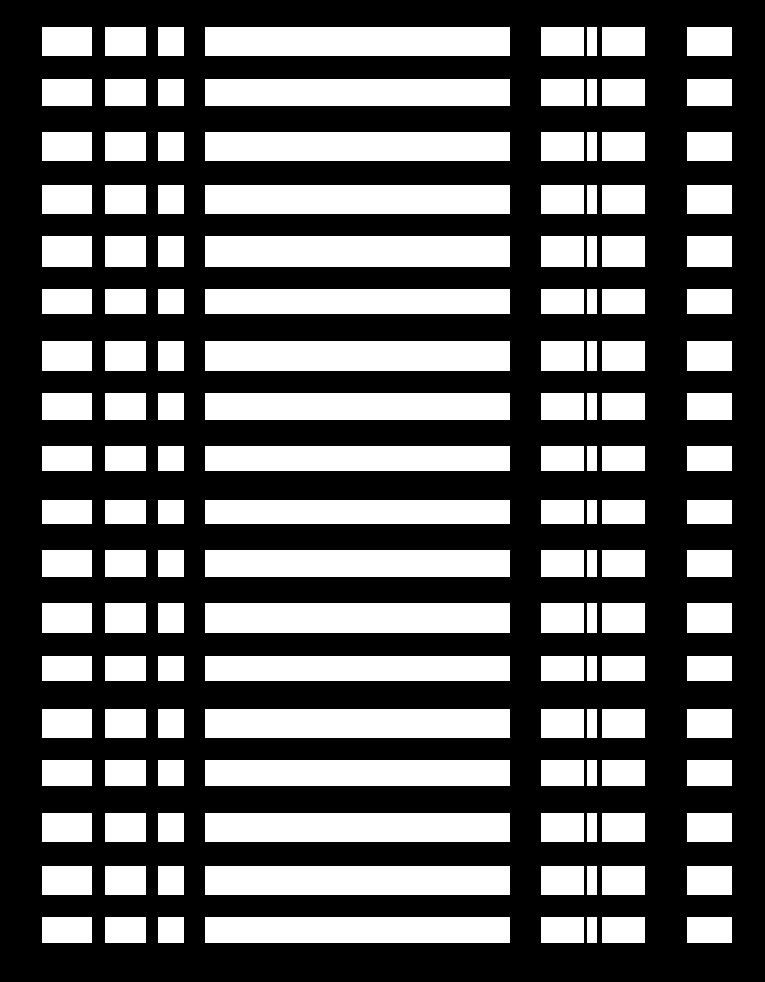

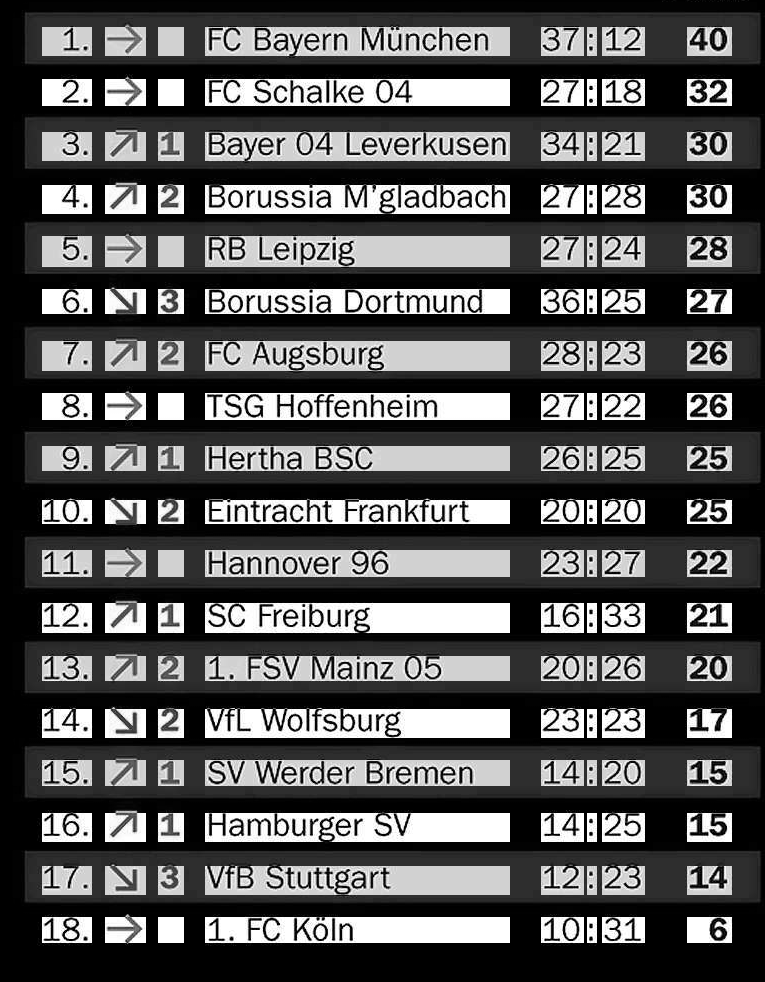

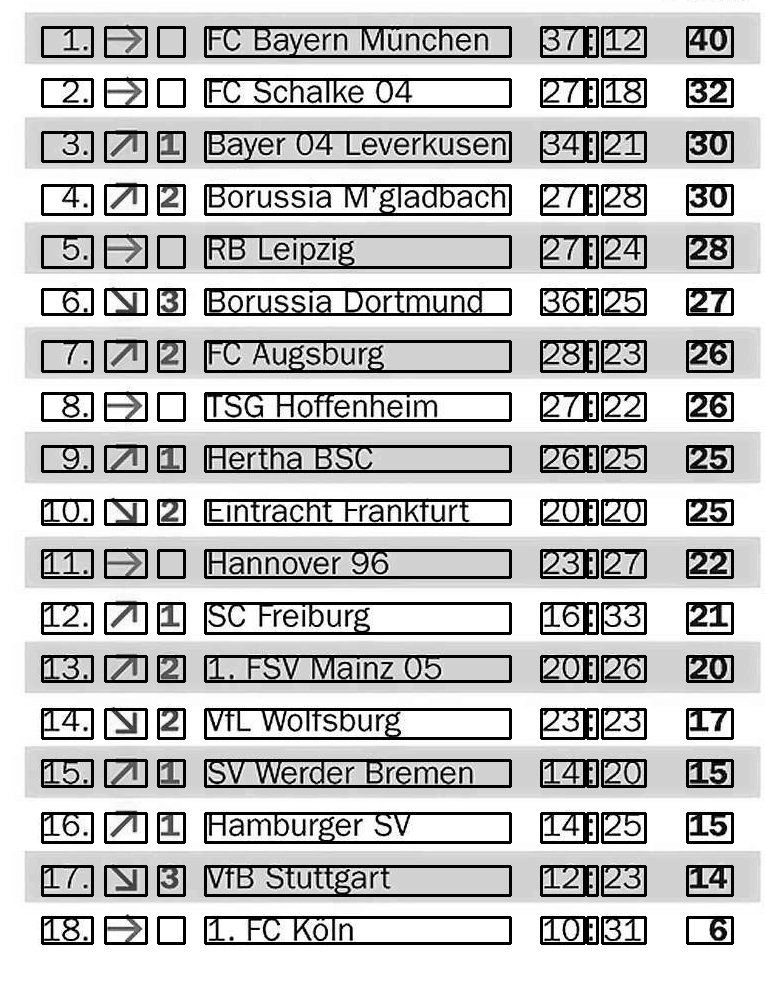

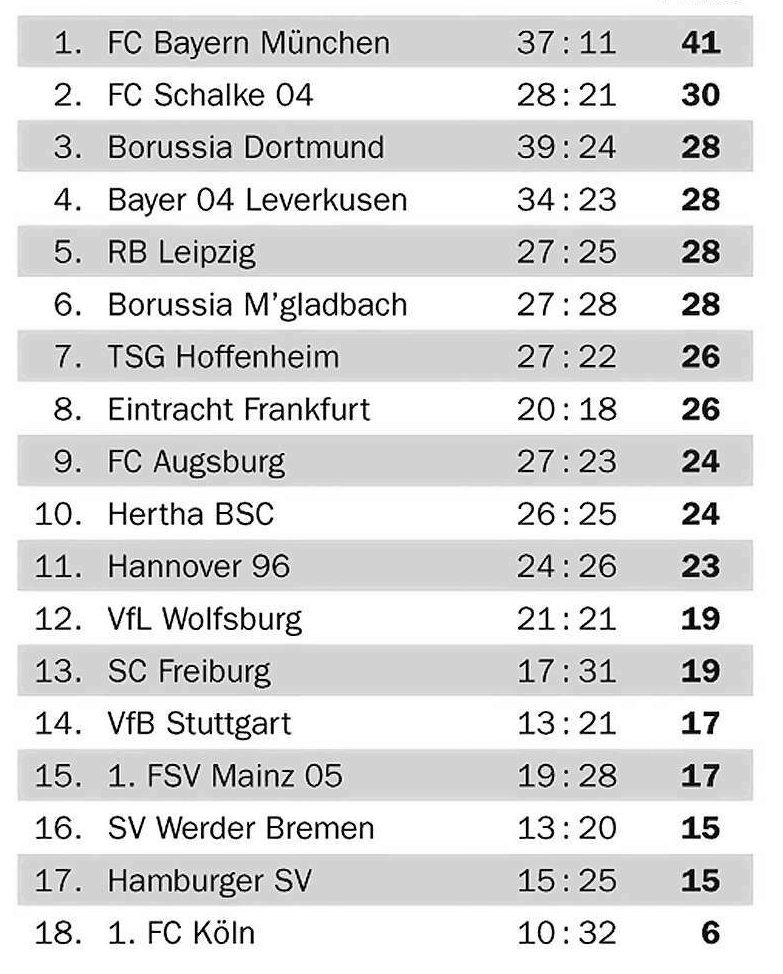

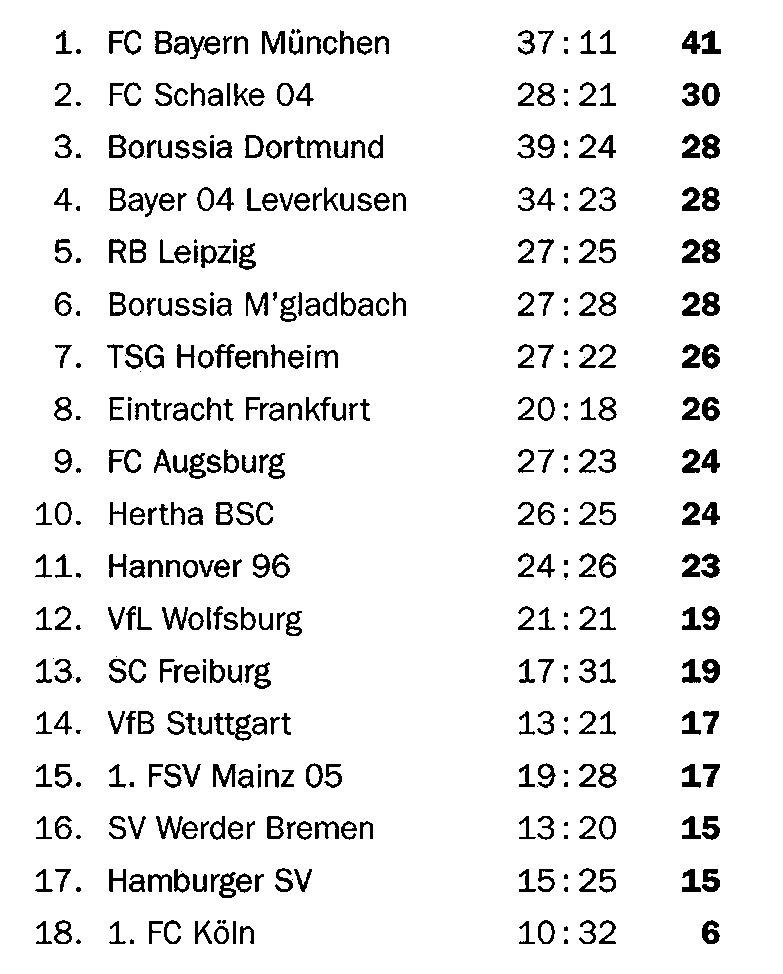

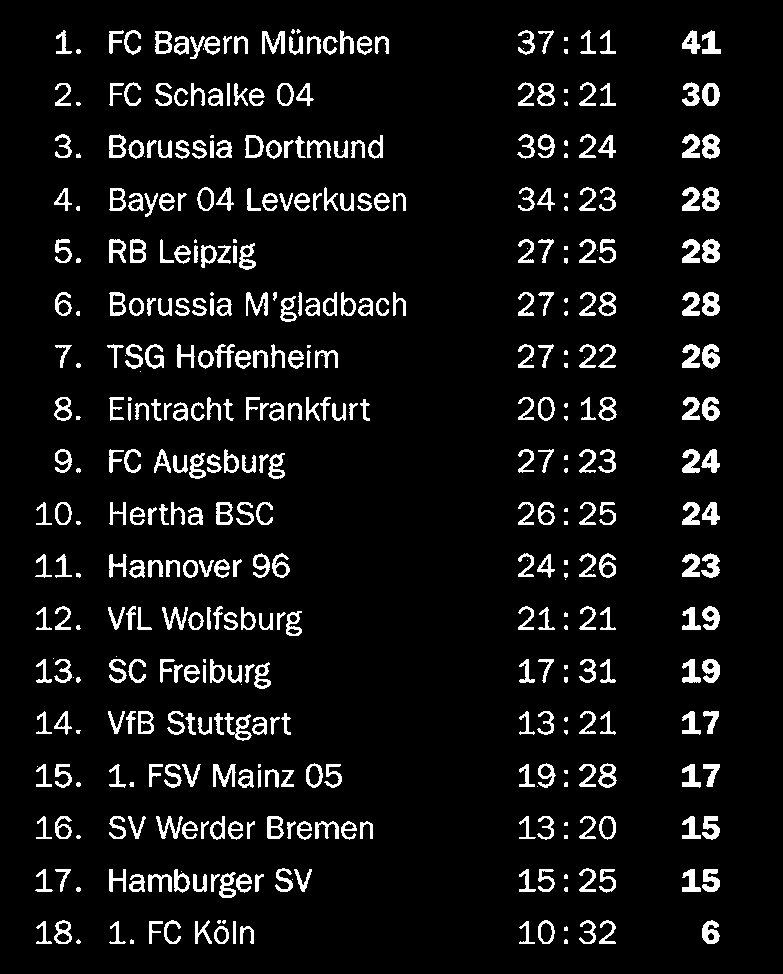

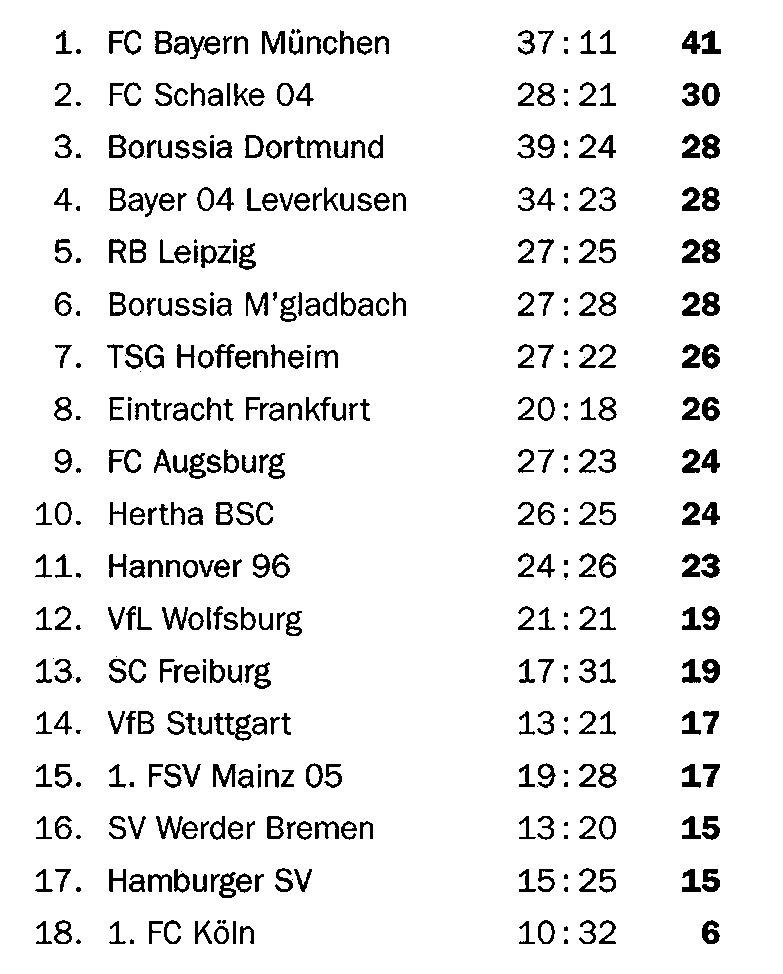

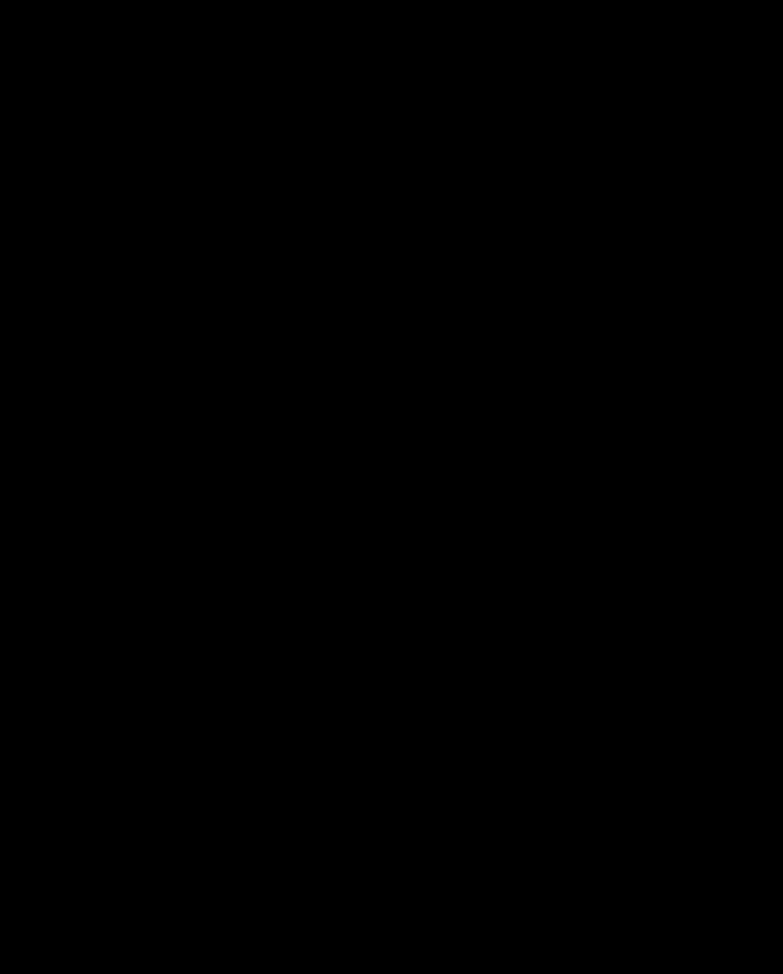

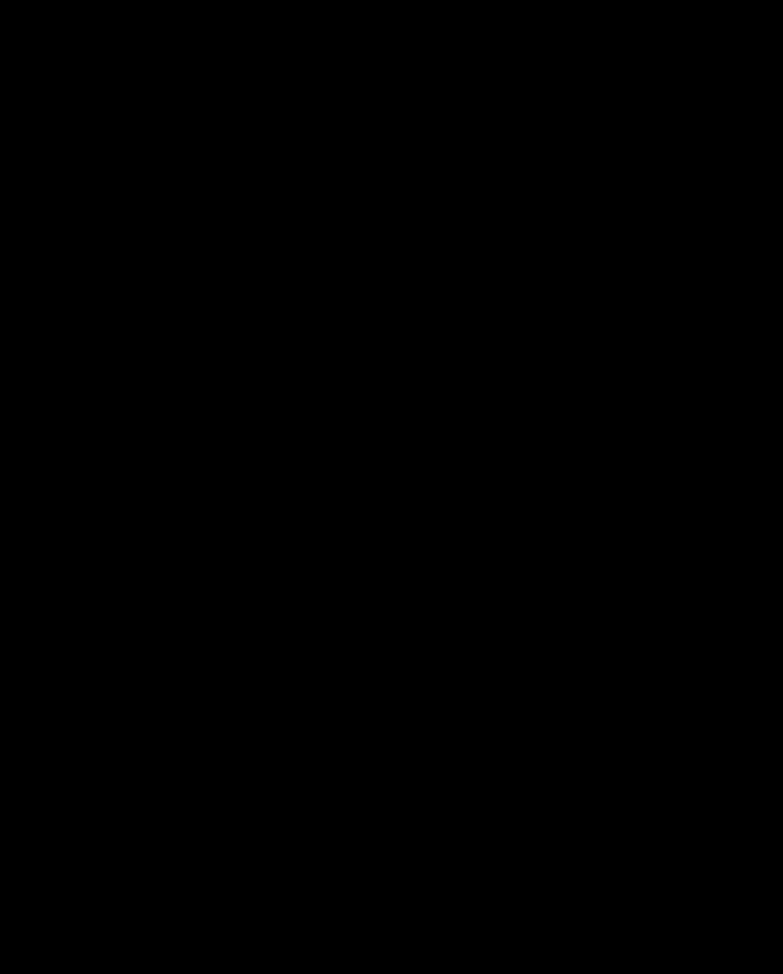

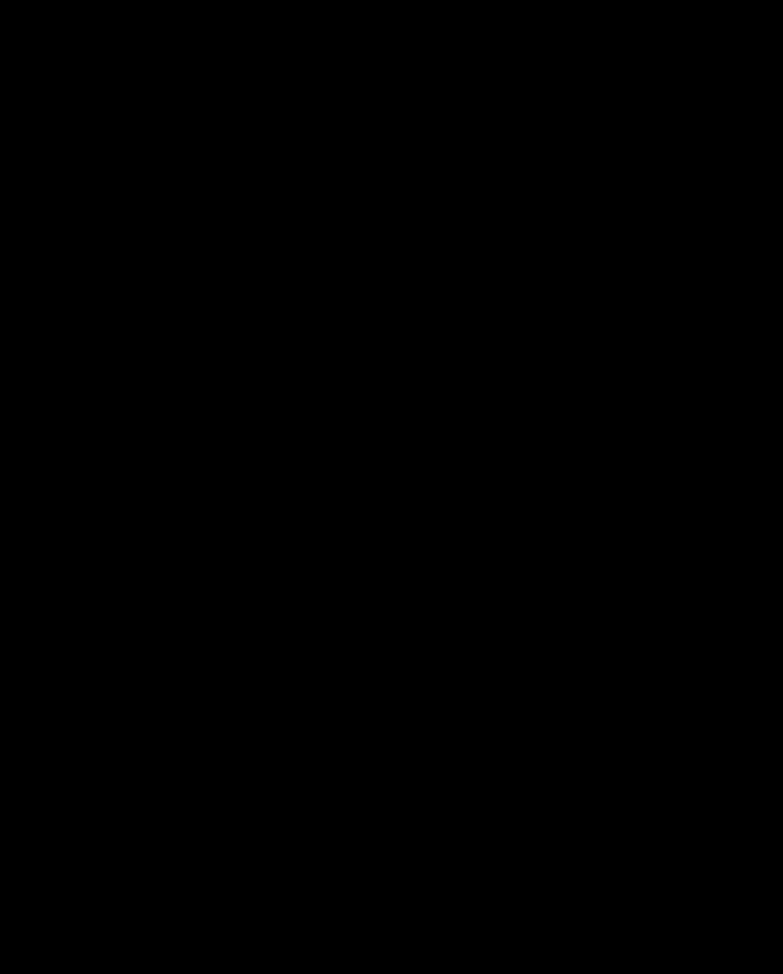

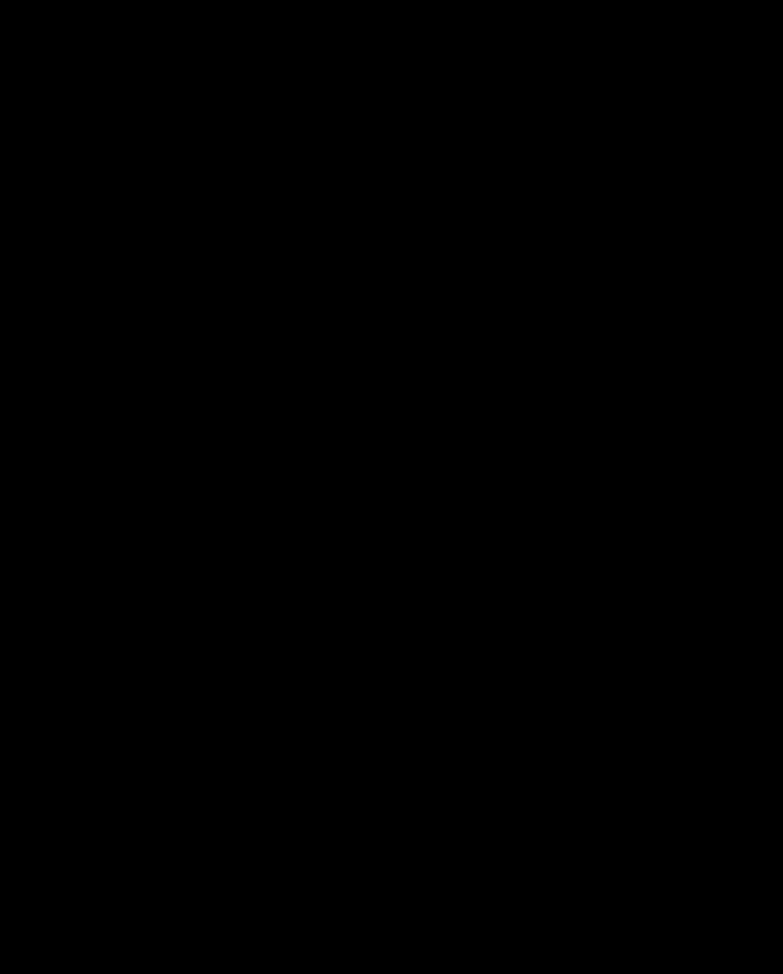

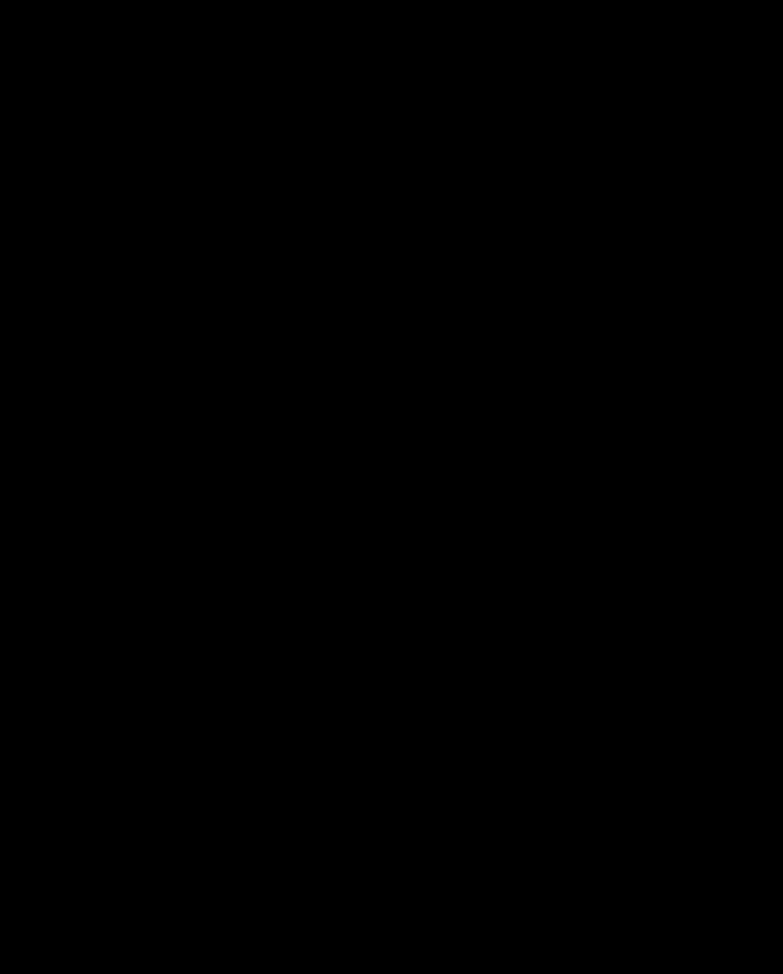

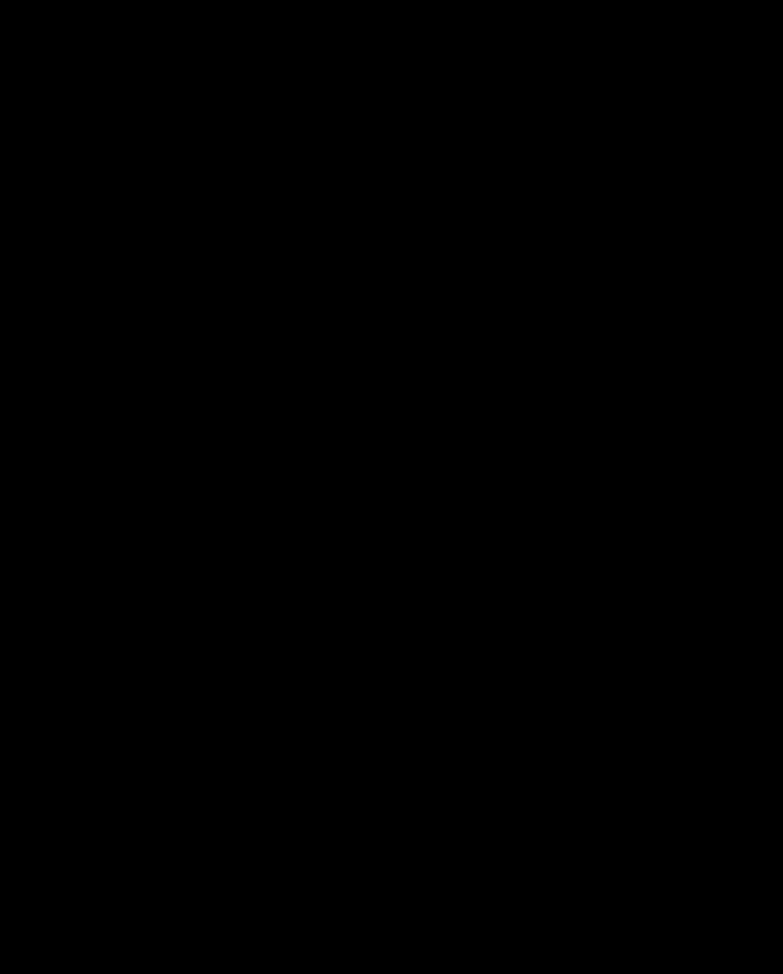

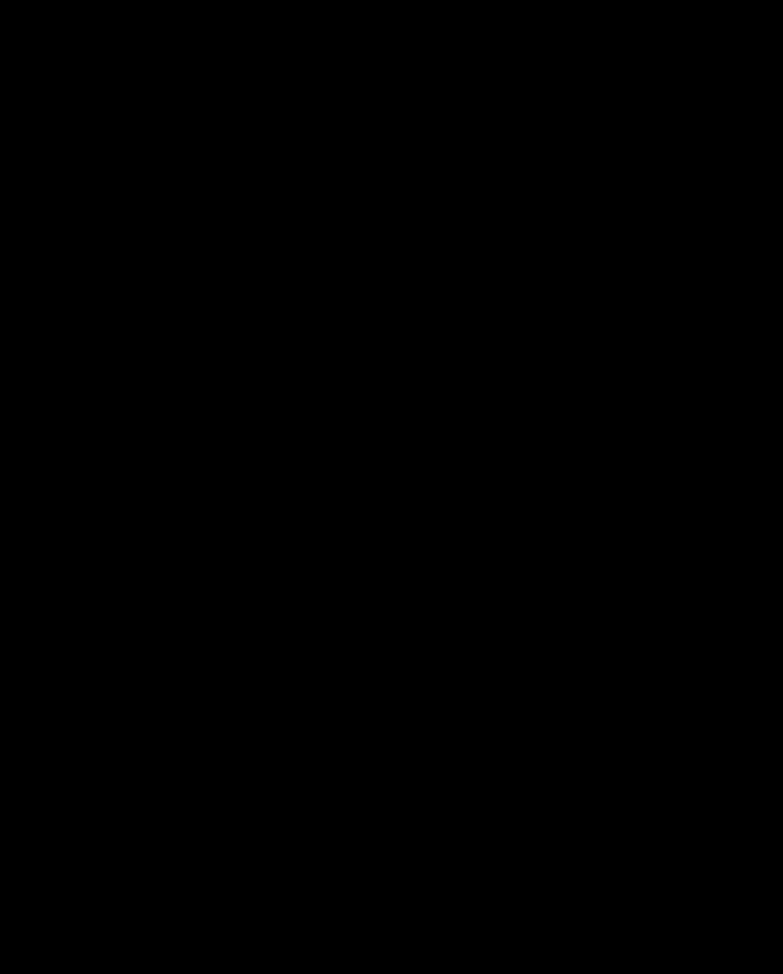

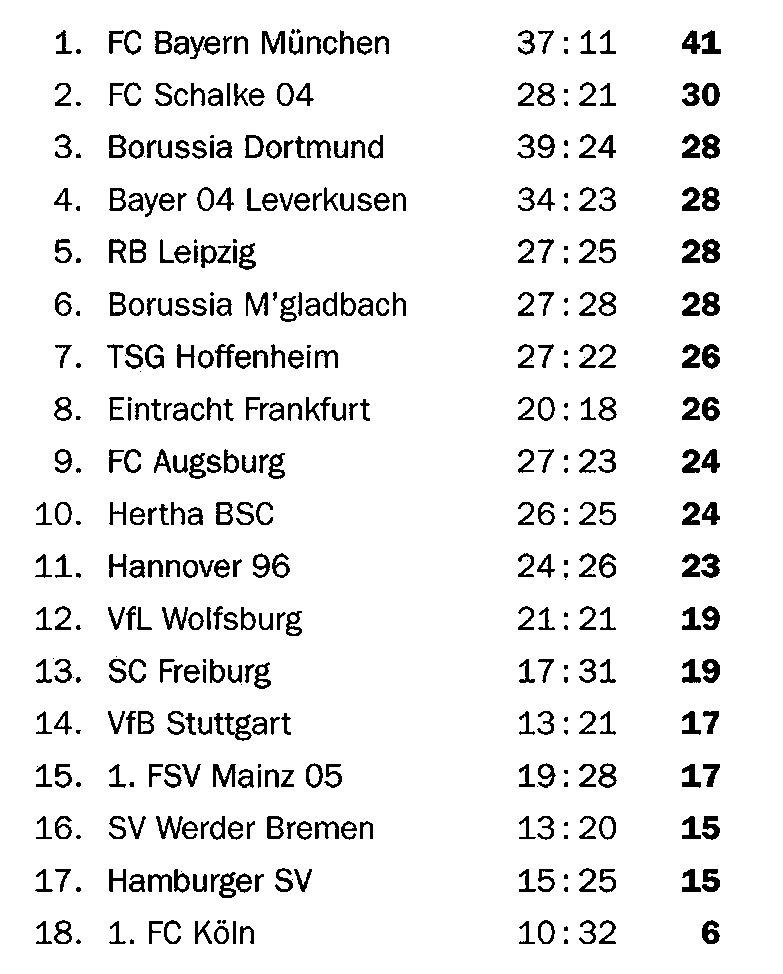

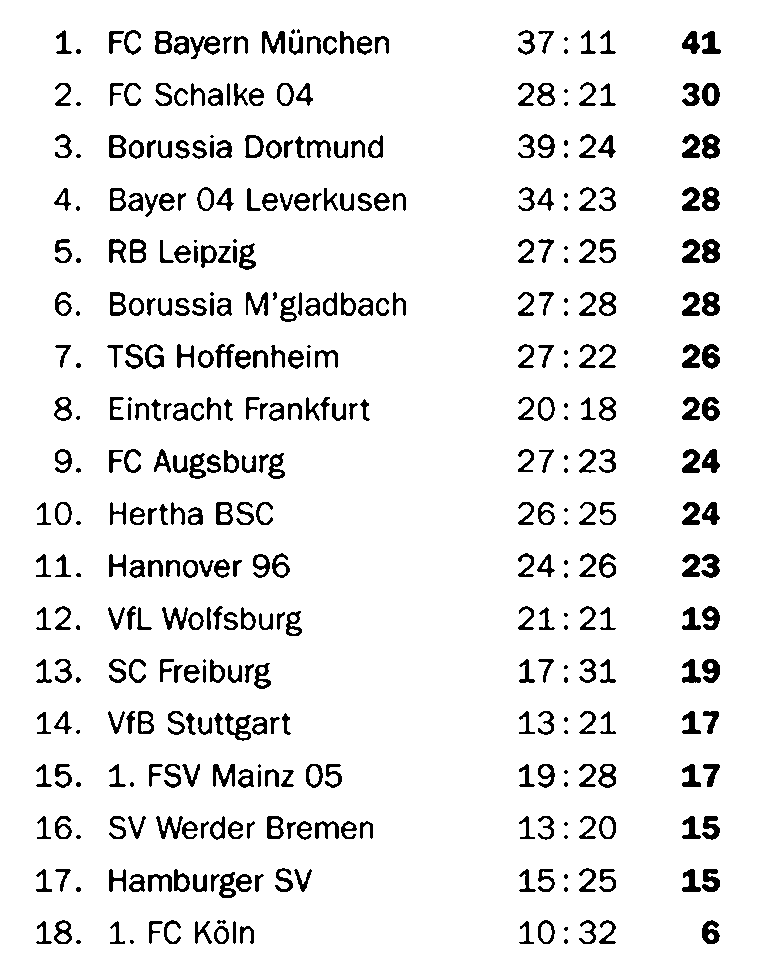

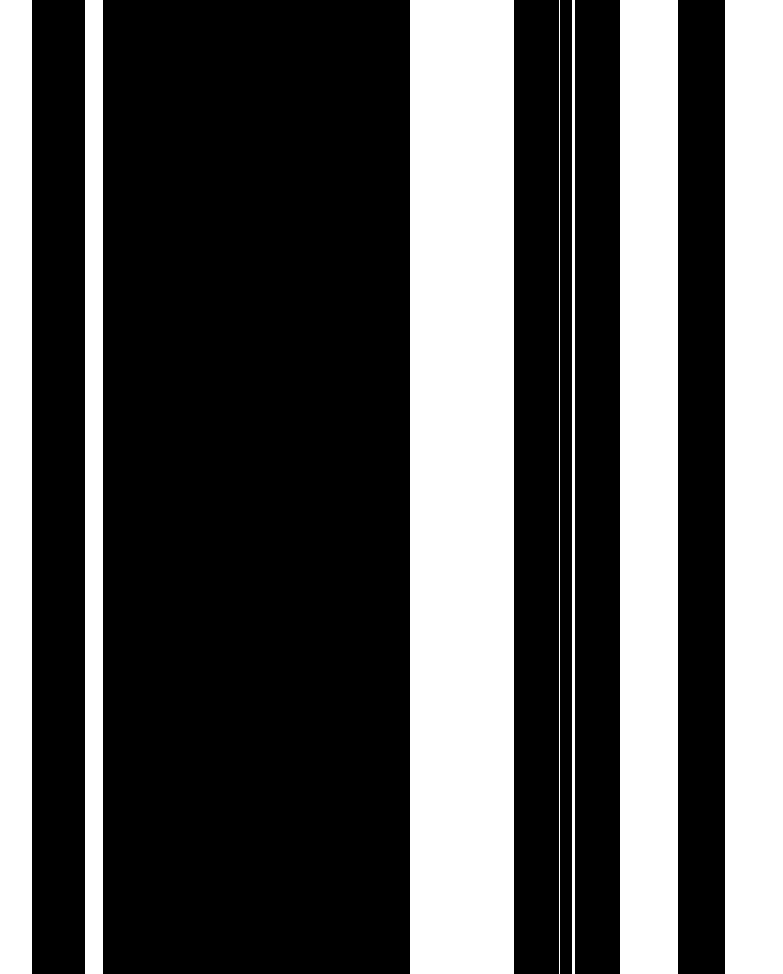

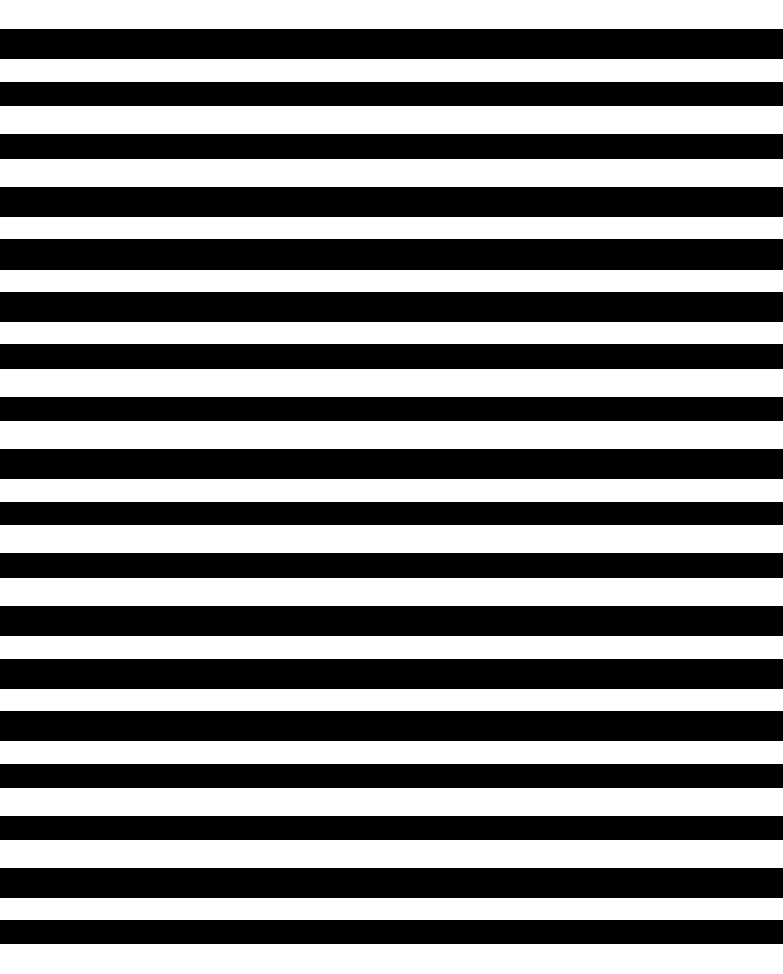

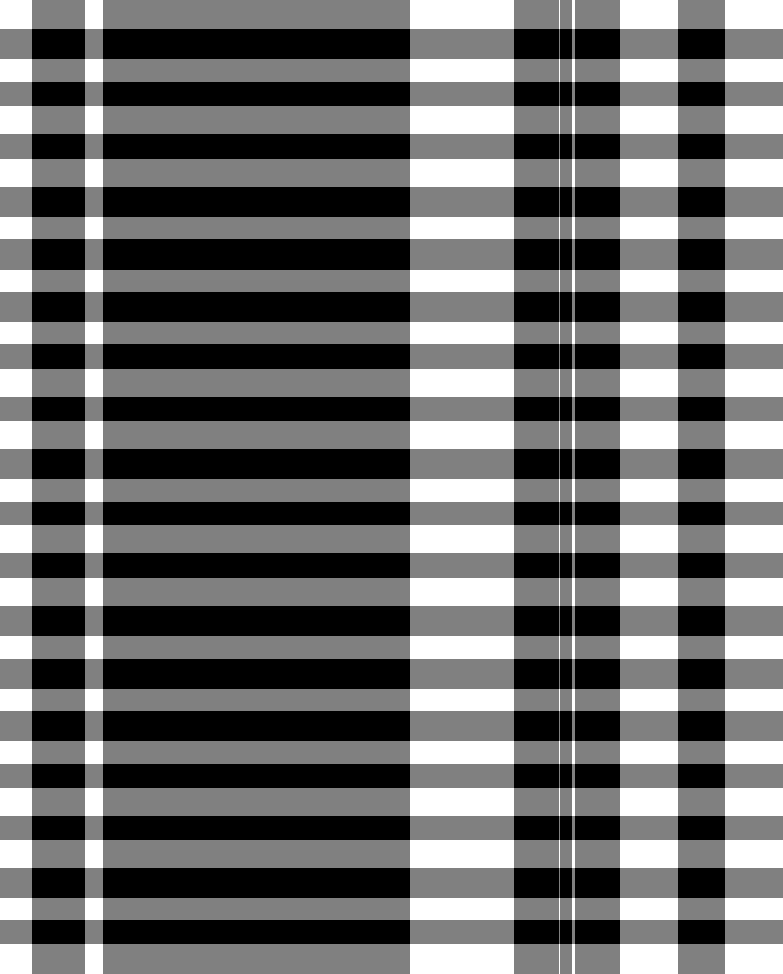

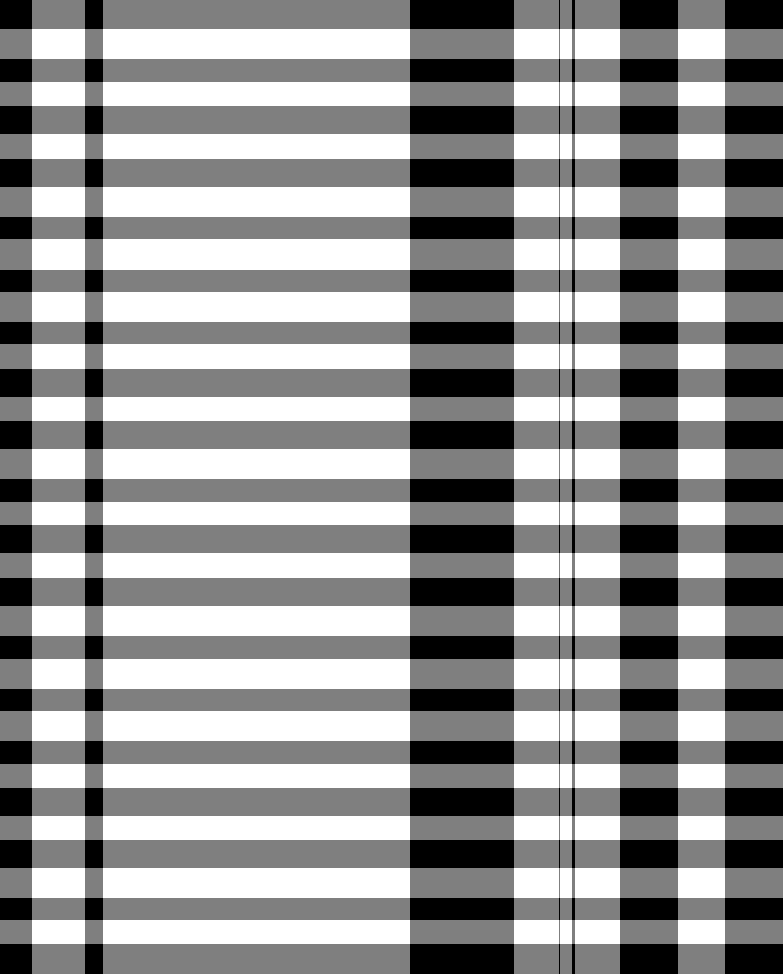

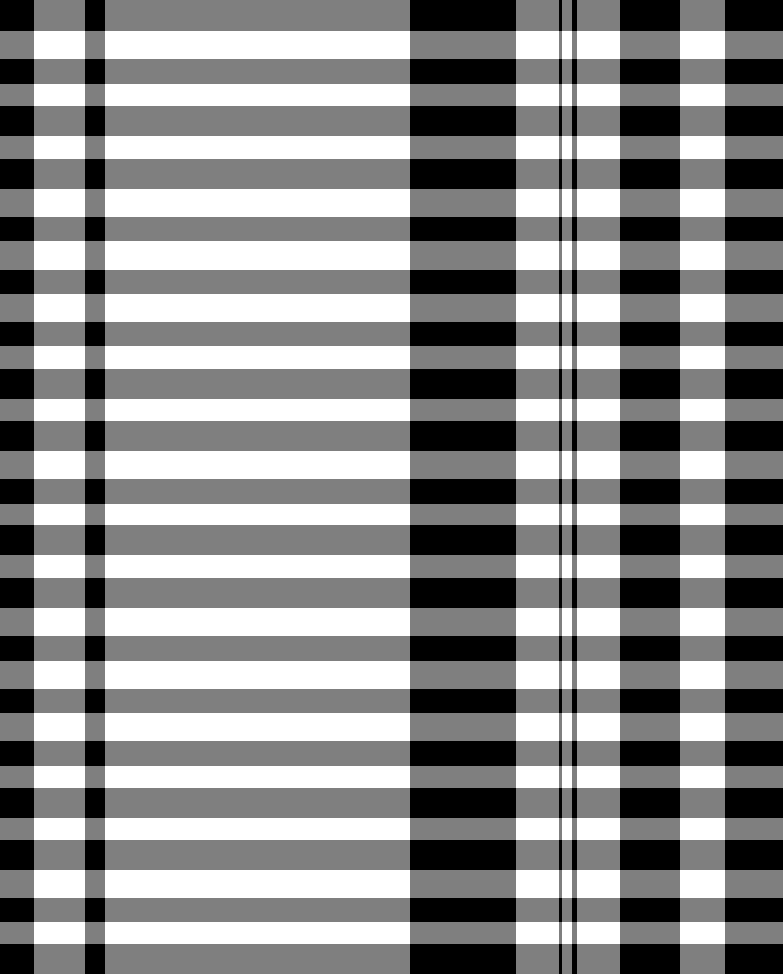

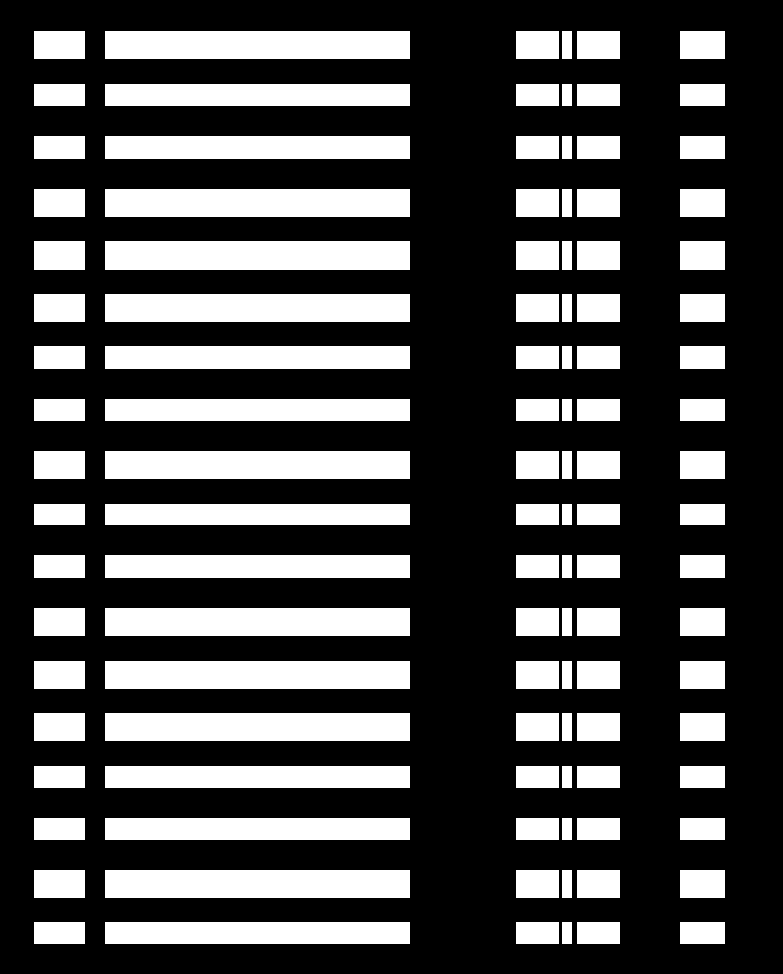

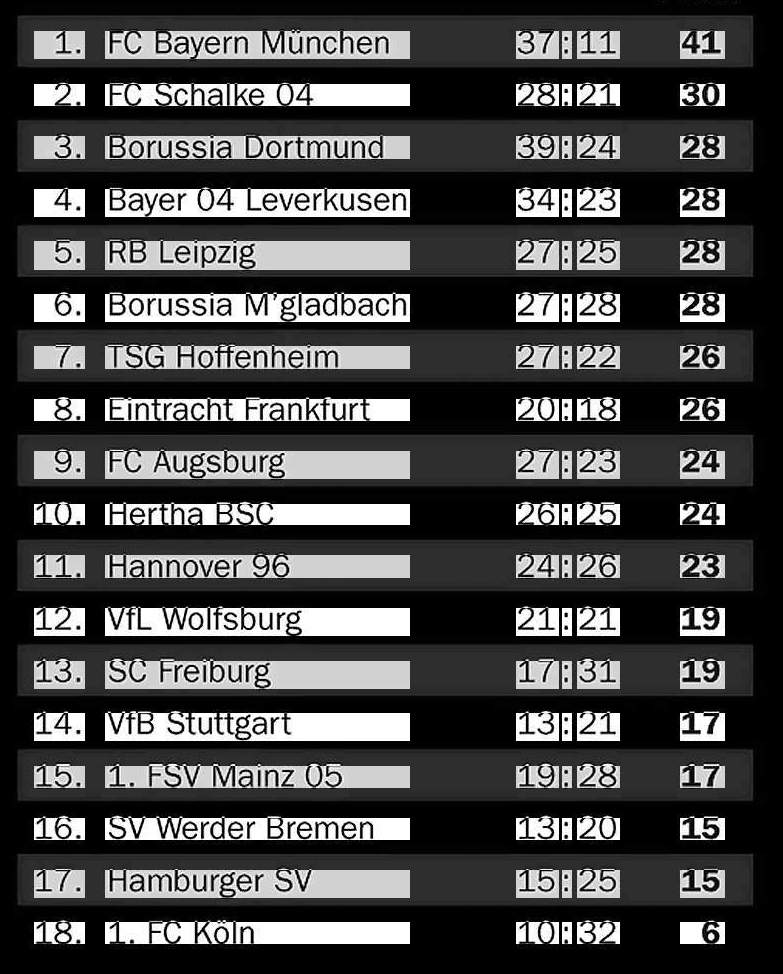

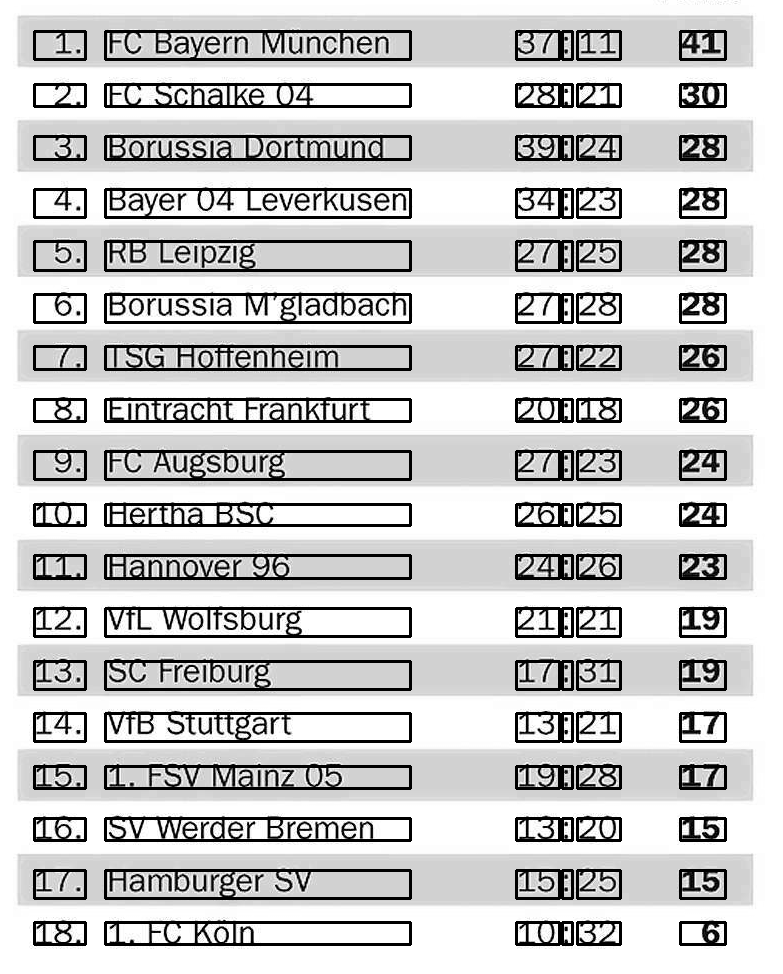

In [ ]:
document_example = cv2.imread("/content/Multi_Type_TD_TSR/images/example.jpg")

table_list, table_coords = table_detection.make_prediction(document_example, predictor)
list_table_boxes = []
for table in table_list:
    finalboxes, output_img = tsrlwol.recognize_structure(table)
    list_table_boxes.append(finalboxes)

#Additional Feature: OCR with PyTesserect (Output in CSV)

In [ ]:
len(list_table_boxes)

1

In [ ]:
tocr.output_to_csv(list_table_boxes[0], output_img)

                                                    0       1       2      3
0                                                                           
1                                  Number of branches     467     476    469
2                                      Number of ATMs   1,572   1,653       
3                          Number of contactless ATMs                       
4                             Number of ability ATMs®       3               
5                              Digital transtormation                       
6    Digitally registered retail customers (% ot i...               -      -
7    Digitally active retail customers (% ot indiv...               -      -
8                    Customer experience and advocacy                       
9                      Number of customer compliments    5,93    2,91    426
10   Complaints relating to sale of investment and...      on     O12       
11                        Lending profile ($ billion}                       

In [ ]:
from google.colab import files

In [ ]:
files.download("output.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>